In [43]:
# 入力値工夫(代表周波数による精度向上)

In [44]:
## 必要なライブラリのimport
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Input, concatenate
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import random
from scipy import signal

In [22]:
## データについて

### データファイルのpath
no_hole_path = './../vibration_simulation/vibration_data/no_hole_data.csv'
one_hole_path = './../vibration_simulation/vibration_data/one_hole_data.csv'
four_holes_path = './../vibration_simulation/vibration_data/four_holes_data.csv'
nine_holes_path = './../vibration_simulation/vibration_data/nine_holes_data.csv'
sixteen_holes_path = './../vibration_simulation/vibration_data/sixteen_holes_data.csv'
twentyfive_holes_path = './../vibration_simulation/vibration_data/twentyfive_holes_data.csv'

### 入力データと正解データ
rep_freq_array1 = []
rep_freq_array2 = []
rep_freq_array3 = []
no_hole_data1 = []
no_hole_data2 = []
no_hole_data3 = []
fft_no_hole_data1 = []
fft_no_hole_data2 = []
fft_no_hole_data3 = []
size_x_data = []
size_x_data1 = []
size_x_data2 = []
size_x_data3 = []
fft_size_x_data1 = []
fft_size_x_data2 = []
fft_size_x_data3 = []
size_y_data = []
position_x_data = []
position_x_data1 = []
position_x_data2 = []
position_x_data3 = []
position_one_data1 = []
position_one_data2 = []
position_one_data3 = []
position_two_data1 = []
position_two_data2 = []
position_two_data3 = []
position_three_data1 = []
position_three_data2 = []
position_three_data3 = []
position_four_data1 = []
position_four_data2 = []
position_four_data3 = []
position_five_data1 = []
position_five_data2 = []
position_five_data3 = []
position_y_data = []

### ファイル読み込み

#### 欠陥がない場合のデータ
with open(no_hole_path) as f:
    for line in f:
        data_array = line.split(' ')
        no_hole_data1 = data_array[0:1251]
        no_hole_data2 = data_array[1251:2502]
        no_hole_data3 = data_array[2502:-1]
        
#### 大きさに関するデータ
with open(one_hole_path) as fs1:
  for line in fs1:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(four_holes_path) as fs2:
  for line in fs2:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(nine_holes_path) as fs3:
  for line in fs3:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(sixteen_holes_path) as fs4:
  for line in fs4:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(twentyfive_holes_path) as fs5:
  for line in fs5:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])

#### 位置に関するデータ
with open(one_hole_path) as fp1:
  for line in fp1:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_one_data1.append(data_array[3:1254])
    position_one_data2.append(data_array[1254:2505])
    position_one_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(four_holes_path) as fp2:
  for line in fp2:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_two_data1.append(data_array[3:1254])
    position_two_data2.append(data_array[1254:2505])
    position_two_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(nine_holes_path) as fp3:
  for line in fp3:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_three_data1.append(data_array[3:1254])
    position_three_data2.append(data_array[1254:2505])
    position_three_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(sixteen_holes_path) as fp4:
  for line in fp4:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_four_data1.append(data_array[3:1254])
    position_four_data2.append(data_array[1254:2505])
    position_four_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(twentyfive_holes_path) as fp5:
  for line in fp5:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_five_data1.append(data_array[3:1254])
    position_five_data2.append(data_array[1254:2505])
    position_five_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])

### 各配列をnp.array型にして各要素を型変換
no_hole_data1 = np.array(no_hole_data1, dtype=float)
no_hole_data2 = np.array(no_hole_data2, dtype=float)
no_hole_data3 = np.array(no_hole_data3, dtype=float)
size_x_data1 = np.array(size_x_data1, dtype=float)
size_x_data2 = np.array(size_x_data2, dtype=float)
size_x_data3 = np.array(size_x_data3, dtype=float)
size_y_data = np.array(size_y_data, dtype=int)
position_x_data1 = np.array(position_x_data1, dtype=float)
position_x_data2 = np.array(position_x_data2, dtype=float)
position_x_data3 = np.array(position_x_data3, dtype=float)
position_one_data1 = np.array(position_one_data1, dtype=float)
position_two_data1 = np.array(position_two_data1, dtype=float)
position_three_data1 = np.array(position_three_data1, dtype=float)
position_four_data1 = np.array(position_four_data1, dtype=float)
position_five_data1 = np.array(position_five_data1, dtype=float)
position_one_data2 = np.array(position_one_data2, dtype=float)
position_two_data2 = np.array(position_two_data2, dtype=float)
position_three_data2 = np.array(position_three_data2, dtype=float)
position_four_data2 = np.array(position_four_data2, dtype=float)
position_five_data2 = np.array(position_five_data2, dtype=float)
position_one_data3 = np.array(position_one_data3, dtype=float)
position_two_data3 = np.array(position_two_data3, dtype=float)
position_three_data3 = np.array(position_three_data3, dtype=float)
position_four_data3 = np.array(position_four_data3, dtype=float)
position_five_data3 = np.array(position_five_data3, dtype=float)
position_y_data = np.array(position_y_data, dtype=float)

#各振動を高速フーリエ変換→代表周波数のリスト作成→該当周波数のみの振幅を入力とする
## 欠陥なしデータ
# F_no_hole1 = np.fft.fft(no_hole_data1)
# N = len(no_hole_data1)
# Amp_no_hole1 = np.abs(F_no_hole1/(N/2))
# maxid_no_hole1 = signal.argrelmax(Amp_no_hole1[1:int(N/2)], order=1)
# rep_index_no_hole1 = maxid_no_hole1[0]
# F_no_hole2 = np.fft.fft(no_hole_data2)
# Amp_no_hole2 = np.abs(F_no_hole2/(N/2))
# maxid_no_hole2 = signal.argrelmax(Amp_no_hole2[1:int(N/2)], order=1)
# rep_index_no_hole2 = maxid_no_hole2[0]
# F_no_hole3 = np.fft.fft(no_hole_data3)
# Amp_no_hole3 = np.abs(F_no_hole3/(N/2))
# maxid_no_hole3 = signal.argrelmax(Amp_no_hole3[1:int(N/2)], order=1)
# rep_index_no_hole3 = maxid_no_hole3[0]
## 欠陥ありデータ
N = len(no_hole_data1)
### 観測点1
for i in range(len(size_x_data1)):
    F = np.fft.fft(size_x_data1[i])
    Amp = np.abs(F/(N/2))
    fft_size_x_data1.append(Amp)
    maxid = signal.argrelmax(Amp[1:int(N/2)], order=1)
    rep_index = maxid[0]
    for j in range(len(rep_index)):
        if (rep_index[j] in rep_freq_array1) == False:
            rep_freq_array1.append(rep_index[j])
### 観測点2
for i in range(len(size_x_data2)):
    F = np.fft.fft(size_x_data2[i])
    Amp = np.abs(F/(N/2))
    fft_size_x_data2.append(Amp)
    maxid = signal.argrelmax(Amp[1:int(N/2)], order=1)
    rep_index = maxid[0]
    for j in range(len(rep_index)):
        if (rep_index[j] in rep_freq_array2) == False:
            rep_freq_array2.append(rep_index[j])
### 観測点3
for i in range(len(size_x_data3)):
    F = np.fft.fft(size_x_data3[i])
    Amp = np.abs(F/(N/2))
    fft_size_x_data3.append(Amp)
    maxid = signal.argrelmax(Amp[1:int(N/2)], order=1)
    rep_index = maxid[0]
    for j in range(len(rep_index)):
        if (rep_index[j] in rep_freq_array3) == False:
            rep_freq_array3.append(rep_index[j])

#入力値の更新(振動→代表周波数の振幅)
size_x_data1 = []
size_x_data2 = []
size_x_data3 = []
## 観測点1
for i in range(len(fft_size_x_data1)):
    rep_amp = []
    for j in range(len(rep_freq_array1)):
        rep_amp.append(fft_size_x_data1[i][j])
    size_x_data1.append(rep_amp)
## 観測点2
for i in range(len(fft_size_x_data2)):
    rep_amp = []
    for j in range(len(rep_freq_array2)):
        rep_amp.append(fft_size_x_data2[i][j])
    size_x_data2.append(rep_amp)
## 観測点3
for i in range(len(fft_size_x_data3)):
    rep_amp = []
    for j in range(len(rep_freq_array3)):
        rep_amp.append(fft_size_x_data3[i][j])
    size_x_data3.append(rep_amp)
size_x_data1 = np.array(size_x_data1, dtype=float)
size_x_data2 = np.array(size_x_data2, dtype=float)
size_x_data3 = np.array(size_x_data3, dtype=float)

## データの加工
###最大値で割る
max_displacement1 = size_x_data1.max()
max_displacement2 = size_x_data2.max()
max_displacement3 = size_x_data3.max()
size_x_data1 = size_x_data1/max_displacement1
size_x_data2 = size_x_data2/max_displacement2
size_x_data3 = size_x_data3/max_displacement3
# position_x_data1 = position_x_data1/max_displacement
# position_x_data2 = position_x_data2/max_displacement
# position_x_data3 = position_x_data3/max_displacement
# position_one_data1 = position_one_data1/max_displacement
# position_one_data2 = position_one_data2/max_displacement
# position_one_data3 = position_one_data3/max_displacement
# position_two_data1 = position_two_data1/max_displacement
# position_two_data2 = position_two_data2/max_displacement
# position_two_data3 = position_two_data3/max_displacement
# position_three_data1 = position_three_data1/max_displacement
# position_three_data2 = position_three_data2/max_displacement
# position_three_data3 = position_three_data3/max_displacement
# position_four_data1 = position_four_data1/max_displacement
# position_four_data2 = position_four_data2/max_displacement
# position_four_data3 = position_four_data3/max_displacement
# position_five_data1 = position_five_data1/max_displacement
# position_five_data2 = position_five_data2/max_displacement
# position_five_data3 = position_five_data3/max_displacement
# position_y_data = position_y_data/50

### データを50個から250個ランダムに選んだときのデータセット作成
x_size_data_array1 = []
x_size_data_array2 = []
x_size_data_array3 = []
# x_position_data_array1 = []
# x_position_data_array2 = []
# x_position_data_array3 = []
y_size_data_array = []
# y_position_data_array = []
x_index = []
for i in range(len(size_x_data1)):
    x_index.append(i)
for i in range(5):
    data_count = 50*(i + 1)
    used_index = random.sample(x_index, data_count)
    used_x_size_data1 = []
    used_x_size_data2 = []
    used_x_size_data3 = []
#     used_x_position_data1 = []
#     used_x_position_data2 = []
#     used_x_position_data3 = []
    used_y_size_data = []
#     used_y_position_data = []
    for i in range(len(used_index)):
        used_x_size_data1.append(size_x_data1[used_index[i]])
        used_x_size_data2.append(size_x_data2[used_index[i]])
        used_x_size_data3.append(size_x_data3[used_index[i]])
#         used_x_position_data1.append(position_x_data1[used_index[i]])
#         used_x_position_data2.append(position_x_data2[used_index[i]])
#         used_x_position_data3.append(position_x_data3[used_index[i]])
        used_y_size_data.append(size_y_data[used_index[i]])
#         used_y_position_data.append(position_y_data[used_index[i]])
    y_size_data_array.append(used_y_size_data)
#     y_position_data_array.append(used_y_position_data)
    x_size_data_array1.append(used_x_size_data1)
    x_size_data_array2.append(used_x_size_data2)
    x_size_data_array3.append(used_x_size_data3)
#     x_position_data_array1.append(used_x_position_data1)
#     x_position_data_array2.append(used_x_position_data2)
#     x_position_data_array3.append(used_x_position_data3)

### train用とtest用に分割(9:1)
x_size_train_array1 = []
x_size_train_array2 = []
x_size_train_array3 = []
x_size_test_array1 = []
x_size_test_array2 = []
x_size_test_array3 = []
# x_position_train_array1 = []
# x_position_train_array2 = []
# x_position_train_array3 = []
# x_position_test_array1 = []
# x_position_test_array2 = []
# x_position_test_array3 = []
y_size_train_array = []
y_size_test_array = []
# y_position_train_array = []
# y_position_test_array = []
for i in range(5):
    x_size_train1, x_size_test1, x_size_train2, x_size_test2, x_size_train3, x_size_test3, y_size_train, y_size_test = train_test_split(x_size_data_array1[i], x_size_data_array2[i], x_size_data_array3[i], y_size_data_array[i], test_size=0.10)
#     x_position_train1, x_position_test1, x_position_train2, x_position_test2, x_position_train3, x_position_test3, y_position_train, y_position_test = train_test_split(x_position_data_array1[i], x_position_data_array2[i], x_position_data_array3[i], y_position_data_array[i], test_size=0.10)
    x_size_train_array1.append(np.array(x_size_train1))
    x_size_train_array2.append(np.array(x_size_train2))
    x_size_train_array3.append(np.array(x_size_train3))
    x_size_test_array1.append(np.array(x_size_test1))
    x_size_test_array2.append(np.array(x_size_test2))
    x_size_test_array3.append(np.array(x_size_test3))
#     x_position_train_array1.append(np.array(x_position_train1))
#     x_position_train_array2.append(np.array(x_position_train2))
#     x_position_train_array3.append(np.array(x_position_train3))
#     x_position_test_array1.append(np.array(x_position_test1))
#     x_position_test_array2.append(np.array(x_position_test2))
#     x_position_test_array3.append(np.array(x_position_test3))
    y_size_train_array.append(np.array(y_size_train))
    y_size_test_array.append(np.array(y_size_test))
#     y_position_train_array.append(np.array(y_position_train))
#     y_position_test_array.append(np.array(y_position_test))

In [29]:
print(len(x_size_train_array1))
print(len(x_size_train_array1[0]))
print(len(x_size_train_array1[0][0]))
print(len(x_size_train_array1[0][1]))

5
45
39
39


In [24]:
print(len(x_size_train_array2))
print(len(x_size_train_array2[0]))
print(len(x_size_train_array2[0][0]))
print(len(x_size_train_array2[0][1]))

5
45
68
68


In [30]:
# 大きさ推定のモデル
model_size_array = []

for i in range(5):
    # 入力を定義
    input1 = Input(shape=(39,1))
    input2 = Input(shape=(68,1))
    input3 = Input(shape=(42,1))

    # 入力1から結合前まで
    x = Conv1D(32, 3, padding='same', activation='tanh')(input1)
    x = MaxPooling1D(2, padding='same')(x)
    x = Model(inputs=input1, outputs=x)
    # 入力2から結合前まで
    y = Conv1D(32, 3, padding='same', activation='tanh')(input2)
    y = MaxPooling1D(2, padding='same')(y)
    y = Model(inputs=input2, outputs=y)
    # 入力3から結合前まで
    z = Conv1D(32, 3, padding='same', activation='tanh')(input3)
    z = MaxPooling1D(2, padding='same')(z)
    z = Model(inputs=input3, outputs=z)

    # 結合
    combined = concatenate([x.output, y.output, z.output], axis = 1)

    # 密結合
    cnn = Flatten()(combined)
    cnn = Dense(1, activation="linear")(cnn)

    # モデル定義とコンパイル
    cnn_size_model = Model(inputs=[x.input, y.input, z.input], outputs=cnn)
    cnn_size_model.compile(loss='mse', optimizer='adam', metrics=['acc'])
    model_size_array.append(cnn_size_model)

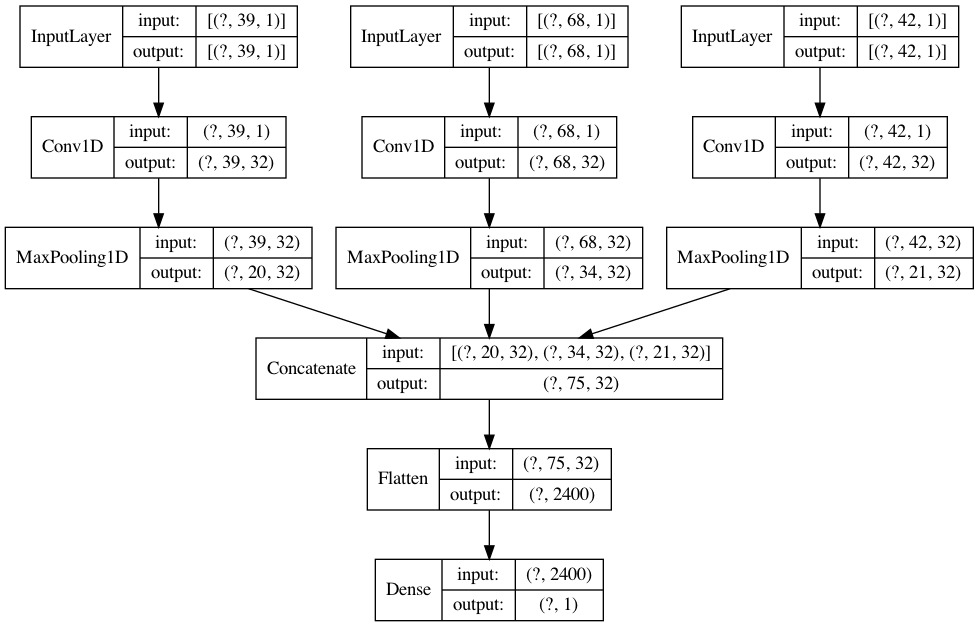

In [33]:
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(model_size_array[0], show_shapes=True, show_layer_names=False)

In [34]:
# 学習ループ
history_size_array = []
for i in range(len(model_size_array)):
    epochs = 1000
    batch_size = 128
    history_size_array.append(model_size_array[i].fit([x_size_train_array1[i], x_size_train_array2[i], x_size_train_array3[i]], y_size_train_array[i], batch_size=batch_size, epochs=epochs, verbose=1, validation_data=([x_size_test_array1[i], x_size_test_array2[i], x_size_test_array3[i]], y_size_test_array[i])))

Epoch 1/1000
1/1 [==============================] - 0s 200ms/step - loss: 11.3881 - acc: 0.0000e+00 - val_loss: 13.2288 - val_acc: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 41ms/step - loss: 11.1666 - acc: 0.0000e+00 - val_loss: 12.9777 - val_acc: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 35ms/step - loss: 10.9444 - acc: 0.0000e+00 - val_loss: 12.7197 - val_acc: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 36ms/step - loss: 10.7165 - acc: 0.0000e+00 - val_loss: 12.4514 - val_acc: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 34ms/step - loss: 10.4797 - acc: 0.0000e+00 - val_loss: 12.1700 - val_acc: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 33ms/step - loss: 10.2317 - acc: 0.0000e+00 - val_loss: 11.8728 - val_acc: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 0s 35ms/step - loss: 9.9702 - acc: 0.0000e+00 - val_loss: 11.5584 - val_acc: 0.0000e+00
Epoch 8/1000


1/1 [==============================] - 0s 33ms/step - loss: 2.0684 - acc: 0.2000 - val_loss: 2.0911 - val_acc: 0.2000
Epoch 63/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.0663 - acc: 0.2000 - val_loss: 2.0813 - val_acc: 0.2000
Epoch 64/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.0626 - acc: 0.2000 - val_loss: 2.0679 - val_acc: 0.2000
Epoch 65/1000
1/1 [==============================] - 0s 38ms/step - loss: 2.0578 - acc: 0.2000 - val_loss: 2.0517 - val_acc: 0.2000
Epoch 66/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.0523 - acc: 0.2000 - val_loss: 2.0337 - val_acc: 0.2000
Epoch 67/1000
1/1 [==============================] - 0s 27ms/step - loss: 2.0466 - acc: 0.2000 - val_loss: 2.0146 - val_acc: 0.2000
Epoch 68/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.0411 - acc: 0.2000 - val_loss: 1.9954 - val_acc: 0.2000
Epoch 69/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.0363 - acc: 0.

Epoch 124/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.0179 - acc: 0.2000 - val_loss: 1.9120 - val_acc: 0.2000
Epoch 125/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.0177 - acc: 0.2000 - val_loss: 1.9130 - val_acc: 0.2000
Epoch 126/1000
1/1 [==============================] - 0s 319ms/step - loss: 2.0175 - acc: 0.2000 - val_loss: 1.9140 - val_acc: 0.2000
Epoch 127/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.0173 - acc: 0.2000 - val_loss: 1.9149 - val_acc: 0.2000
Epoch 128/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.0172 - acc: 0.2000 - val_loss: 1.9156 - val_acc: 0.2000
Epoch 129/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.0170 - acc: 0.2000 - val_loss: 1.9161 - val_acc: 0.2000
Epoch 130/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.0168 - acc: 0.2000 - val_loss: 1.9165 - val_acc: 0.2000
Epoch 131/1000
1/1 [==============================] - 0s 29ms/step -

1/1 [==============================] - 0s 28ms/step - loss: 2.0063 - acc: 0.2000 - val_loss: 1.9084 - val_acc: 0.2000
Epoch 186/1000
1/1 [==============================] - 0s 34ms/step - loss: 2.0061 - acc: 0.2000 - val_loss: 1.9084 - val_acc: 0.2000
Epoch 187/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.0059 - acc: 0.2000 - val_loss: 1.9084 - val_acc: 0.2000
Epoch 188/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.0056 - acc: 0.2000 - val_loss: 1.9083 - val_acc: 0.2000
Epoch 189/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.0054 - acc: 0.2000 - val_loss: 1.9083 - val_acc: 0.2000
Epoch 190/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.0052 - acc: 0.2000 - val_loss: 1.9082 - val_acc: 0.2000
Epoch 191/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.0050 - acc: 0.2000 - val_loss: 1.9081 - val_acc: 0.2000
Epoch 192/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.0048 - 

Epoch 247/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9911 - acc: 0.2000 - val_loss: 1.9019 - val_acc: 0.2000
Epoch 248/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.9908 - acc: 0.2000 - val_loss: 1.9017 - val_acc: 0.2000
Epoch 249/1000
1/1 [==============================] - 0s 96ms/step - loss: 1.9905 - acc: 0.2000 - val_loss: 1.9016 - val_acc: 0.2000
Epoch 250/1000
1/1 [==============================] - 0s 61ms/step - loss: 1.9902 - acc: 0.2000 - val_loss: 1.9014 - val_acc: 0.2000
Epoch 251/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9900 - acc: 0.2000 - val_loss: 1.9013 - val_acc: 0.2000
Epoch 252/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9897 - acc: 0.2000 - val_loss: 1.9012 - val_acc: 0.2000
Epoch 253/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.9894 - acc: 0.2000 - val_loss: 1.9012 - val_acc: 0.2000
Epoch 254/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 1.9706 - acc: 0.2000 - val_loss: 1.8935 - val_acc: 0.2000
Epoch 309/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9702 - acc: 0.2000 - val_loss: 1.8934 - val_acc: 0.2000
Epoch 310/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9698 - acc: 0.2000 - val_loss: 1.8932 - val_acc: 0.2000
Epoch 311/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9694 - acc: 0.2000 - val_loss: 1.8931 - val_acc: 0.2000
Epoch 312/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.9690 - acc: 0.2000 - val_loss: 1.8930 - val_acc: 0.2000
Epoch 313/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.9686 - acc: 0.2000 - val_loss: 1.8928 - val_acc: 0.2000
Epoch 314/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9682 - acc: 0.2000 - val_loss: 1.8926 - val_acc: 0.2000
Epoch 315/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.9677 - 

Epoch 370/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.9412 - acc: 0.2000 - val_loss: 1.8831 - val_acc: 0.2000
Epoch 371/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9406 - acc: 0.2000 - val_loss: 1.8830 - val_acc: 0.2000
Epoch 372/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9401 - acc: 0.2000 - val_loss: 1.8827 - val_acc: 0.2000
Epoch 373/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9395 - acc: 0.2000 - val_loss: 1.8825 - val_acc: 0.2000
Epoch 374/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9390 - acc: 0.2000 - val_loss: 1.8823 - val_acc: 0.2000
Epoch 375/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.9384 - acc: 0.2000 - val_loss: 1.8821 - val_acc: 0.2000
Epoch 376/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9378 - acc: 0.2000 - val_loss: 1.8820 - val_acc: 0.2000
Epoch 377/1000
1/1 [==============================] - 0s 29ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 1.9019 - acc: 0.2000 - val_loss: 1.8716 - val_acc: 0.2000
Epoch 432/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9011 - acc: 0.2000 - val_loss: 1.8714 - val_acc: 0.2000
Epoch 433/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9004 - acc: 0.2000 - val_loss: 1.8712 - val_acc: 0.2000
Epoch 434/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.8996 - acc: 0.2000 - val_loss: 1.8710 - val_acc: 0.2000
Epoch 435/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.8989 - acc: 0.2000 - val_loss: 1.8708 - val_acc: 0.2000
Epoch 436/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8981 - acc: 0.2000 - val_loss: 1.8707 - val_acc: 0.2000
Epoch 437/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8974 - acc: 0.2000 - val_loss: 1.8706 - val_acc: 0.2000
Epoch 438/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8966 - 

Epoch 493/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8493 - acc: 0.2000 - val_loss: 1.8615 - val_acc: 0.2000
Epoch 494/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8484 - acc: 0.2000 - val_loss: 1.8613 - val_acc: 0.2000
Epoch 495/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8474 - acc: 0.2000 - val_loss: 1.8611 - val_acc: 0.2000
Epoch 496/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.8464 - acc: 0.2000 - val_loss: 1.8610 - val_acc: 0.2000
Epoch 497/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8455 - acc: 0.2000 - val_loss: 1.8609 - val_acc: 0.2000
Epoch 498/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.8445 - acc: 0.2000 - val_loss: 1.8608 - val_acc: 0.2000
Epoch 499/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.8435 - acc: 0.2000 - val_loss: 1.8606 - val_acc: 0.2000
Epoch 500/1000
1/1 [==============================] - 0s 29ms/step - 

1/1 [==============================] - 0s 31ms/step - loss: 1.7852 - acc: 0.2000 - val_loss: 1.8568 - val_acc: 0.2000
Epoch 555/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7841 - acc: 0.2000 - val_loss: 1.8568 - val_acc: 0.2000
Epoch 556/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7829 - acc: 0.2000 - val_loss: 1.8569 - val_acc: 0.2000
Epoch 557/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7817 - acc: 0.2000 - val_loss: 1.8569 - val_acc: 0.2000
Epoch 558/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7806 - acc: 0.2000 - val_loss: 1.8567 - val_acc: 0.2000
Epoch 559/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7794 - acc: 0.2000 - val_loss: 1.8567 - val_acc: 0.2000
Epoch 560/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7783 - acc: 0.2000 - val_loss: 1.8567 - val_acc: 0.2000
Epoch 561/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7771 - 

Epoch 616/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.7090 - acc: 0.2000 - val_loss: 1.8625 - val_acc: 0.2000
Epoch 617/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7077 - acc: 0.2000 - val_loss: 1.8628 - val_acc: 0.2000
Epoch 618/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7064 - acc: 0.2000 - val_loss: 1.8633 - val_acc: 0.2000
Epoch 619/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7051 - acc: 0.2000 - val_loss: 1.8631 - val_acc: 0.2000
Epoch 620/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7038 - acc: 0.2000 - val_loss: 1.8632 - val_acc: 0.2000
Epoch 621/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.7025 - acc: 0.2000 - val_loss: 1.8633 - val_acc: 0.2000
Epoch 622/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7012 - acc: 0.2000 - val_loss: 1.8636 - val_acc: 0.2000
Epoch 623/1000
1/1 [==============================] - 0s 37ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 1.6266 - acc: 0.2000 - val_loss: 1.8827 - val_acc: 0.2000
Epoch 678/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6252 - acc: 0.2000 - val_loss: 1.8831 - val_acc: 0.2000
Epoch 679/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6238 - acc: 0.2000 - val_loss: 1.8835 - val_acc: 0.2000
Epoch 680/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6224 - acc: 0.2000 - val_loss: 1.8840 - val_acc: 0.2000
Epoch 681/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6210 - acc: 0.2000 - val_loss: 1.8844 - val_acc: 0.2000
Epoch 682/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6196 - acc: 0.2000 - val_loss: 1.8849 - val_acc: 0.2000
Epoch 683/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6183 - acc: 0.2000 - val_loss: 1.8855 - val_acc: 0.2000
Epoch 684/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6169 - 

Epoch 739/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5403 - acc: 0.2000 - val_loss: 1.9217 - val_acc: 0.2000
Epoch 740/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5389 - acc: 0.2000 - val_loss: 1.9225 - val_acc: 0.2000
Epoch 741/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5376 - acc: 0.2000 - val_loss: 1.9233 - val_acc: 0.2000
Epoch 742/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5362 - acc: 0.2000 - val_loss: 1.9241 - val_acc: 0.2000
Epoch 743/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5348 - acc: 0.2000 - val_loss: 1.9249 - val_acc: 0.2000
Epoch 744/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5334 - acc: 0.2000 - val_loss: 1.9257 - val_acc: 0.2000
Epoch 745/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.5321 - acc: 0.2000 - val_loss: 1.9266 - val_acc: 0.2000
Epoch 746/1000
1/1 [==============================] - 0s 29ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 1.4585 - acc: 0.2000 - val_loss: 1.9801 - val_acc: 0.2000
Epoch 801/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.4572 - acc: 0.2000 - val_loss: 1.9813 - val_acc: 0.2000
Epoch 802/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4559 - acc: 0.2000 - val_loss: 1.9825 - val_acc: 0.2000
Epoch 803/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4547 - acc: 0.2000 - val_loss: 1.9836 - val_acc: 0.2000
Epoch 804/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4534 - acc: 0.2000 - val_loss: 1.9847 - val_acc: 0.2000
Epoch 805/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.4521 - acc: 0.2000 - val_loss: 1.9858 - val_acc: 0.2000
Epoch 806/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4508 - acc: 0.2000 - val_loss: 1.9870 - val_acc: 0.2000
Epoch 807/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4495 - 

Epoch 862/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.3822 - acc: 0.2000 - val_loss: 2.0594 - val_acc: 0.2000
Epoch 863/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3810 - acc: 0.2000 - val_loss: 2.0610 - val_acc: 0.2000
Epoch 864/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3799 - acc: 0.2000 - val_loss: 2.0625 - val_acc: 0.2000
Epoch 865/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3787 - acc: 0.2000 - val_loss: 2.0640 - val_acc: 0.2000
Epoch 866/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.3776 - acc: 0.2000 - val_loss: 2.0655 - val_acc: 0.2000
Epoch 867/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.3765 - acc: 0.2000 - val_loss: 2.0669 - val_acc: 0.2000
Epoch 868/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.3753 - acc: 0.2000 - val_loss: 2.0682 - val_acc: 0.2000
Epoch 869/1000
1/1 [==============================] - 0s 29ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 1.3165 - acc: 0.2000 - val_loss: 2.1562 - val_acc: 0.2000
Epoch 924/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3156 - acc: 0.2000 - val_loss: 2.1578 - val_acc: 0.2000
Epoch 925/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3146 - acc: 0.2000 - val_loss: 2.1593 - val_acc: 0.2000
Epoch 926/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3136 - acc: 0.2000 - val_loss: 2.1609 - val_acc: 0.2000
Epoch 927/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.3126 - acc: 0.2000 - val_loss: 2.1627 - val_acc: 0.2000
Epoch 928/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3116 - acc: 0.2000 - val_loss: 2.1646 - val_acc: 0.2000
Epoch 929/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.3106 - acc: 0.2000 - val_loss: 2.1666 - val_acc: 0.2000
Epoch 930/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.3097 - 

Epoch 985/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.2598 - acc: 0.2000 - val_loss: 2.2708 - val_acc: 0.2000
Epoch 986/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.2590 - acc: 0.2000 - val_loss: 2.2729 - val_acc: 0.2000
Epoch 987/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.2581 - acc: 0.2000 - val_loss: 2.2749 - val_acc: 0.2000
Epoch 988/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.2573 - acc: 0.2000 - val_loss: 2.2768 - val_acc: 0.2000
Epoch 989/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.2564 - acc: 0.2000 - val_loss: 2.2787 - val_acc: 0.2000
Epoch 990/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.2556 - acc: 0.2000 - val_loss: 2.2808 - val_acc: 0.2000
Epoch 991/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.2548 - acc: 0.2000 - val_loss: 2.2829 - val_acc: 0.2000
Epoch 992/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 2.0645 - acc: 0.2222 - val_loss: 2.0691 - val_acc: 0.4000
Epoch 47/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.0311 - acc: 0.2222 - val_loss: 1.9379 - val_acc: 0.4000
Epoch 48/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.0048 - acc: 0.2222 - val_loss: 1.8168 - val_acc: 0.4000
Epoch 49/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9861 - acc: 0.2222 - val_loss: 1.7077 - val_acc: 0.4000
Epoch 50/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9746 - acc: 0.2222 - val_loss: 1.6118 - val_acc: 0.4000
Epoch 51/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9694 - acc: 0.2222 - val_loss: 1.5293 - val_acc: 0.4000
Epoch 52/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9694 - acc: 0.2222 - val_loss: 1.4597 - val_acc: 0.4000
Epoch 53/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.9731 - acc: 0.

1/1 [==============================] - 0s 40ms/step - loss: 1.9651 - acc: 0.2222 - val_loss: 1.5738 - val_acc: 0.4000
Epoch 109/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9650 - acc: 0.2222 - val_loss: 1.5782 - val_acc: 0.4000
Epoch 110/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.9650 - acc: 0.2222 - val_loss: 1.5818 - val_acc: 0.4000
Epoch 111/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9649 - acc: 0.2222 - val_loss: 1.5846 - val_acc: 0.4000
Epoch 112/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9649 - acc: 0.2222 - val_loss: 1.5865 - val_acc: 0.4000
Epoch 113/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.9648 - acc: 0.2222 - val_loss: 1.5875 - val_acc: 0.4000
Epoch 114/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9648 - acc: 0.2222 - val_loss: 1.5877 - val_acc: 0.4000
Epoch 115/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9647 - 

Epoch 170/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.9604 - acc: 0.2222 - val_loss: 1.5644 - val_acc: 0.4000
Epoch 171/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.9604 - acc: 0.2222 - val_loss: 1.5646 - val_acc: 0.4000
Epoch 172/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9603 - acc: 0.2222 - val_loss: 1.5647 - val_acc: 0.4000
Epoch 173/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.9602 - acc: 0.2222 - val_loss: 1.5648 - val_acc: 0.4000
Epoch 174/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.9601 - acc: 0.2222 - val_loss: 1.5649 - val_acc: 0.4000
Epoch 175/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.9601 - acc: 0.2222 - val_loss: 1.5650 - val_acc: 0.4000
Epoch 176/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.9600 - acc: 0.2222 - val_loss: 1.5650 - val_acc: 0.4000
Epoch 177/1000
1/1 [==============================] - 0s 43ms/step - 

1/1 [==============================] - 0s 41ms/step - loss: 1.9553 - acc: 0.2222 - val_loss: 1.5612 - val_acc: 0.4000
Epoch 232/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.9552 - acc: 0.2222 - val_loss: 1.5611 - val_acc: 0.4000
Epoch 233/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.9551 - acc: 0.2222 - val_loss: 1.5611 - val_acc: 0.4000
Epoch 234/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.9550 - acc: 0.2222 - val_loss: 1.5610 - val_acc: 0.4000
Epoch 235/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9549 - acc: 0.2222 - val_loss: 1.5610 - val_acc: 0.4000
Epoch 236/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9549 - acc: 0.2222 - val_loss: 1.5609 - val_acc: 0.4000
Epoch 237/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9548 - acc: 0.2222 - val_loss: 1.5608 - val_acc: 0.4000
Epoch 238/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9547 - 

Epoch 293/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.9489 - acc: 0.2222 - val_loss: 1.5568 - val_acc: 0.4000
Epoch 294/1000
1/1 [==============================] - 0s 68ms/step - loss: 1.9488 - acc: 0.2222 - val_loss: 1.5567 - val_acc: 0.4000
Epoch 295/1000
1/1 [==============================] - 0s 54ms/step - loss: 1.9486 - acc: 0.2222 - val_loss: 1.5566 - val_acc: 0.4000
Epoch 296/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9485 - acc: 0.2222 - val_loss: 1.5565 - val_acc: 0.4000
Epoch 297/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9484 - acc: 0.2222 - val_loss: 1.5565 - val_acc: 0.4000
Epoch 298/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.9483 - acc: 0.2222 - val_loss: 1.5564 - val_acc: 0.4000
Epoch 299/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9482 - acc: 0.2222 - val_loss: 1.5563 - val_acc: 0.4000
Epoch 300/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 36ms/step - loss: 1.9416 - acc: 0.2222 - val_loss: 1.5515 - val_acc: 0.4000
Epoch 355/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.9414 - acc: 0.2222 - val_loss: 1.5514 - val_acc: 0.4000
Epoch 356/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9413 - acc: 0.2222 - val_loss: 1.5514 - val_acc: 0.4000
Epoch 357/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.9412 - acc: 0.2222 - val_loss: 1.5513 - val_acc: 0.4000
Epoch 358/1000
1/1 [==============================] - ETA: 0s - loss: 1.9410 - acc: 0.222 - 0s 29ms/step - loss: 1.9410 - acc: 0.2222 - val_loss: 1.5512 - val_acc: 0.4000
Epoch 359/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.9409 - acc: 0.2222 - val_loss: 1.5512 - val_acc: 0.4000
Epoch 360/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9408 - acc: 0.2222 - val_loss: 1.5511 - val_acc: 0.4000
Epoch 361/1000
1/1 [==========================

1/1 [==============================] - 0s 30ms/step - loss: 1.9326 - acc: 0.2222 - val_loss: 1.5453 - val_acc: 0.4000
Epoch 416/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9325 - acc: 0.2222 - val_loss: 1.5452 - val_acc: 0.4000
Epoch 417/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9323 - acc: 0.2222 - val_loss: 1.5450 - val_acc: 0.4000
Epoch 418/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.9321 - acc: 0.2222 - val_loss: 1.5449 - val_acc: 0.4000
Epoch 419/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9320 - acc: 0.2222 - val_loss: 1.5447 - val_acc: 0.4000
Epoch 420/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9318 - acc: 0.2222 - val_loss: 1.5446 - val_acc: 0.4000
Epoch 421/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9316 - acc: 0.2222 - val_loss: 1.5445 - val_acc: 0.4000
Epoch 422/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9314 - 

Epoch 477/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9203 - acc: 0.2222 - val_loss: 1.5360 - val_acc: 0.4000
Epoch 478/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.9201 - acc: 0.2222 - val_loss: 1.5358 - val_acc: 0.4000
Epoch 479/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9199 - acc: 0.2222 - val_loss: 1.5357 - val_acc: 0.4000
Epoch 480/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9196 - acc: 0.2222 - val_loss: 1.5355 - val_acc: 0.4000
Epoch 481/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.9194 - acc: 0.2222 - val_loss: 1.5354 - val_acc: 0.4000
Epoch 482/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9192 - acc: 0.2222 - val_loss: 1.5352 - val_acc: 0.4000
Epoch 483/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.9190 - acc: 0.2222 - val_loss: 1.5351 - val_acc: 0.4000
Epoch 484/1000
1/1 [==============================] - 0s 29ms/step - 

1/1 [==============================] - 0s 31ms/step - loss: 1.9042 - acc: 0.2222 - val_loss: 1.5239 - val_acc: 0.4000
Epoch 539/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.9038 - acc: 0.2222 - val_loss: 1.5237 - val_acc: 0.4000
Epoch 540/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9035 - acc: 0.2222 - val_loss: 1.5235 - val_acc: 0.4000
Epoch 541/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9032 - acc: 0.2222 - val_loss: 1.5232 - val_acc: 0.4000
Epoch 542/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9029 - acc: 0.2222 - val_loss: 1.5230 - val_acc: 0.4000
Epoch 543/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.9026 - acc: 0.2222 - val_loss: 1.5227 - val_acc: 0.4000
Epoch 544/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.9023 - acc: 0.2222 - val_loss: 1.5225 - val_acc: 0.4000
Epoch 545/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9020 - 

Epoch 600/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8815 - acc: 0.2222 - val_loss: 1.5060 - val_acc: 0.4000
Epoch 601/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.8811 - acc: 0.2222 - val_loss: 1.5056 - val_acc: 0.4000
Epoch 602/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8807 - acc: 0.2222 - val_loss: 1.5052 - val_acc: 0.4000
Epoch 603/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8802 - acc: 0.2222 - val_loss: 1.5049 - val_acc: 0.4000
Epoch 604/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.8798 - acc: 0.2222 - val_loss: 1.5045 - val_acc: 0.4000
Epoch 605/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.8794 - acc: 0.2222 - val_loss: 1.5042 - val_acc: 0.4000
Epoch 606/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8789 - acc: 0.2222 - val_loss: 1.5039 - val_acc: 0.4000
Epoch 607/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 34ms/step - loss: 1.8510 - acc: 0.2222 - val_loss: 1.4811 - val_acc: 0.4000
Epoch 662/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8505 - acc: 0.2222 - val_loss: 1.4806 - val_acc: 0.4000
Epoch 663/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8499 - acc: 0.2222 - val_loss: 1.4801 - val_acc: 0.4000
Epoch 664/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.8493 - acc: 0.2222 - val_loss: 1.4795 - val_acc: 0.4000
Epoch 665/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8487 - acc: 0.2222 - val_loss: 1.4790 - val_acc: 0.4000
Epoch 666/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8481 - acc: 0.2222 - val_loss: 1.4785 - val_acc: 0.4000
Epoch 667/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8475 - acc: 0.2222 - val_loss: 1.4780 - val_acc: 0.4000
Epoch 668/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8468 - 

Epoch 723/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8087 - acc: 0.2222 - val_loss: 1.4453 - val_acc: 0.4000
Epoch 724/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.8079 - acc: 0.2222 - val_loss: 1.4446 - val_acc: 0.4000
Epoch 725/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8072 - acc: 0.2222 - val_loss: 1.4440 - val_acc: 0.4000
Epoch 726/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8064 - acc: 0.2222 - val_loss: 1.4432 - val_acc: 0.4000
Epoch 727/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8057 - acc: 0.2222 - val_loss: 1.4425 - val_acc: 0.4000
Epoch 728/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8049 - acc: 0.2222 - val_loss: 1.4418 - val_acc: 0.4000
Epoch 729/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8041 - acc: 0.2222 - val_loss: 1.4411 - val_acc: 0.4000
Epoch 730/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 40ms/step - loss: 1.7585 - acc: 0.2222 - val_loss: 1.4020 - val_acc: 0.4000
Epoch 785/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.7576 - acc: 0.2222 - val_loss: 1.4013 - val_acc: 0.4000
Epoch 786/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7567 - acc: 0.2222 - val_loss: 1.4005 - val_acc: 0.4000
Epoch 787/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7558 - acc: 0.2222 - val_loss: 1.3997 - val_acc: 0.4000
Epoch 788/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7549 - acc: 0.2222 - val_loss: 1.3989 - val_acc: 0.4000
Epoch 789/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7540 - acc: 0.2222 - val_loss: 1.3982 - val_acc: 0.4000
Epoch 790/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7531 - acc: 0.2222 - val_loss: 1.3974 - val_acc: 0.4000
Epoch 791/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7522 - 

Epoch 846/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6997 - acc: 0.2222 - val_loss: 1.3501 - val_acc: 0.4000
Epoch 847/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6986 - acc: 0.2222 - val_loss: 1.3492 - val_acc: 0.4000
Epoch 848/1000
1/1 [==============================] - 0s 60ms/step - loss: 1.6976 - acc: 0.2222 - val_loss: 1.3483 - val_acc: 0.4000
Epoch 849/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.6966 - acc: 0.2222 - val_loss: 1.3475 - val_acc: 0.4000
Epoch 850/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6956 - acc: 0.2222 - val_loss: 1.3466 - val_acc: 0.4000
Epoch 851/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6946 - acc: 0.2222 - val_loss: 1.3457 - val_acc: 0.4000
Epoch 852/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.6936 - acc: 0.2222 - val_loss: 1.3447 - val_acc: 0.4000
Epoch 853/1000
1/1 [==============================] - 0s 48ms/step - 

1/1 [==============================] - 0s 26ms/step - loss: 1.6354 - acc: 0.2222 - val_loss: 1.2916 - val_acc: 0.4000
Epoch 908/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.6343 - acc: 0.2222 - val_loss: 1.2907 - val_acc: 0.4000
Epoch 909/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.6332 - acc: 0.2222 - val_loss: 1.2897 - val_acc: 0.4000
Epoch 910/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6321 - acc: 0.2222 - val_loss: 1.2887 - val_acc: 0.4000
Epoch 911/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.6311 - acc: 0.2222 - val_loss: 1.2876 - val_acc: 0.4000
Epoch 912/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.6300 - acc: 0.2222 - val_loss: 1.2866 - val_acc: 0.4000
Epoch 913/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6289 - acc: 0.2222 - val_loss: 1.2856 - val_acc: 0.4000
Epoch 914/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6278 - 

Epoch 969/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5668 - acc: 0.2222 - val_loss: 1.2257 - val_acc: 0.4000
Epoch 970/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5656 - acc: 0.2222 - val_loss: 1.2246 - val_acc: 0.4000
Epoch 971/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5645 - acc: 0.2222 - val_loss: 1.2235 - val_acc: 0.4000
Epoch 972/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5634 - acc: 0.2222 - val_loss: 1.2223 - val_acc: 0.4000
Epoch 973/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5623 - acc: 0.2222 - val_loss: 1.2211 - val_acc: 0.4000
Epoch 974/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5612 - acc: 0.2222 - val_loss: 1.2200 - val_acc: 0.4000
Epoch 975/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5600 - acc: 0.2222 - val_loss: 1.2189 - val_acc: 0.4000
Epoch 976/1000
1/1 [==============================] - 0s 26ms/step - 

2/2 [==============================] - 0s 18ms/step - loss: 2.0608 - acc: 0.2741 - val_loss: 2.3030 - val_acc: 0.1333
Epoch 31/1000
2/2 [==============================] - 0s 17ms/step - loss: 2.0642 - acc: 0.2741 - val_loss: 2.3515 - val_acc: 0.1333
Epoch 32/1000
2/2 [==============================] - 0s 17ms/step - loss: 2.0703 - acc: 0.2741 - val_loss: 2.3765 - val_acc: 0.1333
Epoch 33/1000
2/2 [==============================] - 0s 14ms/step - loss: 2.0742 - acc: 0.2741 - val_loss: 2.3677 - val_acc: 0.1333
Epoch 34/1000
2/2 [==============================] - 0s 14ms/step - loss: 2.0728 - acc: 0.2741 - val_loss: 2.3375 - val_acc: 0.1333
Epoch 35/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0678 - acc: 0.2741 - val_loss: 2.2934 - val_acc: 0.1333
Epoch 36/1000
2/2 [==============================] - 0s 14ms/step - loss: 2.0629 - acc: 0.2741 - val_loss: 2.2425 - val_acc: 0.1333
Epoch 37/1000
2/2 [==============================] - 0s 13ms/step - loss: 2.0583 - acc: 0.

2/2 [==============================] - 0s 18ms/step - loss: 2.0622 - acc: 0.2741 - val_loss: 2.4443 - val_acc: 0.1333
Epoch 93/1000
2/2 [==============================] - 0s 14ms/step - loss: 2.0811 - acc: 0.2741 - val_loss: 2.4872 - val_acc: 0.1333
Epoch 94/1000
2/2 [==============================] - 0s 13ms/step - loss: 2.0888 - acc: 0.2741 - val_loss: 2.4845 - val_acc: 0.1333
Epoch 95/1000
2/2 [==============================] - 0s 13ms/step - loss: 2.0882 - acc: 0.2741 - val_loss: 2.4895 - val_acc: 0.1333
Epoch 96/1000
2/2 [==============================] - 0s 13ms/step - loss: 2.0890 - acc: 0.2741 - val_loss: 2.4627 - val_acc: 0.1333
Epoch 97/1000
2/2 [==============================] - 0s 13ms/step - loss: 2.0814 - acc: 0.2741 - val_loss: 2.3430 - val_acc: 0.1333
Epoch 98/1000
2/2 [==============================] - 0s 13ms/step - loss: 2.0646 - acc: 0.2741 - val_loss: 2.2134 - val_acc: 0.1333
Epoch 99/1000
2/2 [==============================] - 0s 13ms/step - loss: 2.0481 - acc: 0.

Epoch 154/1000
2/2 [==============================] - 0s 13ms/step - loss: 2.0402 - acc: 0.2741 - val_loss: 2.1876 - val_acc: 0.1333
Epoch 155/1000
2/2 [==============================] - 0s 14ms/step - loss: 2.0406 - acc: 0.2741 - val_loss: 2.2102 - val_acc: 0.1333
Epoch 156/1000
2/2 [==============================] - 0s 13ms/step - loss: 2.0426 - acc: 0.2741 - val_loss: 2.2101 - val_acc: 0.1333
Epoch 157/1000
2/2 [==============================] - 0s 13ms/step - loss: 2.0414 - acc: 0.2741 - val_loss: 2.1634 - val_acc: 0.1333
Epoch 158/1000
2/2 [==============================] - 0s 14ms/step - loss: 2.0389 - acc: 0.2741 - val_loss: 2.1012 - val_acc: 0.1333
Epoch 159/1000
2/2 [==============================] - 0s 14ms/step - loss: 2.0380 - acc: 0.2741 - val_loss: 2.0180 - val_acc: 0.1333
Epoch 160/1000
2/2 [==============================] - 0s 13ms/step - loss: 2.0437 - acc: 0.2741 - val_loss: 1.9275 - val_acc: 0.1333
Epoch 161/1000
2/2 [==============================] - 0s 17ms/step - 

2/2 [==============================] - 0s 14ms/step - loss: 2.0358 - acc: 0.2741 - val_loss: 2.0631 - val_acc: 0.1333
Epoch 216/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0323 - acc: 0.2741 - val_loss: 2.1256 - val_acc: 0.1333
Epoch 217/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0299 - acc: 0.2741 - val_loss: 2.1787 - val_acc: 0.1333
Epoch 218/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0296 - acc: 0.2741 - val_loss: 2.2828 - val_acc: 0.1333
Epoch 219/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0424 - acc: 0.2741 - val_loss: 2.3818 - val_acc: 0.1333
Epoch 220/1000
2/2 [==============================] - 0s 14ms/step - loss: 2.0541 - acc: 0.2741 - val_loss: 2.3658 - val_acc: 0.1333
Epoch 221/1000
2/2 [==============================] - 0s 17ms/step - loss: 2.0501 - acc: 0.2741 - val_loss: 2.2823 - val_acc: 0.1333
Epoch 222/1000
2/2 [==============================] - 0s 14ms/step - loss: 2.0395 - 

Epoch 277/1000
2/2 [==============================] - 0s 14ms/step - loss: 2.0522 - acc: 0.2741 - val_loss: 2.3351 - val_acc: 0.1333
Epoch 278/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0344 - acc: 0.2741 - val_loss: 2.1821 - val_acc: 0.1333
Epoch 279/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0272 - acc: 0.2741 - val_loss: 2.0999 - val_acc: 0.1333
Epoch 280/1000
2/2 [==============================] - 0s 16ms/step - loss: 2.0188 - acc: 0.2741 - val_loss: 2.1312 - val_acc: 0.1333
Epoch 281/1000
2/2 [==============================] - 0s 18ms/step - loss: 2.0188 - acc: 0.2741 - val_loss: 2.1824 - val_acc: 0.1333
Epoch 282/1000
2/2 [==============================] - 0s 14ms/step - loss: 2.0205 - acc: 0.2741 - val_loss: 2.1874 - val_acc: 0.1333
Epoch 283/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0198 - acc: 0.2741 - val_loss: 2.1466 - val_acc: 0.1333
Epoch 284/1000
2/2 [==============================] - 0s 15ms/step - 

2/2 [==============================] - 0s 16ms/step - loss: 2.0164 - acc: 0.2741 - val_loss: 2.1137 - val_acc: 0.1333
Epoch 339/1000
2/2 [==============================] - 0s 19ms/step - loss: 2.0107 - acc: 0.2741 - val_loss: 2.2875 - val_acc: 0.1333
Epoch 340/1000
2/2 [==============================] - 0s 17ms/step - loss: 2.0204 - acc: 0.2741 - val_loss: 2.3611 - val_acc: 0.1333
Epoch 341/1000
2/2 [==============================] - 0s 20ms/step - loss: 2.0295 - acc: 0.2741 - val_loss: 2.3334 - val_acc: 0.1333
Epoch 342/1000
2/2 [==============================] - 0s 18ms/step - loss: 2.0250 - acc: 0.2741 - val_loss: 2.2668 - val_acc: 0.1333
Epoch 343/1000
2/2 [==============================] - 0s 17ms/step - loss: 2.0155 - acc: 0.2741 - val_loss: 2.2153 - val_acc: 0.1333
Epoch 344/1000
2/2 [==============================] - 0s 18ms/step - loss: 2.0098 - acc: 0.2741 - val_loss: 2.1604 - val_acc: 0.1333
Epoch 345/1000
2/2 [==============================] - 0s 16ms/step - loss: 2.0072 - 

Epoch 400/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0048 - acc: 0.2741 - val_loss: 1.8875 - val_acc: 0.1333
Epoch 401/1000
2/2 [==============================] - 0s 17ms/step - loss: 2.0164 - acc: 0.2741 - val_loss: 1.9007 - val_acc: 0.1333
Epoch 402/1000
2/2 [==============================] - 0s 22ms/step - loss: 2.0115 - acc: 0.2741 - val_loss: 1.9694 - val_acc: 0.1333
Epoch 403/1000
2/2 [==============================] - 0s 17ms/step - loss: 2.0014 - acc: 0.2741 - val_loss: 2.0219 - val_acc: 0.1333
Epoch 404/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.9935 - acc: 0.2741 - val_loss: 2.0380 - val_acc: 0.1333
Epoch 405/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.9922 - acc: 0.2741 - val_loss: 2.0484 - val_acc: 0.1333
Epoch 406/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.9914 - acc: 0.2741 - val_loss: 2.0384 - val_acc: 0.1333
Epoch 407/1000
2/2 [==============================] - 0s 17ms/step - 

2/2 [==============================] - 0s 18ms/step - loss: 1.9786 - acc: 0.2741 - val_loss: 1.8811 - val_acc: 0.1333
Epoch 462/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.9955 - acc: 0.2741 - val_loss: 1.7891 - val_acc: 0.1333
Epoch 463/1000
2/2 [==============================] - 0s 18ms/step - loss: 2.0255 - acc: 0.2741 - val_loss: 1.7176 - val_acc: 0.1333
Epoch 464/1000
2/2 [==============================] - 0s 16ms/step - loss: 2.0665 - acc: 0.2741 - val_loss: 1.6879 - val_acc: 0.1333
Epoch 465/1000
2/2 [==============================] - 0s 17ms/step - loss: 2.0860 - acc: 0.2741 - val_loss: 1.7111 - val_acc: 0.1333
Epoch 466/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0679 - acc: 0.2741 - val_loss: 1.7699 - val_acc: 0.1333
Epoch 467/1000
2/2 [==============================] - 0s 16ms/step - loss: 2.0362 - acc: 0.2741 - val_loss: 1.8253 - val_acc: 0.1333
Epoch 468/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0110 - 

Epoch 523/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.9686 - acc: 0.2741 - val_loss: 1.8551 - val_acc: 0.1333
Epoch 524/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.9749 - acc: 0.2741 - val_loss: 1.8673 - val_acc: 0.1333
Epoch 525/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.9711 - acc: 0.2741 - val_loss: 1.9073 - val_acc: 0.1333
Epoch 526/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.9631 - acc: 0.2741 - val_loss: 1.9608 - val_acc: 0.1333
Epoch 527/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.9550 - acc: 0.2741 - val_loss: 2.0017 - val_acc: 0.1333
Epoch 528/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.9504 - acc: 0.2741 - val_loss: 2.0648 - val_acc: 0.1333
Epoch 529/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.9479 - acc: 0.2741 - val_loss: 2.1641 - val_acc: 0.1333
Epoch 530/1000
2/2 [==============================] - 0s 17ms/step - 

2/2 [==============================] - 0s 20ms/step - loss: 1.9289 - acc: 0.2741 - val_loss: 2.0569 - val_acc: 0.1333
Epoch 585/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.9258 - acc: 0.2741 - val_loss: 1.9831 - val_acc: 0.1333
Epoch 586/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.9307 - acc: 0.2741 - val_loss: 1.9448 - val_acc: 0.1333
Epoch 587/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.9307 - acc: 0.2741 - val_loss: 1.9790 - val_acc: 0.1333
Epoch 588/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.9300 - acc: 0.2741 - val_loss: 1.9759 - val_acc: 0.1333
Epoch 589/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.9283 - acc: 0.2741 - val_loss: 1.9481 - val_acc: 0.1333
Epoch 590/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.9295 - acc: 0.2741 - val_loss: 1.9205 - val_acc: 0.1333
Epoch 591/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.9314 - 

Epoch 646/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.9483 - acc: 0.2741 - val_loss: 1.7762 - val_acc: 0.1333
Epoch 647/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.9365 - acc: 0.2741 - val_loss: 1.8300 - val_acc: 0.1333
Epoch 648/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.9190 - acc: 0.2741 - val_loss: 1.9216 - val_acc: 0.1333
Epoch 649/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.9094 - acc: 0.2741 - val_loss: 1.9944 - val_acc: 0.1333
Epoch 650/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.8992 - acc: 0.2741 - val_loss: 2.0207 - val_acc: 0.1333
Epoch 651/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.8990 - acc: 0.2741 - val_loss: 2.0331 - val_acc: 0.1333
Epoch 652/1000
2/2 [==============================] - 0s 14ms/step - loss: 1.8977 - acc: 0.2741 - val_loss: 1.9996 - val_acc: 0.1333
Epoch 653/1000
2/2 [==============================] - 0s 15ms/step - 

2/2 [==============================] - 0s 21ms/step - loss: 1.9568 - acc: 0.2741 - val_loss: 2.5393 - val_acc: 0.1333
Epoch 708/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.9583 - acc: 0.2741 - val_loss: 2.4864 - val_acc: 0.1333
Epoch 709/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.9412 - acc: 0.2741 - val_loss: 2.3660 - val_acc: 0.1333
Epoch 710/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.9153 - acc: 0.2741 - val_loss: 2.2027 - val_acc: 0.1333
Epoch 711/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.8831 - acc: 0.2741 - val_loss: 2.0797 - val_acc: 0.1333
Epoch 712/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.8700 - acc: 0.2741 - val_loss: 1.9569 - val_acc: 0.1333
Epoch 713/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.8721 - acc: 0.2741 - val_loss: 1.8833 - val_acc: 0.1333
Epoch 714/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.8756 - 

Epoch 769/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.8495 - acc: 0.2741 - val_loss: 1.9051 - val_acc: 0.1333
Epoch 770/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.8490 - acc: 0.2741 - val_loss: 1.8972 - val_acc: 0.1333
Epoch 771/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.8490 - acc: 0.2741 - val_loss: 1.8823 - val_acc: 0.1333
Epoch 772/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.8500 - acc: 0.2741 - val_loss: 1.8623 - val_acc: 0.1333
Epoch 773/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.8511 - acc: 0.2741 - val_loss: 1.8157 - val_acc: 0.1333
Epoch 774/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.8602 - acc: 0.2741 - val_loss: 1.8340 - val_acc: 0.1333
Epoch 775/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.8509 - acc: 0.2741 - val_loss: 1.9734 - val_acc: 0.1333
Epoch 776/1000
2/2 [==============================] - 0s 17ms/step - 

2/2 [==============================] - 0s 16ms/step - loss: 1.8184 - acc: 0.2741 - val_loss: 1.8936 - val_acc: 0.1333
Epoch 831/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.8183 - acc: 0.2741 - val_loss: 1.8540 - val_acc: 0.1333
Epoch 832/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.8203 - acc: 0.2741 - val_loss: 1.7729 - val_acc: 0.1333
Epoch 833/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.8346 - acc: 0.2741 - val_loss: 1.6967 - val_acc: 0.1333
Epoch 834/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.8584 - acc: 0.2741 - val_loss: 1.6770 - val_acc: 0.1333
Epoch 835/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.8636 - acc: 0.2741 - val_loss: 1.7295 - val_acc: 0.1333
Epoch 836/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.8416 - acc: 0.2741 - val_loss: 1.8577 - val_acc: 0.1333
Epoch 837/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.8191 - 

Epoch 892/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.8287 - acc: 0.2741 - val_loss: 1.6234 - val_acc: 0.1333
Epoch 893/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.8557 - acc: 0.2741 - val_loss: 1.6168 - val_acc: 0.1333
Epoch 894/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.8586 - acc: 0.2741 - val_loss: 1.6395 - val_acc: 0.1333
Epoch 895/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.8445 - acc: 0.2741 - val_loss: 1.7241 - val_acc: 0.1333
Epoch 896/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.8154 - acc: 0.2741 - val_loss: 1.8510 - val_acc: 0.1333
Epoch 897/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.7904 - acc: 0.2741 - val_loss: 1.9622 - val_acc: 0.1333
Epoch 898/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.7848 - acc: 0.2741 - val_loss: 2.0669 - val_acc: 0.1333
Epoch 899/1000
2/2 [==============================] - 0s 16ms/step - 

2/2 [==============================] - 0s 17ms/step - loss: 1.7609 - acc: 0.2741 - val_loss: 2.0011 - val_acc: 0.1333
Epoch 954/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.7605 - acc: 0.2741 - val_loss: 1.9928 - val_acc: 0.1333
Epoch 955/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.7593 - acc: 0.2741 - val_loss: 2.0192 - val_acc: 0.1333
Epoch 956/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.7600 - acc: 0.2741 - val_loss: 2.0743 - val_acc: 0.1333
Epoch 957/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.7659 - acc: 0.2741 - val_loss: 2.0847 - val_acc: 0.1333
Epoch 958/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.7654 - acc: 0.2741 - val_loss: 2.0419 - val_acc: 0.1333
Epoch 959/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.7612 - acc: 0.2741 - val_loss: 2.0157 - val_acc: 0.1333
Epoch 960/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.7581 - 

2/2 [==============================] - 0s 20ms/step - loss: 2.5043 - acc: 0.1944 - val_loss: 1.4734 - val_acc: 0.1500
Epoch 15/1000
2/2 [==============================] - 0s 17ms/step - loss: 2.1732 - acc: 0.1944 - val_loss: 1.4625 - val_acc: 0.1500
Epoch 16/1000
2/2 [==============================] - 0s 17ms/step - loss: 2.0831 - acc: 0.1944 - val_loss: 1.5841 - val_acc: 0.1500
Epoch 17/1000
2/2 [==============================] - 0s 16ms/step - loss: 2.1006 - acc: 0.1944 - val_loss: 1.7714 - val_acc: 0.1500
Epoch 18/1000
2/2 [==============================] - 0s 16ms/step - loss: 2.2052 - acc: 0.1944 - val_loss: 1.9481 - val_acc: 0.1500
Epoch 19/1000
2/2 [==============================] - 0s 19ms/step - loss: 2.3261 - acc: 0.1944 - val_loss: 2.0529 - val_acc: 0.1500
Epoch 20/1000
2/2 [==============================] - 0s 17ms/step - loss: 2.3919 - acc: 0.1944 - val_loss: 2.0556 - val_acc: 0.1500
Epoch 21/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.3832 - acc: 0.

2/2 [==============================] - 0s 16ms/step - loss: 2.0580 - acc: 0.1944 - val_loss: 1.4788 - val_acc: 0.1500
Epoch 77/1000
2/2 [==============================] - 0s 18ms/step - loss: 2.0574 - acc: 0.1944 - val_loss: 1.4821 - val_acc: 0.1500
Epoch 78/1000
2/2 [==============================] - 0s 18ms/step - loss: 2.0570 - acc: 0.1944 - val_loss: 1.4857 - val_acc: 0.1500
Epoch 79/1000
2/2 [==============================] - 0s 17ms/step - loss: 2.0565 - acc: 0.1944 - val_loss: 1.4894 - val_acc: 0.1500
Epoch 80/1000
2/2 [==============================] - 0s 20ms/step - loss: 2.0577 - acc: 0.1944 - val_loss: 1.4950 - val_acc: 0.1500
Epoch 81/1000
2/2 [==============================] - 0s 16ms/step - loss: 2.0566 - acc: 0.1944 - val_loss: 1.4962 - val_acc: 0.1500
Epoch 82/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0558 - acc: 0.1944 - val_loss: 1.5007 - val_acc: 0.1500
Epoch 83/1000
2/2 [==============================] - 0s 16ms/step - loss: 2.0560 - acc: 0.

Epoch 138/1000
2/2 [==============================] - 0s 19ms/step - loss: 2.0368 - acc: 0.1944 - val_loss: 1.4770 - val_acc: 0.1500
Epoch 139/1000
2/2 [==============================] - 0s 18ms/step - loss: 2.0372 - acc: 0.1944 - val_loss: 1.4688 - val_acc: 0.1500
Epoch 140/1000
2/2 [==============================] - 0s 24ms/step - loss: 2.0375 - acc: 0.1944 - val_loss: 1.4656 - val_acc: 0.1500
Epoch 141/1000
2/2 [==============================] - 0s 18ms/step - loss: 2.0375 - acc: 0.1944 - val_loss: 1.4661 - val_acc: 0.1500
Epoch 142/1000
2/2 [==============================] - 0s 18ms/step - loss: 2.0369 - acc: 0.1944 - val_loss: 1.4680 - val_acc: 0.1500
Epoch 143/1000
2/2 [==============================] - 0s 18ms/step - loss: 2.0362 - acc: 0.1944 - val_loss: 1.4704 - val_acc: 0.1500
Epoch 144/1000
2/2 [==============================] - 0s 17ms/step - loss: 2.0351 - acc: 0.1944 - val_loss: 1.4728 - val_acc: 0.1500
Epoch 145/1000
2/2 [==============================] - 0s 19ms/step - 

2/2 [==============================] - 0s 22ms/step - loss: 2.0050 - acc: 0.1944 - val_loss: 1.4739 - val_acc: 0.1500
Epoch 200/1000
2/2 [==============================] - 0s 25ms/step - loss: 2.0025 - acc: 0.1944 - val_loss: 1.4619 - val_acc: 0.1500
Epoch 201/1000
2/2 [==============================] - 0s 19ms/step - loss: 2.0019 - acc: 0.1944 - val_loss: 1.4501 - val_acc: 0.1500
Epoch 202/1000
2/2 [==============================] - 0s 19ms/step - loss: 2.0049 - acc: 0.1944 - val_loss: 1.4430 - val_acc: 0.1500
Epoch 203/1000
2/2 [==============================] - 0s 20ms/step - loss: 2.0069 - acc: 0.1944 - val_loss: 1.4411 - val_acc: 0.1500
Epoch 204/1000
2/2 [==============================] - 0s 18ms/step - loss: 2.0074 - acc: 0.1944 - val_loss: 1.4407 - val_acc: 0.1500
Epoch 205/1000
2/2 [==============================] - 0s 18ms/step - loss: 2.0065 - acc: 0.1944 - val_loss: 1.4428 - val_acc: 0.1500
Epoch 206/1000
2/2 [==============================] - 0s 21ms/step - loss: 2.0054 - 

Epoch 261/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.9569 - acc: 0.1944 - val_loss: 1.4372 - val_acc: 0.1500
Epoch 262/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.9598 - acc: 0.1944 - val_loss: 1.4463 - val_acc: 0.1500
Epoch 263/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.9497 - acc: 0.1944 - val_loss: 1.4425 - val_acc: 0.1500
Epoch 264/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.9492 - acc: 0.1944 - val_loss: 1.4407 - val_acc: 0.1500
Epoch 265/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.9479 - acc: 0.1944 - val_loss: 1.4423 - val_acc: 0.1500
Epoch 266/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.9473 - acc: 0.1944 - val_loss: 1.4443 - val_acc: 0.1500
Epoch 267/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.9456 - acc: 0.1944 - val_loss: 1.4516 - val_acc: 0.1500
Epoch 268/1000
2/2 [==============================] - 0s 17ms/step - 

2/2 [==============================] - 0s 19ms/step - loss: 1.8802 - acc: 0.1944 - val_loss: 1.4047 - val_acc: 0.1500
Epoch 323/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.8792 - acc: 0.1944 - val_loss: 1.3991 - val_acc: 0.1500
Epoch 324/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.8812 - acc: 0.1944 - val_loss: 1.3992 - val_acc: 0.1500
Epoch 325/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.8787 - acc: 0.1944 - val_loss: 1.4075 - val_acc: 0.1500
Epoch 326/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.8762 - acc: 0.1944 - val_loss: 1.4125 - val_acc: 0.1500
Epoch 327/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.8729 - acc: 0.1944 - val_loss: 1.4115 - val_acc: 0.1500
Epoch 328/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.8750 - acc: 0.1944 - val_loss: 1.4062 - val_acc: 0.1500
Epoch 329/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.8709 - 

Epoch 384/1000
2/2 [==============================] - 0s 27ms/step - loss: 1.7936 - acc: 0.1944 - val_loss: 1.3964 - val_acc: 0.1500
Epoch 385/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.7913 - acc: 0.1944 - val_loss: 1.3840 - val_acc: 0.1500
Epoch 386/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.7864 - acc: 0.1944 - val_loss: 1.3705 - val_acc: 0.1500
Epoch 387/1000
2/2 [==============================] - 0s 30ms/step - loss: 1.7883 - acc: 0.1944 - val_loss: 1.3618 - val_acc: 0.1500
Epoch 388/1000
2/2 [==============================] - 0s 36ms/step - loss: 1.7834 - acc: 0.1944 - val_loss: 1.3637 - val_acc: 0.1500
Epoch 389/1000
2/2 [==============================] - 0s 35ms/step - loss: 1.7823 - acc: 0.1944 - val_loss: 1.3686 - val_acc: 0.1500
Epoch 390/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.7794 - acc: 0.1944 - val_loss: 1.3697 - val_acc: 0.1500
Epoch 391/1000
2/2 [==============================] - 0s 36ms/step - 

2/2 [==============================] - 0s 20ms/step - loss: 1.6909 - acc: 0.1944 - val_loss: 1.3399 - val_acc: 0.1500
Epoch 446/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.6928 - acc: 0.1944 - val_loss: 1.3501 - val_acc: 0.1500
Epoch 447/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.6927 - acc: 0.1944 - val_loss: 1.3658 - val_acc: 0.1500
Epoch 448/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.7001 - acc: 0.1944 - val_loss: 1.3701 - val_acc: 0.1500
Epoch 449/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.7011 - acc: 0.1944 - val_loss: 1.3605 - val_acc: 0.1500
Epoch 450/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.6941 - acc: 0.1944 - val_loss: 1.3309 - val_acc: 0.1500
Epoch 451/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.6786 - acc: 0.1944 - val_loss: 1.3100 - val_acc: 0.1500
Epoch 452/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.6819 - 

Epoch 507/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.5891 - acc: 0.1944 - val_loss: 1.2628 - val_acc: 0.1500
Epoch 508/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.5867 - acc: 0.1944 - val_loss: 1.2692 - val_acc: 0.1500
Epoch 509/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.5860 - acc: 0.1944 - val_loss: 1.2762 - val_acc: 0.1500
Epoch 510/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.5871 - acc: 0.1944 - val_loss: 1.2811 - val_acc: 0.1500
Epoch 511/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.5890 - acc: 0.1944 - val_loss: 1.2745 - val_acc: 0.1500
Epoch 512/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.5812 - acc: 0.1944 - val_loss: 1.2564 - val_acc: 0.1500
Epoch 513/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.5800 - acc: 0.1944 - val_loss: 1.2465 - val_acc: 0.1500
Epoch 514/1000
2/2 [==============================] - 0s 17ms/step - 

2/2 [==============================] - 0s 18ms/step - loss: 1.5027 - acc: 0.1944 - val_loss: 1.1984 - val_acc: 0.1500
Epoch 569/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.4998 - acc: 0.1944 - val_loss: 1.2017 - val_acc: 0.1500
Epoch 570/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.4950 - acc: 0.1944 - val_loss: 1.2042 - val_acc: 0.1500
Epoch 571/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.4939 - acc: 0.1944 - val_loss: 1.2064 - val_acc: 0.1500
Epoch 572/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.4933 - acc: 0.1944 - val_loss: 1.2085 - val_acc: 0.1500
Epoch 573/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.4934 - acc: 0.1944 - val_loss: 1.2061 - val_acc: 0.1500
Epoch 574/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.4909 - acc: 0.1944 - val_loss: 1.1990 - val_acc: 0.1500
Epoch 575/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.4886 - 

Epoch 630/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.4313 - acc: 0.1944 - val_loss: 1.1697 - val_acc: 0.1500
Epoch 631/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.4340 - acc: 0.1944 - val_loss: 1.1628 - val_acc: 0.1500
Epoch 632/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.4288 - acc: 0.1944 - val_loss: 1.1553 - val_acc: 0.1500
Epoch 633/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.4231 - acc: 0.1944 - val_loss: 1.1488 - val_acc: 0.1500
Epoch 634/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.4226 - acc: 0.1944 - val_loss: 1.1448 - val_acc: 0.1500
Epoch 635/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.4182 - acc: 0.1944 - val_loss: 1.1442 - val_acc: 0.1500
Epoch 636/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.4235 - acc: 0.1944 - val_loss: 1.1442 - val_acc: 0.1500
Epoch 637/1000
2/2 [==============================] - 0s 16ms/step - 

2/2 [==============================] - 0s 17ms/step - loss: 1.3695 - acc: 0.1944 - val_loss: 1.1001 - val_acc: 0.1500
Epoch 692/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.3680 - acc: 0.1944 - val_loss: 1.0982 - val_acc: 0.1500
Epoch 693/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.3681 - acc: 0.1944 - val_loss: 1.0979 - val_acc: 0.1500
Epoch 694/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.3690 - acc: 0.1944 - val_loss: 1.0967 - val_acc: 0.1500
Epoch 695/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.3675 - acc: 0.1944 - val_loss: 1.0981 - val_acc: 0.1500
Epoch 696/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.3639 - acc: 0.1944 - val_loss: 1.1003 - val_acc: 0.1500
Epoch 697/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.3657 - acc: 0.1944 - val_loss: 1.1028 - val_acc: 0.1500
Epoch 698/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.3658 - 

Epoch 753/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.3272 - acc: 0.1944 - val_loss: 1.0592 - val_acc: 0.1500
Epoch 754/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.3252 - acc: 0.1944 - val_loss: 1.0611 - val_acc: 0.1500
Epoch 755/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.3275 - acc: 0.1944 - val_loss: 1.0601 - val_acc: 0.1500
Epoch 756/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.3239 - acc: 0.1944 - val_loss: 1.0569 - val_acc: 0.1500
Epoch 757/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.3222 - acc: 0.1944 - val_loss: 1.0588 - val_acc: 0.1500
Epoch 758/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.3268 - acc: 0.1944 - val_loss: 1.0614 - val_acc: 0.1500
Epoch 759/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.3304 - acc: 0.1944 - val_loss: 1.0579 - val_acc: 0.1500
Epoch 760/1000
2/2 [==============================] - 0s 15ms/step - 

2/2 [==============================] - 0s 18ms/step - loss: 1.2946 - acc: 0.1944 - val_loss: 1.0255 - val_acc: 0.1500
Epoch 815/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.2957 - acc: 0.1944 - val_loss: 1.0290 - val_acc: 0.1500
Epoch 816/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.2976 - acc: 0.1944 - val_loss: 1.0282 - val_acc: 0.1500
Epoch 817/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.2969 - acc: 0.1944 - val_loss: 1.0251 - val_acc: 0.1500
Epoch 818/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.2938 - acc: 0.1944 - val_loss: 1.0231 - val_acc: 0.1500
Epoch 819/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.2915 - acc: 0.1944 - val_loss: 1.0229 - val_acc: 0.1500
Epoch 820/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.2923 - acc: 0.1944 - val_loss: 1.0229 - val_acc: 0.1500
Epoch 821/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.2946 - 

Epoch 876/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.2681 - acc: 0.1944 - val_loss: 0.9957 - val_acc: 0.1500
Epoch 877/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.2708 - acc: 0.1944 - val_loss: 1.0035 - val_acc: 0.1500
Epoch 878/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.2773 - acc: 0.1944 - val_loss: 1.0050 - val_acc: 0.1500
Epoch 879/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.2785 - acc: 0.1944 - val_loss: 0.9989 - val_acc: 0.1500
Epoch 880/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.2724 - acc: 0.1944 - val_loss: 0.9938 - val_acc: 0.1500
Epoch 881/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.2669 - acc: 0.1944 - val_loss: 0.9964 - val_acc: 0.1500
Epoch 882/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.2677 - acc: 0.1944 - val_loss: 0.9981 - val_acc: 0.1500
Epoch 883/1000
2/2 [==============================] - 0s 17ms/step - 

2/2 [==============================] - 0s 16ms/step - loss: 1.2520 - acc: 0.1944 - val_loss: 0.9732 - val_acc: 0.1500
Epoch 938/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.2494 - acc: 0.1944 - val_loss: 0.9701 - val_acc: 0.1500
Epoch 939/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.2470 - acc: 0.1944 - val_loss: 0.9715 - val_acc: 0.1500
Epoch 940/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.2457 - acc: 0.1944 - val_loss: 0.9741 - val_acc: 0.1500
Epoch 941/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.2467 - acc: 0.1944 - val_loss: 0.9787 - val_acc: 0.1500
Epoch 942/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.2508 - acc: 0.1944 - val_loss: 0.9800 - val_acc: 0.1500
Epoch 943/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.2524 - acc: 0.1944 - val_loss: 0.9753 - val_acc: 0.1500
Epoch 944/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.2477 - 

Epoch 999/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.2260 - acc: 0.1944 - val_loss: 0.9517 - val_acc: 0.1500
Epoch 1000/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.2265 - acc: 0.1944 - val_loss: 0.9504 - val_acc: 0.1500
Epoch 1/1000
2/2 [==============================] - 0s 71ms/step - loss: 11.8760 - acc: 0.0000e+00 - val_loss: 8.2214 - val_acc: 0.0000e+00
Epoch 2/1000
2/2 [==============================] - 0s 19ms/step - loss: 11.3560 - acc: 0.0000e+00 - val_loss: 7.7746 - val_acc: 0.0000e+00
Epoch 3/1000
2/2 [==============================] - 0s 19ms/step - loss: 10.8117 - acc: 0.0000e+00 - val_loss: 7.2962 - val_acc: 0.0000e+00
Epoch 4/1000
2/2 [==============================] - 0s 19ms/step - loss: 10.2217 - acc: 0.0000e+00 - val_loss: 6.7791 - val_acc: 0.0000e+00
Epoch 5/1000
2/2 [==============================] - 0s 20ms/step - loss: 9.5706 - acc: 0.0000e+00 - val_loss: 6.2219 - val_acc: 0.0000e+00
Epoch 6/1000
2/2 [================

Epoch 61/1000
2/2 [==============================] - 0s 20ms/step - loss: 2.1324 - acc: 0.2000 - val_loss: 2.1172 - val_acc: 0.2800
Epoch 62/1000
2/2 [==============================] - 0s 19ms/step - loss: 2.1319 - acc: 0.2000 - val_loss: 2.1181 - val_acc: 0.2800
Epoch 63/1000
2/2 [==============================] - 0s 20ms/step - loss: 2.1318 - acc: 0.2000 - val_loss: 2.1159 - val_acc: 0.2800
Epoch 64/1000
2/2 [==============================] - 0s 18ms/step - loss: 2.1319 - acc: 0.2000 - val_loss: 2.1130 - val_acc: 0.2800
Epoch 65/1000
2/2 [==============================] - 0s 18ms/step - loss: 2.1318 - acc: 0.2000 - val_loss: 2.1024 - val_acc: 0.2800
Epoch 66/1000
2/2 [==============================] - 0s 17ms/step - loss: 2.1314 - acc: 0.2000 - val_loss: 2.0955 - val_acc: 0.2800
Epoch 67/1000
2/2 [==============================] - 0s 22ms/step - loss: 2.1312 - acc: 0.2000 - val_loss: 2.0916 - val_acc: 0.2800
Epoch 68/1000
2/2 [==============================] - 0s 17ms/step - loss: 2.

Epoch 123/1000
2/2 [==============================] - 0s 22ms/step - loss: 2.1228 - acc: 0.2000 - val_loss: 2.0889 - val_acc: 0.2800
Epoch 124/1000
2/2 [==============================] - 0s 20ms/step - loss: 2.1221 - acc: 0.2000 - val_loss: 2.0886 - val_acc: 0.2800
Epoch 125/1000
2/2 [==============================] - 0s 20ms/step - loss: 2.1219 - acc: 0.2000 - val_loss: 2.0864 - val_acc: 0.2800
Epoch 126/1000
2/2 [==============================] - 0s 22ms/step - loss: 2.1217 - acc: 0.2000 - val_loss: 2.0830 - val_acc: 0.2800
Epoch 127/1000
2/2 [==============================] - 0s 23ms/step - loss: 2.1216 - acc: 0.2000 - val_loss: 2.0754 - val_acc: 0.2800
Epoch 128/1000
2/2 [==============================] - 0s 19ms/step - loss: 2.1222 - acc: 0.2000 - val_loss: 2.0699 - val_acc: 0.2800
Epoch 129/1000
2/2 [==============================] - 0s 18ms/step - loss: 2.1213 - acc: 0.2000 - val_loss: 2.0734 - val_acc: 0.2800
Epoch 130/1000
2/2 [==============================] - 0s 20ms/step - 

2/2 [==============================] - 0s 26ms/step - loss: 2.1082 - acc: 0.2000 - val_loss: 2.0597 - val_acc: 0.2800
Epoch 185/1000
2/2 [==============================] - 0s 22ms/step - loss: 2.1085 - acc: 0.2000 - val_loss: 2.0761 - val_acc: 0.2800
Epoch 186/1000
2/2 [==============================] - 0s 67ms/step - loss: 2.1083 - acc: 0.2000 - val_loss: 2.0760 - val_acc: 0.2800
Epoch 187/1000
2/2 [==============================] - 0s 19ms/step - loss: 2.1080 - acc: 0.2000 - val_loss: 2.0868 - val_acc: 0.2800
Epoch 188/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.1072 - acc: 0.2000 - val_loss: 2.0828 - val_acc: 0.2800
Epoch 189/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.1068 - acc: 0.2000 - val_loss: 2.0764 - val_acc: 0.2800
Epoch 190/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.1073 - acc: 0.2000 - val_loss: 2.0665 - val_acc: 0.2800
Epoch 191/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.1060 - 

Epoch 246/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0862 - acc: 0.2000 - val_loss: 2.0044 - val_acc: 0.2800
Epoch 247/1000
2/2 [==============================] - 0s 18ms/step - loss: 2.0851 - acc: 0.2000 - val_loss: 2.0091 - val_acc: 0.2800
Epoch 248/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0848 - acc: 0.2000 - val_loss: 2.0188 - val_acc: 0.2800
Epoch 249/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0842 - acc: 0.2000 - val_loss: 2.0200 - val_acc: 0.2800
Epoch 250/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0847 - acc: 0.2000 - val_loss: 2.0339 - val_acc: 0.2800
Epoch 251/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0829 - acc: 0.2000 - val_loss: 2.0325 - val_acc: 0.2800
Epoch 252/1000
2/2 [==============================] - 0s 16ms/step - loss: 2.0824 - acc: 0.2000 - val_loss: 2.0295 - val_acc: 0.2800
Epoch 253/1000
2/2 [==============================] - 0s 15ms/step - 

2/2 [==============================] - 0s 15ms/step - loss: 2.0518 - acc: 0.2000 - val_loss: 1.9666 - val_acc: 0.2800
Epoch 308/1000
2/2 [==============================] - 0s 18ms/step - loss: 2.0513 - acc: 0.2000 - val_loss: 1.9662 - val_acc: 0.2800
Epoch 309/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0511 - acc: 0.2000 - val_loss: 1.9678 - val_acc: 0.2800
Epoch 310/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0510 - acc: 0.2000 - val_loss: 1.9846 - val_acc: 0.2800
Epoch 311/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0493 - acc: 0.2000 - val_loss: 1.9842 - val_acc: 0.2800
Epoch 312/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0490 - acc: 0.2000 - val_loss: 1.9761 - val_acc: 0.2800
Epoch 313/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0488 - acc: 0.2000 - val_loss: 1.9680 - val_acc: 0.2800
Epoch 314/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0473 - 

2/2 [==============================] - 0s 19ms/step - loss: 2.0045 - acc: 0.2000 - val_loss: 1.9038 - val_acc: 0.2800
Epoch 369/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0035 - acc: 0.2000 - val_loss: 1.8986 - val_acc: 0.2800
Epoch 370/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0040 - acc: 0.2000 - val_loss: 1.8993 - val_acc: 0.2800
Epoch 371/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0020 - acc: 0.2000 - val_loss: 1.8803 - val_acc: 0.2800
Epoch 372/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0011 - acc: 0.2000 - val_loss: 1.8690 - val_acc: 0.2800
Epoch 373/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0028 - acc: 0.2000 - val_loss: 1.8623 - val_acc: 0.2800
Epoch 374/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.9989 - acc: 0.2000 - val_loss: 1.8799 - val_acc: 0.2800
Epoch 375/1000
2/2 [==============================] - 0s 17ms/step - loss: 2.0023 - 

Epoch 430/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.9413 - acc: 0.2000 - val_loss: 1.7728 - val_acc: 0.2800
Epoch 431/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.9402 - acc: 0.2000 - val_loss: 1.7651 - val_acc: 0.2800
Epoch 432/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.9395 - acc: 0.2000 - val_loss: 1.7697 - val_acc: 0.2800
Epoch 433/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.9403 - acc: 0.2000 - val_loss: 1.7643 - val_acc: 0.2800
Epoch 434/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.9370 - acc: 0.2000 - val_loss: 1.7798 - val_acc: 0.2800
Epoch 435/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.9354 - acc: 0.2000 - val_loss: 1.8087 - val_acc: 0.2800
Epoch 436/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.9352 - acc: 0.2000 - val_loss: 1.8152 - val_acc: 0.2800
Epoch 437/1000
2/2 [==============================] - 0s 19ms/step - 

2/2 [==============================] - 0s 15ms/step - loss: 1.8718 - acc: 0.2000 - val_loss: 1.6283 - val_acc: 0.2800
Epoch 492/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.8679 - acc: 0.2000 - val_loss: 1.6524 - val_acc: 0.2800
Epoch 493/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.8662 - acc: 0.2000 - val_loss: 1.6789 - val_acc: 0.2800
Epoch 494/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.8670 - acc: 0.2000 - val_loss: 1.6960 - val_acc: 0.2800
Epoch 495/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.8650 - acc: 0.2000 - val_loss: 1.6747 - val_acc: 0.2800
Epoch 496/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.8701 - acc: 0.2000 - val_loss: 1.6426 - val_acc: 0.2800
Epoch 497/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.8630 - acc: 0.2000 - val_loss: 1.6601 - val_acc: 0.2800
Epoch 498/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.8622 - 

Epoch 553/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.7938 - acc: 0.2000 - val_loss: 1.5189 - val_acc: 0.2800
Epoch 554/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.7927 - acc: 0.2000 - val_loss: 1.5252 - val_acc: 0.2800
Epoch 555/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.7949 - acc: 0.2000 - val_loss: 1.5381 - val_acc: 0.2800
Epoch 556/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.7900 - acc: 0.2000 - val_loss: 1.5168 - val_acc: 0.2800
Epoch 557/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.7906 - acc: 0.2000 - val_loss: 1.5119 - val_acc: 0.2800
Epoch 558/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.7880 - acc: 0.2000 - val_loss: 1.4962 - val_acc: 0.2800
Epoch 559/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.7871 - acc: 0.2000 - val_loss: 1.4853 - val_acc: 0.2800
Epoch 560/1000
2/2 [==============================] - 0s 15ms/step - 

2/2 [==============================] - 0s 16ms/step - loss: 1.7264 - acc: 0.2000 - val_loss: 1.3860 - val_acc: 0.2800
Epoch 615/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.7254 - acc: 0.2000 - val_loss: 1.3941 - val_acc: 0.2800
Epoch 616/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.7241 - acc: 0.2000 - val_loss: 1.4087 - val_acc: 0.2800
Epoch 617/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.7230 - acc: 0.2000 - val_loss: 1.4157 - val_acc: 0.2800
Epoch 618/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.7249 - acc: 0.2000 - val_loss: 1.4334 - val_acc: 0.2800
Epoch 619/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.7218 - acc: 0.2000 - val_loss: 1.4066 - val_acc: 0.2800
Epoch 620/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.7236 - acc: 0.2000 - val_loss: 1.3802 - val_acc: 0.2800
Epoch 621/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.7212 - 

Epoch 676/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.6821 - acc: 0.2000 - val_loss: 1.2861 - val_acc: 0.2800
Epoch 677/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.6693 - acc: 0.2000 - val_loss: 1.2826 - val_acc: 0.2800
Epoch 678/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.6686 - acc: 0.2000 - val_loss: 1.3176 - val_acc: 0.2800
Epoch 679/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.6700 - acc: 0.2000 - val_loss: 1.3335 - val_acc: 0.2800
Epoch 680/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.6723 - acc: 0.2000 - val_loss: 1.2863 - val_acc: 0.2800
Epoch 681/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.6650 - acc: 0.2000 - val_loss: 1.2961 - val_acc: 0.2800
Epoch 682/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.6634 - acc: 0.2000 - val_loss: 1.2941 - val_acc: 0.2800
Epoch 683/1000
2/2 [==============================] - 0s 15ms/step - 

2/2 [==============================] - 0s 15ms/step - loss: 1.6233 - acc: 0.2000 - val_loss: 1.2817 - val_acc: 0.2800
Epoch 738/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.6238 - acc: 0.2000 - val_loss: 1.2609 - val_acc: 0.2800
Epoch 739/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.6225 - acc: 0.2000 - val_loss: 1.2018 - val_acc: 0.2800
Epoch 740/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.6197 - acc: 0.2000 - val_loss: 1.1821 - val_acc: 0.2800
Epoch 741/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.6201 - acc: 0.2000 - val_loss: 1.1823 - val_acc: 0.2800
Epoch 742/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.6207 - acc: 0.2000 - val_loss: 1.1977 - val_acc: 0.2800
Epoch 743/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.6222 - acc: 0.2000 - val_loss: 1.2577 - val_acc: 0.2800
Epoch 744/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.6185 - 

Epoch 799/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.5836 - acc: 0.2000 - val_loss: 1.1426 - val_acc: 0.2800
Epoch 800/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.5821 - acc: 0.2000 - val_loss: 1.1279 - val_acc: 0.2800
Epoch 801/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.5820 - acc: 0.2000 - val_loss: 1.1239 - val_acc: 0.2800
Epoch 802/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.5816 - acc: 0.2000 - val_loss: 1.1338 - val_acc: 0.2800
Epoch 803/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.5805 - acc: 0.2000 - val_loss: 1.1471 - val_acc: 0.2800
Epoch 804/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.5834 - acc: 0.2000 - val_loss: 1.1806 - val_acc: 0.2800
Epoch 805/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.5806 - acc: 0.2000 - val_loss: 1.1702 - val_acc: 0.2800
Epoch 806/1000
2/2 [==============================] - 0s 18ms/step - 

2/2 [==============================] - 0s 15ms/step - loss: 1.5494 - acc: 0.2000 - val_loss: 1.1544 - val_acc: 0.2800
Epoch 861/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.5502 - acc: 0.2000 - val_loss: 1.1829 - val_acc: 0.2800
Epoch 862/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.5547 - acc: 0.2000 - val_loss: 1.1530 - val_acc: 0.2800
Epoch 863/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.5518 - acc: 0.2000 - val_loss: 1.1392 - val_acc: 0.2800
Epoch 864/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.5588 - acc: 0.2000 - val_loss: 1.0642 - val_acc: 0.2800
Epoch 865/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.5480 - acc: 0.2000 - val_loss: 1.0733 - val_acc: 0.2800
Epoch 866/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.5467 - acc: 0.2000 - val_loss: 1.0950 - val_acc: 0.2800
Epoch 867/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.5473 - 

Epoch 922/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.5186 - acc: 0.2000 - val_loss: 1.0220 - val_acc: 0.2800
Epoch 923/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.5197 - acc: 0.2000 - val_loss: 1.0266 - val_acc: 0.2800
Epoch 924/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.5235 - acc: 0.2000 - val_loss: 1.0676 - val_acc: 0.2800
Epoch 925/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.5182 - acc: 0.2000 - val_loss: 1.0733 - val_acc: 0.2800
Epoch 926/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.5164 - acc: 0.2000 - val_loss: 1.0562 - val_acc: 0.2800
Epoch 927/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.5171 - acc: 0.2000 - val_loss: 1.0340 - val_acc: 0.2800
Epoch 928/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.5171 - acc: 0.2000 - val_loss: 1.0415 - val_acc: 0.2800
Epoch 929/1000
2/2 [==============================] - 0s 15ms/step - 

2/2 [==============================] - 0s 15ms/step - loss: 1.4907 - acc: 0.2000 - val_loss: 0.9854 - val_acc: 0.2800
Epoch 984/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.4910 - acc: 0.2000 - val_loss: 1.0048 - val_acc: 0.2800
Epoch 985/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.4974 - acc: 0.2000 - val_loss: 1.0460 - val_acc: 0.2800
Epoch 986/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.4882 - acc: 0.2000 - val_loss: 1.0309 - val_acc: 0.2800
Epoch 987/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.4872 - acc: 0.2000 - val_loss: 1.0099 - val_acc: 0.2800
Epoch 988/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.4892 - acc: 0.2000 - val_loss: 0.9898 - val_acc: 0.2800
Epoch 989/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.4883 - acc: 0.2000 - val_loss: 1.0114 - val_acc: 0.2800
Epoch 990/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.4856 - 

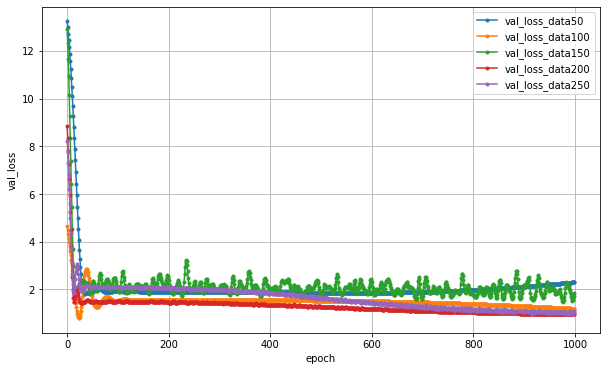

In [35]:
# 学習経過の可視化(大きさ)(validation)

val_loss_array = []
for i in range(len(history_size_array)):
    val_loss_array.append(history_size_array[i].history['val_loss'])
plt.figure(figsize=(10,6))
nb_epoch = len(val_loss_array[i])
for i in range(len(val_loss_array)):
    plt.plot(range(nb_epoch), val_loss_array[i], marker='.', label='val_loss_data%d'%(50*(i+1)))
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.show()

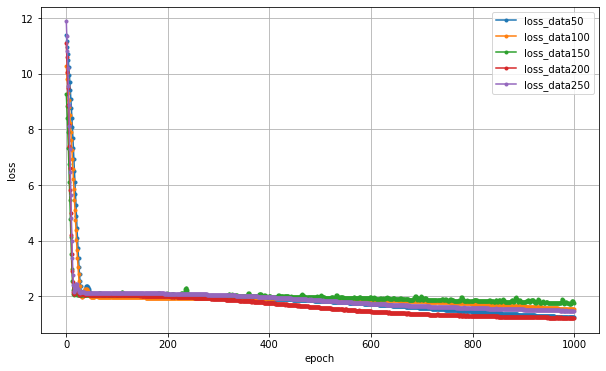

In [36]:
# 学習経過の可視化(大きさ)(train)

loss_array = []
for i in range(len(history_size_array)):
    loss_array.append(history_size_array[i].history['loss'])
plt.figure(figsize=(10,6))
nb_epoch = len(loss_array[i])
for i in range(len(loss_array)):
    plt.plot(range(nb_epoch), loss_array[i], marker='.', label='loss_data%d'%(50*(i+1)))
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [37]:
for i in range(len(val_loss_array)):
    print(val_loss_array[i][-1])

2.301159143447876
1.190405011177063
1.8402906656265259
0.9504286646842957
1.066374659538269


In [38]:
for i in range(len(val_loss_array)):
    print(min(val_loss_array[i]))

1.8101669549942017
0.8022990226745605
1.4797494411468506
0.9482265710830688
0.9854267835617065


In [39]:
min_val_loss_array = []
for i in range(len(val_loss_array)):
    min_val_loss_array.append(min(val_loss_array[i]))

In [40]:
print(min_val_loss_array)

[1.8101669549942017, 0.8022990226745605, 1.4797494411468506, 0.9482265710830688, 0.9854267835617065]


In [41]:
min_loss_array = []
for i in range(len(loss_array)):
    min_loss_array.append(min(loss_array[i]))

In [42]:
print(min_loss_array)

[1.247498869895935, 1.5318619012832642, 1.7377744913101196, 1.2260326147079468, 1.482738733291626]


In [67]:
# データ数50でlossの平均・標準偏差を実験2.1の時と比較(loop20回)
## データについて

### データファイルのpath
no_hole_path = './../vibration_simulation/vibration_data/no_hole_data.csv'
one_hole_path = './../vibration_simulation/vibration_data/one_hole_data.csv'
four_holes_path = './../vibration_simulation/vibration_data/four_holes_data.csv'
nine_holes_path = './../vibration_simulation/vibration_data/nine_holes_data.csv'
sixteen_holes_path = './../vibration_simulation/vibration_data/sixteen_holes_data.csv'
twentyfive_holes_path = './../vibration_simulation/vibration_data/twentyfive_holes_data.csv'

### 入力データと正解データ
rep_freq_array1 = []
rep_freq_array2 = []
rep_freq_array3 = []
no_hole_data1 = []
no_hole_data2 = []
no_hole_data3 = []
fft_no_hole_data1 = []
fft_no_hole_data2 = []
fft_no_hole_data3 = []
size_x_data = []
size_x_data1 = []
size_x_data2 = []
size_x_data3 = []
fft_size_x_data1 = []
fft_size_x_data2 = []
fft_size_x_data3 = []
size_y_data = []
position_x_data = []
position_x_data1 = []
position_x_data2 = []
position_x_data3 = []
position_one_data1 = []
position_one_data2 = []
position_one_data3 = []
position_two_data1 = []
position_two_data2 = []
position_two_data3 = []
position_three_data1 = []
position_three_data2 = []
position_three_data3 = []
position_four_data1 = []
position_four_data2 = []
position_four_data3 = []
position_five_data1 = []
position_five_data2 = []
position_five_data3 = []
position_y_data = []

### ファイル読み込み

#### 欠陥がない場合のデータ
with open(no_hole_path) as f:
    for line in f:
        data_array = line.split(' ')
        no_hole_data1 = data_array[0:1251]
        no_hole_data2 = data_array[1251:2502]
        no_hole_data3 = data_array[2502:-1]
        
#### 大きさに関するデータ
with open(one_hole_path) as fs1:
  for line in fs1:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(four_holes_path) as fs2:
  for line in fs2:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(nine_holes_path) as fs3:
  for line in fs3:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(sixteen_holes_path) as fs4:
  for line in fs4:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(twentyfive_holes_path) as fs5:
  for line in fs5:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])

#### 位置に関するデータ
with open(one_hole_path) as fp1:
  for line in fp1:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_one_data1.append(data_array[3:1254])
    position_one_data2.append(data_array[1254:2505])
    position_one_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(four_holes_path) as fp2:
  for line in fp2:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_two_data1.append(data_array[3:1254])
    position_two_data2.append(data_array[1254:2505])
    position_two_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(nine_holes_path) as fp3:
  for line in fp3:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_three_data1.append(data_array[3:1254])
    position_three_data2.append(data_array[1254:2505])
    position_three_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(sixteen_holes_path) as fp4:
  for line in fp4:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_four_data1.append(data_array[3:1254])
    position_four_data2.append(data_array[1254:2505])
    position_four_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(twentyfive_holes_path) as fp5:
  for line in fp5:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_five_data1.append(data_array[3:1254])
    position_five_data2.append(data_array[1254:2505])
    position_five_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])

### 各配列をnp.array型にして各要素を型変換
no_hole_data1 = np.array(no_hole_data1, dtype=float)
no_hole_data2 = np.array(no_hole_data2, dtype=float)
no_hole_data3 = np.array(no_hole_data3, dtype=float)
size_x_data1 = np.array(size_x_data1, dtype=float)
size_x_data2 = np.array(size_x_data2, dtype=float)
size_x_data3 = np.array(size_x_data3, dtype=float)
size_y_data = np.array(size_y_data, dtype=int)
position_x_data1 = np.array(position_x_data1, dtype=float)
position_x_data2 = np.array(position_x_data2, dtype=float)
position_x_data3 = np.array(position_x_data3, dtype=float)
position_one_data1 = np.array(position_one_data1, dtype=float)
position_two_data1 = np.array(position_two_data1, dtype=float)
position_three_data1 = np.array(position_three_data1, dtype=float)
position_four_data1 = np.array(position_four_data1, dtype=float)
position_five_data1 = np.array(position_five_data1, dtype=float)
position_one_data2 = np.array(position_one_data2, dtype=float)
position_two_data2 = np.array(position_two_data2, dtype=float)
position_three_data2 = np.array(position_three_data2, dtype=float)
position_four_data2 = np.array(position_four_data2, dtype=float)
position_five_data2 = np.array(position_five_data2, dtype=float)
position_one_data3 = np.array(position_one_data3, dtype=float)
position_two_data3 = np.array(position_two_data3, dtype=float)
position_three_data3 = np.array(position_three_data3, dtype=float)
position_four_data3 = np.array(position_four_data3, dtype=float)
position_five_data3 = np.array(position_five_data3, dtype=float)
position_y_data = np.array(position_y_data, dtype=float)

#各振動を高速フーリエ変換→代表周波数のリスト作成→該当周波数のみの振幅を入力とする
## 欠陥なしデータ
# F_no_hole1 = np.fft.fft(no_hole_data1)
# N = len(no_hole_data1)
# Amp_no_hole1 = np.abs(F_no_hole1/(N/2))
# maxid_no_hole1 = signal.argrelmax(Amp_no_hole1[1:int(N/2)], order=1)
# rep_index_no_hole1 = maxid_no_hole1[0]
# F_no_hole2 = np.fft.fft(no_hole_data2)
# Amp_no_hole2 = np.abs(F_no_hole2/(N/2))
# maxid_no_hole2 = signal.argrelmax(Amp_no_hole2[1:int(N/2)], order=1)
# rep_index_no_hole2 = maxid_no_hole2[0]
# F_no_hole3 = np.fft.fft(no_hole_data3)
# Amp_no_hole3 = np.abs(F_no_hole3/(N/2))
# maxid_no_hole3 = signal.argrelmax(Amp_no_hole3[1:int(N/2)], order=1)
# rep_index_no_hole3 = maxid_no_hole3[0]
## 欠陥ありデータ
N = len(no_hole_data1)
### 観測点1
for i in range(len(size_x_data1)):
    F = np.fft.fft(size_x_data1[i])
    Amp = np.abs(F/(N/2))
    fft_size_x_data1.append(Amp)
    maxid = signal.argrelmax(Amp[1:int(N/2)], order=1)
    rep_index = maxid[0]
    for j in range(len(rep_index)):
        if (rep_index[j] in rep_freq_array1) == False:
            rep_freq_array1.append(rep_index[j])
### 観測点2
for i in range(len(size_x_data2)):
    F = np.fft.fft(size_x_data2[i])
    Amp = np.abs(F/(N/2))
    fft_size_x_data2.append(Amp)
    maxid = signal.argrelmax(Amp[1:int(N/2)], order=1)
    rep_index = maxid[0]
    for j in range(len(rep_index)):
        if (rep_index[j] in rep_freq_array2) == False:
            rep_freq_array2.append(rep_index[j])
### 観測点3
for i in range(len(size_x_data3)):
    F = np.fft.fft(size_x_data3[i])
    Amp = np.abs(F/(N/2))
    fft_size_x_data3.append(Amp)
    maxid = signal.argrelmax(Amp[1:int(N/2)], order=1)
    rep_index = maxid[0]
    for j in range(len(rep_index)):
        if (rep_index[j] in rep_freq_array3) == False:
            rep_freq_array3.append(rep_index[j])

#入力値の更新(振動→代表周波数の振幅)
size_x_data1 = []
size_x_data2 = []
size_x_data3 = []
## 観測点1
for i in range(len(fft_size_x_data1)):
    rep_amp = []
    for j in range(len(rep_freq_array1)):
        rep_amp.append(fft_size_x_data1[i][j])
    size_x_data1.append(rep_amp)
## 観測点2
for i in range(len(fft_size_x_data2)):
    rep_amp = []
    for j in range(len(rep_freq_array2)):
        rep_amp.append(fft_size_x_data2[i][j])
    size_x_data2.append(rep_amp)
## 観測点3
for i in range(len(fft_size_x_data3)):
    rep_amp = []
    for j in range(len(rep_freq_array3)):
        rep_amp.append(fft_size_x_data3[i][j])
    size_x_data3.append(rep_amp)
size_x_data1 = np.array(size_x_data1, dtype=float)
size_x_data2 = np.array(size_x_data2, dtype=float)
size_x_data3 = np.array(size_x_data3, dtype=float)

## データの加工
###最大値で割る
max_displacement1 = size_x_data1.max()
max_displacement2 = size_x_data2.max()
max_displacement3 = size_x_data3.max()
size_x_data1 = size_x_data1/max_displacement1
size_x_data2 = size_x_data2/max_displacement2
size_x_data3 = size_x_data3/max_displacement3
# position_x_data1 = position_x_data1/max_displacement
# position_x_data2 = position_x_data2/max_displacement
# position_x_data3 = position_x_data3/max_displacement
# position_one_data1 = position_one_data1/max_displacement
# position_one_data2 = position_one_data2/max_displacement
# position_one_data3 = position_one_data3/max_displacement
# position_two_data1 = position_two_data1/max_displacement
# position_two_data2 = position_two_data2/max_displacement
# position_two_data3 = position_two_data3/max_displacement
# position_three_data1 = position_three_data1/max_displacement
# position_three_data2 = position_three_data2/max_displacement
# position_three_data3 = position_three_data3/max_displacement
# position_four_data1 = position_four_data1/max_displacement
# position_four_data2 = position_four_data2/max_displacement
# position_four_data3 = position_four_data3/max_displacement
# position_five_data1 = position_five_data1/max_displacement
# position_five_data2 = position_five_data2/max_displacement
# position_five_data3 = position_five_data3/max_displacement
# position_y_data = position_y_data/50

### データを50個20回ランダムに選んだときのデータセット作成
x_size_data_array1 = []
x_size_data_array2 = []
x_size_data_array3 = []
# x_position_data_array1 = []
# x_position_data_array2 = []
# x_position_data_array3 = []
y_size_data_array = []
# y_position_data_array = []
x_index = []
for i in range(len(size_x_data1)):
    x_index.append(i)
for i in range(20):
    data_count = 50
    used_index = random.sample(x_index, data_count)
    used_x_size_data1 = []
    used_x_size_data2 = []
    used_x_size_data3 = []
#     used_x_position_data1 = []
#     used_x_position_data2 = []
#     used_x_position_data3 = []
    used_y_size_data = []
#     used_y_position_data = []
    for i in range(len(used_index)):
        used_x_size_data1.append(size_x_data1[used_index[i]])
        used_x_size_data2.append(size_x_data2[used_index[i]])
        used_x_size_data3.append(size_x_data3[used_index[i]])
#         used_x_position_data1.append(position_x_data1[used_index[i]])
#         used_x_position_data2.append(position_x_data2[used_index[i]])
#         used_x_position_data3.append(position_x_data3[used_index[i]])
        used_y_size_data.append(size_y_data[used_index[i]])
#         used_y_position_data.append(position_y_data[used_index[i]])
    y_size_data_array.append(used_y_size_data)
#     y_position_data_array.append(used_y_position_data)
    x_size_data_array1.append(used_x_size_data1)
    x_size_data_array2.append(used_x_size_data2)
    x_size_data_array3.append(used_x_size_data3)
#     x_position_data_array1.append(used_x_position_data1)
#     x_position_data_array2.append(used_x_position_data2)
#     x_position_data_array3.append(used_x_position_data3)

### train用とtest用に分割(9:1)
x_size_train_array1 = []
x_size_train_array2 = []
x_size_train_array3 = []
x_size_test_array1 = []
x_size_test_array2 = []
x_size_test_array3 = []
# x_position_train_array1 = []
# x_position_train_array2 = []
# x_position_train_array3 = []
# x_position_test_array1 = []
# x_position_test_array2 = []
# x_position_test_array3 = []
y_size_train_array = []
y_size_test_array = []
# y_position_train_array = []
# y_position_test_array = []
for i in range(20):
    x_size_train1, x_size_test1, x_size_train2, x_size_test2, x_size_train3, x_size_test3, y_size_train, y_size_test = train_test_split(x_size_data_array1[i], x_size_data_array2[i], x_size_data_array3[i], y_size_data_array[i], test_size=0.10)
#     x_position_train1, x_position_test1, x_position_train2, x_position_test2, x_position_train3, x_position_test3, y_position_train, y_position_test = train_test_split(x_position_data_array1[i], x_position_data_array2[i], x_position_data_array3[i], y_position_data_array[i], test_size=0.10)
    x_size_train_array1.append(np.array(x_size_train1))
    x_size_train_array2.append(np.array(x_size_train2))
    x_size_train_array3.append(np.array(x_size_train3))
    x_size_test_array1.append(np.array(x_size_test1))
    x_size_test_array2.append(np.array(x_size_test2))
    x_size_test_array3.append(np.array(x_size_test3))
#     x_position_train_array1.append(np.array(x_position_train1))
#     x_position_train_array2.append(np.array(x_position_train2))
#     x_position_train_array3.append(np.array(x_position_train3))
#     x_position_test_array1.append(np.array(x_position_test1))
#     x_position_test_array2.append(np.array(x_position_test2))
#     x_position_test_array3.append(np.array(x_position_test3))
    y_size_train_array.append(np.array(y_size_train))
    y_size_test_array.append(np.array(y_size_test))
#     y_position_train_array.append(np.array(y_position_train))
#     y_position_test_array.append(np.array(y_position_test))

In [68]:
# 大きさ推定のモデル
model_size_array = []

for i in range(20):
    # 入力を定義
    input1 = Input(shape=(39,1))
    input2 = Input(shape=(68,1))
    input3 = Input(shape=(42,1))

    # 入力1から結合前まで
    x = Conv1D(32, 3, padding='same', activation='tanh')(input1)
    x = MaxPooling1D(2, padding='same')(x)
    x = Model(inputs=input1, outputs=x)
    # 入力2から結合前まで
    y = Conv1D(32, 3, padding='same', activation='tanh')(input2)
    y = MaxPooling1D(2, padding='same')(y)
    y = Model(inputs=input2, outputs=y)
    # 入力3から結合前まで
    z = Conv1D(32, 3, padding='same', activation='tanh')(input3)
    z = MaxPooling1D(2, padding='same')(z)
    z = Model(inputs=input3, outputs=z)

    # 結合
    combined = concatenate([x.output, y.output, z.output], axis = 1)

    # 密結合
    cnn = Flatten()(combined)
    cnn = Dense(1, activation="linear")(cnn)

    # モデル定義とコンパイル
    cnn_size_model = Model(inputs=[x.input, y.input, z.input], outputs=cnn)
    cnn_size_model.compile(loss='mse', optimizer='adam', metrics=['acc'])
    model_size_array.append(cnn_size_model)

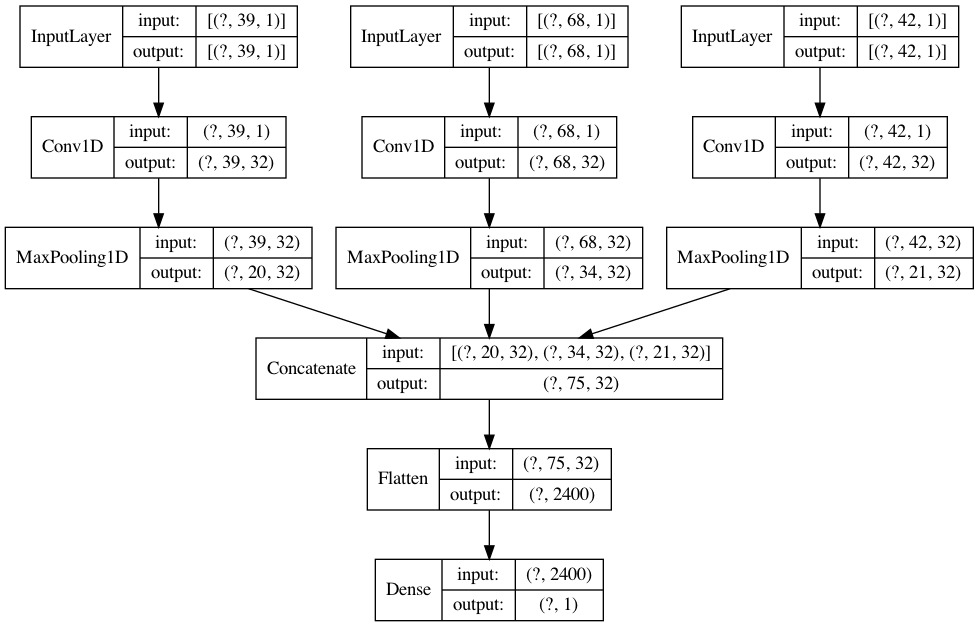

In [69]:
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(model_size_array[0], show_shapes=True, show_layer_names=False)

In [70]:
# 学習ループ
history_size_array = []
for i in range(len(model_size_array)):
    epochs = 1000
    batch_size = 128
    history_size_array.append(model_size_array[i].fit([x_size_train_array1[i], x_size_train_array2[i], x_size_train_array3[i]], y_size_train_array[i], batch_size=batch_size, epochs=epochs, verbose=1, validation_data=([x_size_test_array1[i], x_size_test_array2[i], x_size_test_array3[i]], y_size_test_array[i])))

Epoch 1/1000
1/1 [==============================] - 0s 142ms/step - loss: 11.7537 - acc: 0.0000e+00 - val_loss: 14.5725 - val_acc: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 42ms/step - loss: 11.4955 - acc: 0.0000e+00 - val_loss: 14.2744 - val_acc: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 46ms/step - loss: 11.2368 - acc: 0.0000e+00 - val_loss: 13.9698 - val_acc: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 45ms/step - loss: 10.9732 - acc: 0.0000e+00 - val_loss: 13.6556 - val_acc: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 46ms/step - loss: 10.7018 - acc: 0.0000e+00 - val_loss: 13.3290 - val_acc: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 57ms/step - loss: 10.4205 - acc: 0.0000e+00 - val_loss: 12.9880 - val_acc: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 0s 50ms/step - loss: 10.1277 - acc: 0.0000e+00 - val_loss: 12.6312 - val_acc: 0.0000e+00
Epoch 8/1000

1/1 [==============================] - 0s 43ms/step - loss: 2.0235 - acc: 0.1556 - val_loss: 2.3037 - val_acc: 0.2000
Epoch 63/1000
1/1 [==============================] - 0s 45ms/step - loss: 2.0230 - acc: 0.1556 - val_loss: 2.2964 - val_acc: 0.2000
Epoch 64/1000
1/1 [==============================] - 0s 44ms/step - loss: 2.0208 - acc: 0.1556 - val_loss: 2.2840 - val_acc: 0.2000
Epoch 65/1000
1/1 [==============================] - 0s 42ms/step - loss: 2.0174 - acc: 0.1556 - val_loss: 2.2673 - val_acc: 0.2000
Epoch 66/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.0129 - acc: 0.1556 - val_loss: 2.2474 - val_acc: 0.2000
Epoch 67/1000
1/1 [==============================] - 0s 46ms/step - loss: 2.0080 - acc: 0.1556 - val_loss: 2.2252 - val_acc: 0.2000
Epoch 68/1000
1/1 [==============================] - 0s 40ms/step - loss: 2.0029 - acc: 0.1556 - val_loss: 2.2015 - val_acc: 0.2000
Epoch 69/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.9980 - acc: 0.

Epoch 124/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.9792 - acc: 0.1556 - val_loss: 2.0723 - val_acc: 0.2000
Epoch 125/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9790 - acc: 0.1556 - val_loss: 2.0738 - val_acc: 0.2000
Epoch 126/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9789 - acc: 0.1556 - val_loss: 2.0752 - val_acc: 0.2000
Epoch 127/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.9788 - acc: 0.1556 - val_loss: 2.0766 - val_acc: 0.2000
Epoch 128/1000
1/1 [==============================] - 0s 61ms/step - loss: 1.9786 - acc: 0.1556 - val_loss: 2.0779 - val_acc: 0.2000
Epoch 129/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.9785 - acc: 0.1556 - val_loss: 2.0791 - val_acc: 0.2000
Epoch 130/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.9784 - acc: 0.1556 - val_loss: 2.0801 - val_acc: 0.2000
Epoch 131/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 41ms/step - loss: 1.9709 - acc: 0.1556 - val_loss: 2.0791 - val_acc: 0.2000
Epoch 186/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.9707 - acc: 0.1556 - val_loss: 2.0792 - val_acc: 0.2000
Epoch 187/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.9706 - acc: 0.1556 - val_loss: 2.0792 - val_acc: 0.2000
Epoch 188/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.9704 - acc: 0.1556 - val_loss: 2.0793 - val_acc: 0.2000
Epoch 189/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.9703 - acc: 0.1556 - val_loss: 2.0794 - val_acc: 0.2000
Epoch 190/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.9701 - acc: 0.1556 - val_loss: 2.0795 - val_acc: 0.2000
Epoch 191/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.9700 - acc: 0.1556 - val_loss: 2.0796 - val_acc: 0.2000
Epoch 192/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9698 - 

Epoch 247/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.9605 - acc: 0.1556 - val_loss: 2.0822 - val_acc: 0.2000
Epoch 248/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.9603 - acc: 0.1556 - val_loss: 2.0822 - val_acc: 0.2000
Epoch 249/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.9602 - acc: 0.1556 - val_loss: 2.0823 - val_acc: 0.2000
Epoch 250/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.9600 - acc: 0.1556 - val_loss: 2.0823 - val_acc: 0.2000
Epoch 251/1000
1/1 [==============================] - 0s 60ms/step - loss: 1.9598 - acc: 0.1556 - val_loss: 2.0824 - val_acc: 0.2000
Epoch 252/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.9596 - acc: 0.1556 - val_loss: 2.0824 - val_acc: 0.2000
Epoch 253/1000
1/1 [==============================] - 0s 90ms/step - loss: 1.9594 - acc: 0.1556 - val_loss: 2.0825 - val_acc: 0.2000
Epoch 254/1000
1/1 [==============================] - 0s 37ms/step - 

1/1 [==============================] - 0s 43ms/step - loss: 1.9483 - acc: 0.1556 - val_loss: 2.0854 - val_acc: 0.2000
Epoch 309/1000
1/1 [==============================] - 0s 300ms/step - loss: 1.9480 - acc: 0.1556 - val_loss: 2.0854 - val_acc: 0.2000
Epoch 310/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.9478 - acc: 0.1556 - val_loss: 2.0855 - val_acc: 0.2000
Epoch 311/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.9476 - acc: 0.1556 - val_loss: 2.0855 - val_acc: 0.2000
Epoch 312/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.9474 - acc: 0.1556 - val_loss: 2.0856 - val_acc: 0.2000
Epoch 313/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.9472 - acc: 0.1556 - val_loss: 2.0856 - val_acc: 0.2000
Epoch 314/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.9469 - acc: 0.1556 - val_loss: 2.0857 - val_acc: 0.2000
Epoch 315/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.9467 -

Epoch 370/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9335 - acc: 0.1556 - val_loss: 2.0895 - val_acc: 0.2000
Epoch 371/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9333 - acc: 0.1556 - val_loss: 2.0896 - val_acc: 0.2000
Epoch 372/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9330 - acc: 0.1556 - val_loss: 2.0897 - val_acc: 0.2000
Epoch 373/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9327 - acc: 0.1556 - val_loss: 2.0898 - val_acc: 0.2000
Epoch 374/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.9325 - acc: 0.1556 - val_loss: 2.0899 - val_acc: 0.2000
Epoch 375/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9322 - acc: 0.1556 - val_loss: 2.0900 - val_acc: 0.2000
Epoch 376/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9320 - acc: 0.1556 - val_loss: 2.0901 - val_acc: 0.2000
Epoch 377/1000
1/1 [==============================] - 0s 46ms/step - 

1/1 [==============================] - 0s 42ms/step - loss: 1.9165 - acc: 0.1556 - val_loss: 2.0950 - val_acc: 0.2000
Epoch 432/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.9162 - acc: 0.1556 - val_loss: 2.0951 - val_acc: 0.2000
Epoch 433/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.9159 - acc: 0.1556 - val_loss: 2.0952 - val_acc: 0.2000
Epoch 434/1000
1/1 [==============================] - 0s 71ms/step - loss: 1.9156 - acc: 0.1556 - val_loss: 2.0953 - val_acc: 0.2000
Epoch 435/1000
1/1 [==============================] - 0s 56ms/step - loss: 1.9153 - acc: 0.1556 - val_loss: 2.0954 - val_acc: 0.2000
Epoch 436/1000
1/1 [==============================] - 0s 55ms/step - loss: 1.9150 - acc: 0.1556 - val_loss: 2.0955 - val_acc: 0.2000
Epoch 437/1000
1/1 [==============================] - 0s 79ms/step - loss: 1.9147 - acc: 0.1556 - val_loss: 2.0956 - val_acc: 0.2000
Epoch 438/1000
1/1 [==============================] - 0s 72ms/step - loss: 1.9144 - 

Epoch 493/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.8965 - acc: 0.1556 - val_loss: 2.1020 - val_acc: 0.2000
Epoch 494/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8962 - acc: 0.1556 - val_loss: 2.1021 - val_acc: 0.2000
Epoch 495/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8958 - acc: 0.1556 - val_loss: 2.1022 - val_acc: 0.2000
Epoch 496/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8955 - acc: 0.1556 - val_loss: 2.1023 - val_acc: 0.2000
Epoch 497/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.8951 - acc: 0.1556 - val_loss: 2.1024 - val_acc: 0.2000
Epoch 498/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8948 - acc: 0.1556 - val_loss: 2.1026 - val_acc: 0.2000
Epoch 499/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8944 - acc: 0.1556 - val_loss: 2.1027 - val_acc: 0.2000
Epoch 500/1000
1/1 [==============================] - 0s 29ms/step - 

1/1 [==============================] - 0s 28ms/step - loss: 1.8743 - acc: 0.1556 - val_loss: 2.1104 - val_acc: 0.2000
Epoch 555/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8740 - acc: 0.1556 - val_loss: 2.1105 - val_acc: 0.2000
Epoch 556/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8736 - acc: 0.1556 - val_loss: 2.1107 - val_acc: 0.2000
Epoch 557/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.8732 - acc: 0.1556 - val_loss: 2.1108 - val_acc: 0.2000
Epoch 558/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.8728 - acc: 0.1556 - val_loss: 2.1110 - val_acc: 0.2000
Epoch 559/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.8724 - acc: 0.1556 - val_loss: 2.1112 - val_acc: 0.2000
Epoch 560/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8720 - acc: 0.1556 - val_loss: 2.1113 - val_acc: 0.2000
Epoch 561/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8717 - 

Epoch 616/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8498 - acc: 0.1556 - val_loss: 2.1214 - val_acc: 0.2000
Epoch 617/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8494 - acc: 0.1556 - val_loss: 2.1216 - val_acc: 0.2000
Epoch 618/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.8489 - acc: 0.1556 - val_loss: 2.1218 - val_acc: 0.2000
Epoch 619/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8485 - acc: 0.1556 - val_loss: 2.1220 - val_acc: 0.2000
Epoch 620/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8481 - acc: 0.1556 - val_loss: 2.1222 - val_acc: 0.2000
Epoch 621/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8477 - acc: 0.1556 - val_loss: 2.1224 - val_acc: 0.2000
Epoch 622/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8473 - acc: 0.1556 - val_loss: 2.1226 - val_acc: 0.2000
Epoch 623/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 32ms/step - loss: 1.8235 - acc: 0.1556 - val_loss: 2.1347 - val_acc: 0.2000
Epoch 678/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.8230 - acc: 0.1556 - val_loss: 2.1349 - val_acc: 0.2000
Epoch 679/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8226 - acc: 0.1556 - val_loss: 2.1352 - val_acc: 0.2000
Epoch 680/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8221 - acc: 0.1556 - val_loss: 2.1354 - val_acc: 0.2000
Epoch 681/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8217 - acc: 0.1556 - val_loss: 2.1357 - val_acc: 0.2000
Epoch 682/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8212 - acc: 0.1556 - val_loss: 2.1359 - val_acc: 0.2000
Epoch 683/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8208 - acc: 0.1556 - val_loss: 2.1362 - val_acc: 0.2000
Epoch 684/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8203 - 

Epoch 739/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7943 - acc: 0.1556 - val_loss: 2.1518 - val_acc: 0.2000
Epoch 740/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7938 - acc: 0.1556 - val_loss: 2.1520 - val_acc: 0.2000
Epoch 741/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7933 - acc: 0.1556 - val_loss: 2.1523 - val_acc: 0.2000
Epoch 742/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7928 - acc: 0.1556 - val_loss: 2.1526 - val_acc: 0.2000
Epoch 743/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7923 - acc: 0.1556 - val_loss: 2.1529 - val_acc: 0.2000
Epoch 744/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7918 - acc: 0.1556 - val_loss: 2.1532 - val_acc: 0.2000
Epoch 745/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7913 - acc: 0.1556 - val_loss: 2.1535 - val_acc: 0.2000
Epoch 746/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 1.7609 - acc: 0.1556 - val_loss: 2.1729 - val_acc: 0.2000
Epoch 801/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7603 - acc: 0.1556 - val_loss: 2.1733 - val_acc: 0.2000
Epoch 802/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7597 - acc: 0.1556 - val_loss: 2.1738 - val_acc: 0.2000
Epoch 803/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7591 - acc: 0.1556 - val_loss: 2.1742 - val_acc: 0.2000
Epoch 804/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7585 - acc: 0.1556 - val_loss: 2.1746 - val_acc: 0.2000
Epoch 805/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7579 - acc: 0.1556 - val_loss: 2.1750 - val_acc: 0.2000
Epoch 806/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7573 - acc: 0.1556 - val_loss: 2.1754 - val_acc: 0.2000
Epoch 807/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7568 - 

Epoch 862/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7217 - acc: 0.1556 - val_loss: 2.1988 - val_acc: 0.2000
Epoch 863/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.7210 - acc: 0.1556 - val_loss: 2.1992 - val_acc: 0.2000
Epoch 864/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.7203 - acc: 0.1556 - val_loss: 2.1997 - val_acc: 0.2000
Epoch 865/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.7196 - acc: 0.1556 - val_loss: 2.2001 - val_acc: 0.2000
Epoch 866/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.7189 - acc: 0.1556 - val_loss: 2.2006 - val_acc: 0.2000
Epoch 867/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.7182 - acc: 0.1556 - val_loss: 2.2011 - val_acc: 0.2000
Epoch 868/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7175 - acc: 0.1556 - val_loss: 2.2015 - val_acc: 0.2000
Epoch 869/1000
1/1 [==============================] - 0s 28ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 1.6769 - acc: 0.1556 - val_loss: 2.2296 - val_acc: 0.2000
Epoch 924/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6761 - acc: 0.1556 - val_loss: 2.2301 - val_acc: 0.2000
Epoch 925/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6753 - acc: 0.1556 - val_loss: 2.2307 - val_acc: 0.2000
Epoch 926/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.6745 - acc: 0.1556 - val_loss: 2.2313 - val_acc: 0.2000
Epoch 927/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.6738 - acc: 0.1556 - val_loss: 2.2319 - val_acc: 0.2000
Epoch 928/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6730 - acc: 0.1556 - val_loss: 2.2325 - val_acc: 0.2000
Epoch 929/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.6722 - acc: 0.1556 - val_loss: 2.2330 - val_acc: 0.2000
Epoch 930/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.6714 - 

Epoch 985/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6251 - acc: 0.1556 - val_loss: 2.2678 - val_acc: 0.2000
Epoch 986/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6242 - acc: 0.1556 - val_loss: 2.2685 - val_acc: 0.2000
Epoch 987/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6234 - acc: 0.1556 - val_loss: 2.2692 - val_acc: 0.2000
Epoch 988/1000
1/1 [==============================] - 0s 271ms/step - loss: 1.6225 - acc: 0.1556 - val_loss: 2.2698 - val_acc: 0.2000
Epoch 989/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6216 - acc: 0.1556 - val_loss: 2.2705 - val_acc: 0.2000
Epoch 990/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6207 - acc: 0.1556 - val_loss: 2.2712 - val_acc: 0.2000
Epoch 991/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.6198 - acc: 0.1556 - val_loss: 2.2718 - val_acc: 0.2000
Epoch 992/1000
1/1 [==============================] - 0s 28ms/step -

1/1 [==============================] - 0s 41ms/step - loss: 1.8452 - acc: 0.2000 - val_loss: 2.1833 - val_acc: 0.2000
Epoch 47/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.8202 - acc: 0.2000 - val_loss: 2.1176 - val_acc: 0.2000
Epoch 48/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8029 - acc: 0.2000 - val_loss: 2.0617 - val_acc: 0.2000
Epoch 49/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7928 - acc: 0.2000 - val_loss: 2.0154 - val_acc: 0.2000
Epoch 50/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7889 - acc: 0.2000 - val_loss: 1.9781 - val_acc: 0.2000
Epoch 51/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.7900 - acc: 0.2000 - val_loss: 1.9487 - val_acc: 0.2000
Epoch 52/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.7944 - acc: 0.2000 - val_loss: 1.9263 - val_acc: 0.2000
Epoch 53/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8009 - acc: 0.

1/1 [==============================] - 0s 32ms/step - loss: 1.7848 - acc: 0.2000 - val_loss: 2.0100 - val_acc: 0.2000
Epoch 109/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7847 - acc: 0.2000 - val_loss: 2.0115 - val_acc: 0.2000
Epoch 110/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7847 - acc: 0.2000 - val_loss: 2.0125 - val_acc: 0.2000
Epoch 111/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7846 - acc: 0.2000 - val_loss: 2.0131 - val_acc: 0.2000
Epoch 112/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7845 - acc: 0.2000 - val_loss: 2.0133 - val_acc: 0.2000
Epoch 113/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7845 - acc: 0.2000 - val_loss: 2.0130 - val_acc: 0.2000
Epoch 114/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7844 - acc: 0.2000 - val_loss: 2.0124 - val_acc: 0.2000
Epoch 115/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7843 - 

Epoch 170/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7791 - acc: 0.2000 - val_loss: 2.0002 - val_acc: 0.2000
Epoch 171/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7790 - acc: 0.2000 - val_loss: 2.0002 - val_acc: 0.2000
Epoch 172/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7789 - acc: 0.2000 - val_loss: 2.0002 - val_acc: 0.2000
Epoch 173/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7788 - acc: 0.2000 - val_loss: 2.0002 - val_acc: 0.2000
Epoch 174/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7787 - acc: 0.2000 - val_loss: 2.0001 - val_acc: 0.2000
Epoch 175/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7786 - acc: 0.2000 - val_loss: 2.0001 - val_acc: 0.2000
Epoch 176/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7785 - acc: 0.2000 - val_loss: 2.0000 - val_acc: 0.2000
Epoch 177/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 1.7725 - acc: 0.2000 - val_loss: 1.9961 - val_acc: 0.2000
Epoch 232/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7724 - acc: 0.2000 - val_loss: 1.9960 - val_acc: 0.2000
Epoch 233/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7722 - acc: 0.2000 - val_loss: 1.9960 - val_acc: 0.2000
Epoch 234/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7721 - acc: 0.2000 - val_loss: 1.9959 - val_acc: 0.2000
Epoch 235/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.7720 - acc: 0.2000 - val_loss: 1.9958 - val_acc: 0.2000
Epoch 236/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.7719 - acc: 0.2000 - val_loss: 1.9957 - val_acc: 0.2000
Epoch 237/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7718 - acc: 0.2000 - val_loss: 1.9957 - val_acc: 0.2000
Epoch 238/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7717 - 

Epoch 293/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7645 - acc: 0.2000 - val_loss: 1.9912 - val_acc: 0.2000
Epoch 294/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7644 - acc: 0.2000 - val_loss: 1.9911 - val_acc: 0.2000
Epoch 295/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7642 - acc: 0.2000 - val_loss: 1.9911 - val_acc: 0.2000
Epoch 296/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.7641 - acc: 0.2000 - val_loss: 1.9910 - val_acc: 0.2000
Epoch 297/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7639 - acc: 0.2000 - val_loss: 1.9909 - val_acc: 0.2000
Epoch 298/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7638 - acc: 0.2000 - val_loss: 1.9908 - val_acc: 0.2000
Epoch 299/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7636 - acc: 0.2000 - val_loss: 1.9907 - val_acc: 0.2000
Epoch 300/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 31ms/step - loss: 1.7549 - acc: 0.2000 - val_loss: 1.9854 - val_acc: 0.2000
Epoch 355/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7547 - acc: 0.2000 - val_loss: 1.9853 - val_acc: 0.2000
Epoch 356/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.7545 - acc: 0.2000 - val_loss: 1.9852 - val_acc: 0.2000
Epoch 357/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7544 - acc: 0.2000 - val_loss: 1.9850 - val_acc: 0.2000
Epoch 358/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7542 - acc: 0.2000 - val_loss: 1.9849 - val_acc: 0.2000
Epoch 359/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7540 - acc: 0.2000 - val_loss: 1.9848 - val_acc: 0.2000
Epoch 360/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.7538 - acc: 0.2000 - val_loss: 1.9847 - val_acc: 0.2000
Epoch 361/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7536 - 

Epoch 416/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.7426 - acc: 0.2000 - val_loss: 1.9780 - val_acc: 0.2000
Epoch 417/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7424 - acc: 0.2000 - val_loss: 1.9778 - val_acc: 0.2000
Epoch 418/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7422 - acc: 0.2000 - val_loss: 1.9777 - val_acc: 0.2000
Epoch 419/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7419 - acc: 0.2000 - val_loss: 1.9775 - val_acc: 0.2000
Epoch 420/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7417 - acc: 0.2000 - val_loss: 1.9774 - val_acc: 0.2000
Epoch 421/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.7415 - acc: 0.2000 - val_loss: 1.9773 - val_acc: 0.2000
Epoch 422/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7413 - acc: 0.2000 - val_loss: 1.9771 - val_acc: 0.2000
Epoch 423/1000
1/1 [==============================] - 0s 28ms/step - 

1/1 [==============================] - 0s 26ms/step - loss: 1.7267 - acc: 0.2000 - val_loss: 1.9676 - val_acc: 0.2000
Epoch 478/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7264 - acc: 0.2000 - val_loss: 1.9674 - val_acc: 0.2000
Epoch 479/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7261 - acc: 0.2000 - val_loss: 1.9672 - val_acc: 0.2000
Epoch 480/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7258 - acc: 0.2000 - val_loss: 1.9670 - val_acc: 0.2000
Epoch 481/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7255 - acc: 0.2000 - val_loss: 1.9668 - val_acc: 0.2000
Epoch 482/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7252 - acc: 0.2000 - val_loss: 1.9666 - val_acc: 0.2000
Epoch 483/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7249 - acc: 0.2000 - val_loss: 1.9665 - val_acc: 0.2000
Epoch 484/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.7246 - 

Epoch 539/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7059 - acc: 0.2000 - val_loss: 1.9538 - val_acc: 0.2000
Epoch 540/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7055 - acc: 0.2000 - val_loss: 1.9535 - val_acc: 0.2000
Epoch 541/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.7052 - acc: 0.2000 - val_loss: 1.9531 - val_acc: 0.2000
Epoch 542/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7048 - acc: 0.2000 - val_loss: 1.9528 - val_acc: 0.2000
Epoch 543/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7044 - acc: 0.2000 - val_loss: 1.9526 - val_acc: 0.2000
Epoch 544/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7040 - acc: 0.2000 - val_loss: 1.9523 - val_acc: 0.2000
Epoch 545/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7036 - acc: 0.2000 - val_loss: 1.9521 - val_acc: 0.2000
Epoch 546/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 1.6799 - acc: 0.2000 - val_loss: 1.9350 - val_acc: 0.2000
Epoch 601/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6794 - acc: 0.2000 - val_loss: 1.9346 - val_acc: 0.2000
Epoch 602/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6789 - acc: 0.2000 - val_loss: 1.9343 - val_acc: 0.2000
Epoch 603/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6785 - acc: 0.2000 - val_loss: 1.9340 - val_acc: 0.2000
Epoch 604/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6780 - acc: 0.2000 - val_loss: 1.9336 - val_acc: 0.2000
Epoch 605/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.6775 - acc: 0.2000 - val_loss: 1.9333 - val_acc: 0.2000
Epoch 606/1000
1/1 [==============================] - 0s 261ms/step - loss: 1.6770 - acc: 0.2000 - val_loss: 1.9329 - val_acc: 0.2000
Epoch 607/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6765 -

Epoch 662/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6481 - acc: 0.2000 - val_loss: 1.9109 - val_acc: 0.2000
Epoch 663/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6476 - acc: 0.2000 - val_loss: 1.9105 - val_acc: 0.2000
Epoch 664/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6470 - acc: 0.2000 - val_loss: 1.9101 - val_acc: 0.2000
Epoch 665/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6465 - acc: 0.2000 - val_loss: 1.9096 - val_acc: 0.2000
Epoch 666/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.6459 - acc: 0.2000 - val_loss: 1.9091 - val_acc: 0.2000
Epoch 667/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6453 - acc: 0.2000 - val_loss: 1.9086 - val_acc: 0.2000
Epoch 668/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6448 - acc: 0.2000 - val_loss: 1.9082 - val_acc: 0.2000
Epoch 669/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 1.6121 - acc: 0.2000 - val_loss: 1.8818 - val_acc: 0.2000
Epoch 724/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6115 - acc: 0.2000 - val_loss: 1.8813 - val_acc: 0.2000
Epoch 725/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.6109 - acc: 0.2000 - val_loss: 1.8808 - val_acc: 0.2000
Epoch 726/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.6102 - acc: 0.2000 - val_loss: 1.8802 - val_acc: 0.2000
Epoch 727/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6096 - acc: 0.2000 - val_loss: 1.8796 - val_acc: 0.2000
Epoch 728/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6090 - acc: 0.2000 - val_loss: 1.8791 - val_acc: 0.2000
Epoch 729/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6083 - acc: 0.2000 - val_loss: 1.8785 - val_acc: 0.2000
Epoch 730/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6077 - 

Epoch 785/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5723 - acc: 0.2000 - val_loss: 1.8463 - val_acc: 0.2000
Epoch 786/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.5716 - acc: 0.2000 - val_loss: 1.8456 - val_acc: 0.2000
Epoch 787/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.5710 - acc: 0.2000 - val_loss: 1.8451 - val_acc: 0.2000
Epoch 788/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5703 - acc: 0.2000 - val_loss: 1.8445 - val_acc: 0.2000
Epoch 789/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5697 - acc: 0.2000 - val_loss: 1.8440 - val_acc: 0.2000
Epoch 790/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5690 - acc: 0.2000 - val_loss: 1.8434 - val_acc: 0.2000
Epoch 791/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5684 - acc: 0.2000 - val_loss: 1.8428 - val_acc: 0.2000
Epoch 792/1000
1/1 [==============================] - 0s 28ms/step - 

1/1 [==============================] - 0s 36ms/step - loss: 1.5321 - acc: 0.2000 - val_loss: 1.8082 - val_acc: 0.2000
Epoch 847/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5314 - acc: 0.2000 - val_loss: 1.8076 - val_acc: 0.2000
Epoch 848/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5308 - acc: 0.2000 - val_loss: 1.8071 - val_acc: 0.2000
Epoch 849/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5301 - acc: 0.2000 - val_loss: 1.8065 - val_acc: 0.2000
Epoch 850/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5295 - acc: 0.2000 - val_loss: 1.8060 - val_acc: 0.2000
Epoch 851/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5288 - acc: 0.2000 - val_loss: 1.8053 - val_acc: 0.2000
Epoch 852/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5282 - acc: 0.2000 - val_loss: 1.8046 - val_acc: 0.2000
Epoch 853/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5275 - 

Epoch 908/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4923 - acc: 0.2000 - val_loss: 1.7686 - val_acc: 0.2000
Epoch 909/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4917 - acc: 0.2000 - val_loss: 1.7682 - val_acc: 0.2000
Epoch 910/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4911 - acc: 0.2000 - val_loss: 1.7675 - val_acc: 0.2000
Epoch 911/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4904 - acc: 0.2000 - val_loss: 1.7668 - val_acc: 0.2000
Epoch 912/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4898 - acc: 0.2000 - val_loss: 1.7662 - val_acc: 0.2000
Epoch 913/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.4892 - acc: 0.2000 - val_loss: 1.7655 - val_acc: 0.2000
Epoch 914/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.4886 - acc: 0.2000 - val_loss: 1.7648 - val_acc: 0.2000
Epoch 915/1000
1/1 [==============================] - 0s 37ms/step - 

1/1 [==============================] - 0s 31ms/step - loss: 1.4555 - acc: 0.2000 - val_loss: 1.7314 - val_acc: 0.2000
Epoch 970/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4550 - acc: 0.2000 - val_loss: 1.7309 - val_acc: 0.2000
Epoch 971/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4544 - acc: 0.2000 - val_loss: 1.7305 - val_acc: 0.2000
Epoch 972/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4538 - acc: 0.2000 - val_loss: 1.7302 - val_acc: 0.2000
Epoch 973/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4533 - acc: 0.2000 - val_loss: 1.7295 - val_acc: 0.2000
Epoch 974/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.4527 - acc: 0.2000 - val_loss: 1.7286 - val_acc: 0.2000
Epoch 975/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.4521 - acc: 0.2000 - val_loss: 1.7279 - val_acc: 0.2000
Epoch 976/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4515 - 

1/1 [==============================] - 0s 30ms/step - loss: 2.2865 - acc: 0.2889 - val_loss: 2.7673 - val_acc: 0.2000
Epoch 31/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.2949 - acc: 0.2889 - val_loss: 2.7627 - val_acc: 0.2000
Epoch 32/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.3303 - acc: 0.2889 - val_loss: 2.7806 - val_acc: 0.2000
Epoch 33/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.3833 - acc: 0.2889 - val_loss: 2.8115 - val_acc: 0.2000
Epoch 34/1000
1/1 [==============================] - 0s 36ms/step - loss: 2.4436 - acc: 0.2889 - val_loss: 2.8459 - val_acc: 0.2000
Epoch 35/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.5012 - acc: 0.2889 - val_loss: 2.8760 - val_acc: 0.2000
Epoch 36/1000
1/1 [==============================] - 0s 38ms/step - loss: 2.5479 - acc: 0.2889 - val_loss: 2.8962 - val_acc: 0.2000
Epoch 37/1000
1/1 [==============================] - 0s 35ms/step - loss: 2.5780 - acc: 0.

1/1 [==============================] - 0s 29ms/step - loss: 2.2799 - acc: 0.2889 - val_loss: 2.7948 - val_acc: 0.2000
Epoch 93/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.2799 - acc: 0.2889 - val_loss: 2.7956 - val_acc: 0.2000
Epoch 94/1000
1/1 [==============================] - 0s 36ms/step - loss: 2.2799 - acc: 0.2889 - val_loss: 2.7959 - val_acc: 0.2000
Epoch 95/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.2798 - acc: 0.2889 - val_loss: 2.7958 - val_acc: 0.2000
Epoch 96/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.2797 - acc: 0.2889 - val_loss: 2.7953 - val_acc: 0.2000
Epoch 97/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.2795 - acc: 0.2889 - val_loss: 2.7945 - val_acc: 0.2000
Epoch 98/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.2793 - acc: 0.2889 - val_loss: 2.7934 - val_acc: 0.2000
Epoch 99/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.2790 - acc: 0.

Epoch 154/1000
1/1 [==============================] - 0s 36ms/step - loss: 2.2695 - acc: 0.2889 - val_loss: 2.7790 - val_acc: 0.2000
Epoch 155/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.2694 - acc: 0.2889 - val_loss: 2.7790 - val_acc: 0.2000
Epoch 156/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.2692 - acc: 0.2889 - val_loss: 2.7789 - val_acc: 0.2000
Epoch 157/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.2690 - acc: 0.2889 - val_loss: 2.7789 - val_acc: 0.2000
Epoch 158/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.2688 - acc: 0.2889 - val_loss: 2.7788 - val_acc: 0.2000
Epoch 159/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2686 - acc: 0.2889 - val_loss: 2.7787 - val_acc: 0.2000
Epoch 160/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.2684 - acc: 0.2889 - val_loss: 2.7785 - val_acc: 0.2000
Epoch 161/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 2.2573 - acc: 0.2889 - val_loss: 2.7717 - val_acc: 0.2000
Epoch 216/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2571 - acc: 0.2889 - val_loss: 2.7716 - val_acc: 0.2000
Epoch 217/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.2569 - acc: 0.2889 - val_loss: 2.7714 - val_acc: 0.2000
Epoch 218/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.2567 - acc: 0.2889 - val_loss: 2.7713 - val_acc: 0.2000
Epoch 219/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.2565 - acc: 0.2889 - val_loss: 2.7711 - val_acc: 0.2000
Epoch 220/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2562 - acc: 0.2889 - val_loss: 2.7710 - val_acc: 0.2000
Epoch 221/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.2560 - acc: 0.2889 - val_loss: 2.7708 - val_acc: 0.2000
Epoch 222/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.2558 - 

Epoch 277/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.2417 - acc: 0.2889 - val_loss: 2.7615 - val_acc: 0.2000
Epoch 278/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.2414 - acc: 0.2889 - val_loss: 2.7614 - val_acc: 0.2000
Epoch 279/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.2412 - acc: 0.2889 - val_loss: 2.7612 - val_acc: 0.2000
Epoch 280/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2409 - acc: 0.2889 - val_loss: 2.7610 - val_acc: 0.2000
Epoch 281/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.2406 - acc: 0.2889 - val_loss: 2.7608 - val_acc: 0.2000
Epoch 282/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.2403 - acc: 0.2889 - val_loss: 2.7606 - val_acc: 0.2000
Epoch 283/1000
1/1 [==============================] - 0s 38ms/step - loss: 2.2400 - acc: 0.2889 - val_loss: 2.7604 - val_acc: 0.2000
Epoch 284/1000
1/1 [==============================] - 0s 28ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 2.2207 - acc: 0.2889 - val_loss: 2.7480 - val_acc: 0.2000
Epoch 339/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.2202 - acc: 0.2889 - val_loss: 2.7477 - val_acc: 0.2000
Epoch 340/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2198 - acc: 0.2889 - val_loss: 2.7474 - val_acc: 0.2000
Epoch 341/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2194 - acc: 0.2889 - val_loss: 2.7472 - val_acc: 0.2000
Epoch 342/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2190 - acc: 0.2889 - val_loss: 2.7469 - val_acc: 0.2000
Epoch 343/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2186 - acc: 0.2889 - val_loss: 2.7466 - val_acc: 0.2000
Epoch 344/1000
1/1 [==============================] - 0s 37ms/step - loss: 2.2182 - acc: 0.2889 - val_loss: 2.7463 - val_acc: 0.2000
Epoch 345/1000
1/1 [==============================] - 0s 27ms/step - loss: 2.2178 - 

Epoch 400/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1905 - acc: 0.2889 - val_loss: 2.7275 - val_acc: 0.2000
Epoch 401/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1899 - acc: 0.2889 - val_loss: 2.7271 - val_acc: 0.2000
Epoch 402/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.1893 - acc: 0.2889 - val_loss: 2.7267 - val_acc: 0.2000
Epoch 403/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1887 - acc: 0.2889 - val_loss: 2.7263 - val_acc: 0.2000
Epoch 404/1000
1/1 [==============================] - 0s 38ms/step - loss: 2.1881 - acc: 0.2889 - val_loss: 2.7259 - val_acc: 0.2000
Epoch 405/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1875 - acc: 0.2889 - val_loss: 2.7254 - val_acc: 0.2000
Epoch 406/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1869 - acc: 0.2889 - val_loss: 2.7250 - val_acc: 0.2000
Epoch 407/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 28ms/step - loss: 2.1472 - acc: 0.2889 - val_loss: 2.6984 - val_acc: 0.2000
Epoch 462/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.1464 - acc: 0.2889 - val_loss: 2.6978 - val_acc: 0.2000
Epoch 463/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1456 - acc: 0.2889 - val_loss: 2.6972 - val_acc: 0.2000
Epoch 464/1000
1/1 [==============================] - 0s 36ms/step - loss: 2.1447 - acc: 0.2889 - val_loss: 2.6967 - val_acc: 0.2000
Epoch 465/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1439 - acc: 0.2889 - val_loss: 2.6962 - val_acc: 0.2000
Epoch 466/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1430 - acc: 0.2889 - val_loss: 2.6957 - val_acc: 0.2000
Epoch 467/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1422 - acc: 0.2889 - val_loss: 2.6951 - val_acc: 0.2000
Epoch 468/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1413 - 

Epoch 523/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.0870 - acc: 0.2889 - val_loss: 2.6579 - val_acc: 0.2000
Epoch 524/1000
1/1 [==============================] - 0s 37ms/step - loss: 2.0859 - acc: 0.2889 - val_loss: 2.6571 - val_acc: 0.2000
Epoch 525/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.0848 - acc: 0.2889 - val_loss: 2.6563 - val_acc: 0.2000
Epoch 526/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.0837 - acc: 0.2889 - val_loss: 2.6556 - val_acc: 0.2000
Epoch 527/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.0825 - acc: 0.2889 - val_loss: 2.6548 - val_acc: 0.2000
Epoch 528/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.0814 - acc: 0.2889 - val_loss: 2.6540 - val_acc: 0.2000
Epoch 529/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.0803 - acc: 0.2889 - val_loss: 2.6532 - val_acc: 0.2000
Epoch 530/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 39ms/step - loss: 2.0104 - acc: 0.2889 - val_loss: 2.6043 - val_acc: 0.2000
Epoch 585/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.0090 - acc: 0.2889 - val_loss: 2.6033 - val_acc: 0.2000
Epoch 586/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.0076 - acc: 0.2889 - val_loss: 2.6023 - val_acc: 0.2000
Epoch 587/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.0062 - acc: 0.2889 - val_loss: 2.6013 - val_acc: 0.2000
Epoch 588/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.0048 - acc: 0.2889 - val_loss: 2.6003 - val_acc: 0.2000
Epoch 589/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.0033 - acc: 0.2889 - val_loss: 2.5993 - val_acc: 0.2000
Epoch 590/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.0019 - acc: 0.2889 - val_loss: 2.5983 - val_acc: 0.2000
Epoch 591/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.0005 - 

Epoch 646/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9174 - acc: 0.2889 - val_loss: 2.5359 - val_acc: 0.2000
Epoch 647/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9158 - acc: 0.2889 - val_loss: 2.5347 - val_acc: 0.2000
Epoch 648/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9142 - acc: 0.2889 - val_loss: 2.5334 - val_acc: 0.2000
Epoch 649/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9127 - acc: 0.2889 - val_loss: 2.5322 - val_acc: 0.2000
Epoch 650/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.9110 - acc: 0.2889 - val_loss: 2.5311 - val_acc: 0.2000
Epoch 651/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9095 - acc: 0.2889 - val_loss: 2.5299 - val_acc: 0.2000
Epoch 652/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.9079 - acc: 0.2889 - val_loss: 2.5287 - val_acc: 0.2000
Epoch 653/1000
1/1 [==============================] - 0s 36ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 1.8185 - acc: 0.2889 - val_loss: 2.4587 - val_acc: 0.2000
Epoch 708/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8169 - acc: 0.2889 - val_loss: 2.4573 - val_acc: 0.2000
Epoch 709/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8152 - acc: 0.2889 - val_loss: 2.4559 - val_acc: 0.2000
Epoch 710/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8136 - acc: 0.2889 - val_loss: 2.4546 - val_acc: 0.2000
Epoch 711/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8119 - acc: 0.2889 - val_loss: 2.4534 - val_acc: 0.2000
Epoch 712/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8103 - acc: 0.2889 - val_loss: 2.4520 - val_acc: 0.2000
Epoch 713/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.8087 - acc: 0.2889 - val_loss: 2.4506 - val_acc: 0.2000
Epoch 714/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8070 - 

Epoch 769/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7182 - acc: 0.2889 - val_loss: 2.3741 - val_acc: 0.2000
Epoch 770/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7167 - acc: 0.2889 - val_loss: 2.3726 - val_acc: 0.2000
Epoch 771/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7151 - acc: 0.2889 - val_loss: 2.3712 - val_acc: 0.2000
Epoch 772/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7136 - acc: 0.2889 - val_loss: 2.3698 - val_acc: 0.2000
Epoch 773/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7120 - acc: 0.2889 - val_loss: 2.3686 - val_acc: 0.2000
Epoch 774/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7104 - acc: 0.2889 - val_loss: 2.3672 - val_acc: 0.2000
Epoch 775/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7089 - acc: 0.2889 - val_loss: 2.3659 - val_acc: 0.2000
Epoch 776/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 28ms/step - loss: 1.6290 - acc: 0.2889 - val_loss: 2.2910 - val_acc: 0.2000
Epoch 831/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6276 - acc: 0.2889 - val_loss: 2.2897 - val_acc: 0.2000
Epoch 832/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6263 - acc: 0.2889 - val_loss: 2.2884 - val_acc: 0.2000
Epoch 833/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6249 - acc: 0.2889 - val_loss: 2.2873 - val_acc: 0.2000
Epoch 834/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.6236 - acc: 0.2889 - val_loss: 2.2860 - val_acc: 0.2000
Epoch 835/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6223 - acc: 0.2889 - val_loss: 2.2847 - val_acc: 0.2000
Epoch 836/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6210 - acc: 0.2889 - val_loss: 2.2834 - val_acc: 0.2000
Epoch 837/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.6196 - 

Epoch 892/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.5530 - acc: 0.2889 - val_loss: 2.2144 - val_acc: 0.2000
Epoch 893/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5519 - acc: 0.2889 - val_loss: 2.2132 - val_acc: 0.2000
Epoch 894/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.5508 - acc: 0.2889 - val_loss: 2.2121 - val_acc: 0.2000
Epoch 895/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5497 - acc: 0.2889 - val_loss: 2.2112 - val_acc: 0.2000
Epoch 896/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5486 - acc: 0.2889 - val_loss: 2.2103 - val_acc: 0.2000
Epoch 897/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.5475 - acc: 0.2889 - val_loss: 2.2090 - val_acc: 0.2000
Epoch 898/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5464 - acc: 0.2889 - val_loss: 2.2078 - val_acc: 0.2000
Epoch 899/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 1.4922 - acc: 0.2889 - val_loss: 2.1513 - val_acc: 0.2000
Epoch 954/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.4913 - acc: 0.2889 - val_loss: 2.1498 - val_acc: 0.2000
Epoch 955/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4904 - acc: 0.2889 - val_loss: 2.1486 - val_acc: 0.2000
Epoch 956/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4895 - acc: 0.2889 - val_loss: 2.1478 - val_acc: 0.2000
Epoch 957/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4886 - acc: 0.2889 - val_loss: 2.1473 - val_acc: 0.2000
Epoch 958/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4877 - acc: 0.2889 - val_loss: 2.1468 - val_acc: 0.2000
Epoch 959/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4868 - acc: 0.2889 - val_loss: 2.1459 - val_acc: 0.2000
Epoch 960/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4859 - 

1/1 [==============================] - 0s 27ms/step - loss: 5.8452 - acc: 0.2000 - val_loss: 5.4967 - val_acc: 0.4000
Epoch 15/1000
1/1 [==============================] - 0s 31ms/step - loss: 5.4853 - acc: 0.2000 - val_loss: 5.1773 - val_acc: 0.4000
Epoch 16/1000
1/1 [==============================] - 0s 29ms/step - loss: 5.1224 - acc: 0.2000 - val_loss: 4.8603 - val_acc: 0.4000
Epoch 17/1000
1/1 [==============================] - 0s 29ms/step - loss: 4.7595 - acc: 0.2000 - val_loss: 4.5491 - val_acc: 0.4000
Epoch 18/1000
1/1 [==============================] - 0s 30ms/step - loss: 4.3999 - acc: 0.2000 - val_loss: 4.2472 - val_acc: 0.4000
Epoch 19/1000
1/1 [==============================] - 0s 30ms/step - loss: 4.0474 - acc: 0.2000 - val_loss: 3.9588 - val_acc: 0.4000
Epoch 20/1000
1/1 [==============================] - 0s 30ms/step - loss: 3.7060 - acc: 0.2000 - val_loss: 3.6881 - val_acc: 0.4000
Epoch 21/1000
1/1 [==============================] - 0s 29ms/step - loss: 3.3800 - acc: 0.

1/1 [==============================] - 0s 30ms/step - loss: 1.8238 - acc: 0.2000 - val_loss: 2.7131 - val_acc: 0.4000
Epoch 77/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8241 - acc: 0.2000 - val_loss: 2.7133 - val_acc: 0.4000
Epoch 78/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8240 - acc: 0.2000 - val_loss: 2.7121 - val_acc: 0.4000
Epoch 79/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8236 - acc: 0.2000 - val_loss: 2.7098 - val_acc: 0.4000
Epoch 80/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8230 - acc: 0.2000 - val_loss: 2.7066 - val_acc: 0.4000
Epoch 81/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8222 - acc: 0.2000 - val_loss: 2.7027 - val_acc: 0.4000
Epoch 82/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.8212 - acc: 0.2000 - val_loss: 2.6983 - val_acc: 0.4000
Epoch 83/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8203 - acc: 0.

Epoch 138/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8110 - acc: 0.2000 - val_loss: 2.6716 - val_acc: 0.4000
Epoch 139/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8108 - acc: 0.2000 - val_loss: 2.6718 - val_acc: 0.4000
Epoch 140/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8107 - acc: 0.2000 - val_loss: 2.6719 - val_acc: 0.4000
Epoch 141/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8105 - acc: 0.2000 - val_loss: 2.6720 - val_acc: 0.4000
Epoch 142/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.8104 - acc: 0.2000 - val_loss: 2.6720 - val_acc: 0.4000
Epoch 143/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8102 - acc: 0.2000 - val_loss: 2.6719 - val_acc: 0.4000
Epoch 144/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.8101 - acc: 0.2000 - val_loss: 2.6718 - val_acc: 0.4000
Epoch 145/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 31ms/step - loss: 1.8009 - acc: 0.2000 - val_loss: 2.6642 - val_acc: 0.4000
Epoch 200/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8007 - acc: 0.2000 - val_loss: 2.6641 - val_acc: 0.4000
Epoch 201/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8005 - acc: 0.2000 - val_loss: 2.6640 - val_acc: 0.4000
Epoch 202/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.8004 - acc: 0.2000 - val_loss: 2.6639 - val_acc: 0.4000
Epoch 203/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8002 - acc: 0.2000 - val_loss: 2.6637 - val_acc: 0.4000
Epoch 204/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8000 - acc: 0.2000 - val_loss: 2.6636 - val_acc: 0.4000
Epoch 205/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7998 - acc: 0.2000 - val_loss: 2.6635 - val_acc: 0.4000
Epoch 206/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7996 - 

Epoch 261/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7877 - acc: 0.2000 - val_loss: 2.6545 - val_acc: 0.4000
Epoch 262/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.7874 - acc: 0.2000 - val_loss: 2.6544 - val_acc: 0.4000
Epoch 263/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7872 - acc: 0.2000 - val_loss: 2.6542 - val_acc: 0.4000
Epoch 264/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.7869 - acc: 0.2000 - val_loss: 2.6541 - val_acc: 0.4000
Epoch 265/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7867 - acc: 0.2000 - val_loss: 2.6539 - val_acc: 0.4000
Epoch 266/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7864 - acc: 0.2000 - val_loss: 2.6537 - val_acc: 0.4000
Epoch 267/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7862 - acc: 0.2000 - val_loss: 2.6536 - val_acc: 0.4000
Epoch 268/1000
1/1 [==============================] - 0s 33ms/step - 

1/1 [==============================] - 0s 31ms/step - loss: 1.7701 - acc: 0.2000 - val_loss: 2.6422 - val_acc: 0.4000
Epoch 323/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.7698 - acc: 0.2000 - val_loss: 2.6419 - val_acc: 0.4000
Epoch 324/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7695 - acc: 0.2000 - val_loss: 2.6417 - val_acc: 0.4000
Epoch 325/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7691 - acc: 0.2000 - val_loss: 2.6415 - val_acc: 0.4000
Epoch 326/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7688 - acc: 0.2000 - val_loss: 2.6412 - val_acc: 0.4000
Epoch 327/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7685 - acc: 0.2000 - val_loss: 2.6410 - val_acc: 0.4000
Epoch 328/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7681 - acc: 0.2000 - val_loss: 2.6407 - val_acc: 0.4000
Epoch 329/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7678 - 

Epoch 384/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7460 - acc: 0.2000 - val_loss: 2.6237 - val_acc: 0.4000
Epoch 385/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7456 - acc: 0.2000 - val_loss: 2.6234 - val_acc: 0.4000
Epoch 386/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7451 - acc: 0.2000 - val_loss: 2.6231 - val_acc: 0.4000
Epoch 387/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7447 - acc: 0.2000 - val_loss: 2.6227 - val_acc: 0.4000
Epoch 388/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7442 - acc: 0.2000 - val_loss: 2.6224 - val_acc: 0.4000
Epoch 389/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7437 - acc: 0.2000 - val_loss: 2.6220 - val_acc: 0.4000
Epoch 390/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7433 - acc: 0.2000 - val_loss: 2.6217 - val_acc: 0.4000
Epoch 391/1000
1/1 [==============================] - 0s 29ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 1.7129 - acc: 0.2000 - val_loss: 2.5990 - val_acc: 0.4000
Epoch 446/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7123 - acc: 0.2000 - val_loss: 2.5985 - val_acc: 0.4000
Epoch 447/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7116 - acc: 0.2000 - val_loss: 2.5980 - val_acc: 0.4000
Epoch 448/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7110 - acc: 0.2000 - val_loss: 2.5976 - val_acc: 0.4000
Epoch 449/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7103 - acc: 0.2000 - val_loss: 2.5971 - val_acc: 0.4000
Epoch 450/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7097 - acc: 0.2000 - val_loss: 2.5966 - val_acc: 0.4000
Epoch 451/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7090 - acc: 0.2000 - val_loss: 2.5961 - val_acc: 0.4000
Epoch 452/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7084 - 

1/1 [==============================] - 0s 28ms/step - loss: 1.6671 - acc: 0.2000 - val_loss: 2.5636 - val_acc: 0.4000
Epoch 507/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6662 - acc: 0.2000 - val_loss: 2.5630 - val_acc: 0.4000
Epoch 508/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6653 - acc: 0.2000 - val_loss: 2.5623 - val_acc: 0.4000
Epoch 509/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6645 - acc: 0.2000 - val_loss: 2.5616 - val_acc: 0.4000
Epoch 510/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.6636 - acc: 0.2000 - val_loss: 2.5609 - val_acc: 0.4000
Epoch 511/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6627 - acc: 0.2000 - val_loss: 2.5602 - val_acc: 0.4000
Epoch 512/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.6618 - acc: 0.2000 - val_loss: 2.5594 - val_acc: 0.4000
Epoch 513/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6609 - 

Epoch 568/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6060 - acc: 0.2000 - val_loss: 2.5150 - val_acc: 0.4000
Epoch 569/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6049 - acc: 0.2000 - val_loss: 2.5142 - val_acc: 0.4000
Epoch 570/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6038 - acc: 0.2000 - val_loss: 2.5133 - val_acc: 0.4000
Epoch 571/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6027 - acc: 0.2000 - val_loss: 2.5124 - val_acc: 0.4000
Epoch 572/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.6016 - acc: 0.2000 - val_loss: 2.5114 - val_acc: 0.4000
Epoch 573/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6005 - acc: 0.2000 - val_loss: 2.5105 - val_acc: 0.4000
Epoch 574/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5993 - acc: 0.2000 - val_loss: 2.5095 - val_acc: 0.4000
Epoch 575/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 1.5320 - acc: 0.2000 - val_loss: 2.4529 - val_acc: 0.4000
Epoch 630/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5306 - acc: 0.2000 - val_loss: 2.4517 - val_acc: 0.4000
Epoch 631/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5293 - acc: 0.2000 - val_loss: 2.4506 - val_acc: 0.4000
Epoch 632/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5280 - acc: 0.2000 - val_loss: 2.4494 - val_acc: 0.4000
Epoch 633/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5267 - acc: 0.2000 - val_loss: 2.4482 - val_acc: 0.4000
Epoch 634/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5253 - acc: 0.2000 - val_loss: 2.4471 - val_acc: 0.4000
Epoch 635/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5240 - acc: 0.2000 - val_loss: 2.4460 - val_acc: 0.4000
Epoch 636/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5227 - 

Epoch 691/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4464 - acc: 0.2000 - val_loss: 2.3765 - val_acc: 0.4000
Epoch 692/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.4450 - acc: 0.2000 - val_loss: 2.3752 - val_acc: 0.4000
Epoch 693/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.4436 - acc: 0.2000 - val_loss: 2.3739 - val_acc: 0.4000
Epoch 694/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.4421 - acc: 0.2000 - val_loss: 2.3726 - val_acc: 0.4000
Epoch 695/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.4407 - acc: 0.2000 - val_loss: 2.3712 - val_acc: 0.4000
Epoch 696/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.4393 - acc: 0.2000 - val_loss: 2.3699 - val_acc: 0.4000
Epoch 697/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4378 - acc: 0.2000 - val_loss: 2.3686 - val_acc: 0.4000
Epoch 698/1000
1/1 [==============================] - 0s 33ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 1.3584 - acc: 0.2000 - val_loss: 2.2910 - val_acc: 0.4000
Epoch 753/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.3570 - acc: 0.2000 - val_loss: 2.2896 - val_acc: 0.4000
Epoch 754/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3556 - acc: 0.2000 - val_loss: 2.2881 - val_acc: 0.4000
Epoch 755/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.3541 - acc: 0.2000 - val_loss: 2.2867 - val_acc: 0.4000
Epoch 756/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.3527 - acc: 0.2000 - val_loss: 2.2852 - val_acc: 0.4000
Epoch 757/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.3513 - acc: 0.2000 - val_loss: 2.2838 - val_acc: 0.4000
Epoch 758/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.3498 - acc: 0.2000 - val_loss: 2.2823 - val_acc: 0.4000
Epoch 759/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.3484 - 

Epoch 814/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.2717 - acc: 0.2000 - val_loss: 2.1981 - val_acc: 0.4000
Epoch 815/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.2703 - acc: 0.2000 - val_loss: 2.1966 - val_acc: 0.4000
Epoch 816/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.2690 - acc: 0.2000 - val_loss: 2.1950 - val_acc: 0.4000
Epoch 817/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.2676 - acc: 0.2000 - val_loss: 2.1935 - val_acc: 0.4000
Epoch 818/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.2663 - acc: 0.2000 - val_loss: 2.1920 - val_acc: 0.4000
Epoch 819/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.2650 - acc: 0.2000 - val_loss: 2.1905 - val_acc: 0.4000
Epoch 820/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.2636 - acc: 0.2000 - val_loss: 2.1889 - val_acc: 0.4000
Epoch 821/1000
1/1 [==============================] - 0s 33ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 1.1941 - acc: 0.2000 - val_loss: 2.1051 - val_acc: 0.4000
Epoch 876/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.1929 - acc: 0.2000 - val_loss: 2.1036 - val_acc: 0.4000
Epoch 877/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.1917 - acc: 0.2000 - val_loss: 2.1021 - val_acc: 0.4000
Epoch 878/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.1905 - acc: 0.2000 - val_loss: 2.1006 - val_acc: 0.4000
Epoch 879/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.1894 - acc: 0.2000 - val_loss: 2.0991 - val_acc: 0.4000
Epoch 880/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.1882 - acc: 0.2000 - val_loss: 2.0976 - val_acc: 0.4000
Epoch 881/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.1870 - acc: 0.2000 - val_loss: 2.0961 - val_acc: 0.4000
Epoch 882/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.1859 - 

Epoch 937/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.1261 - acc: 0.2000 - val_loss: 2.0138 - val_acc: 0.4000
Epoch 938/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.1250 - acc: 0.2000 - val_loss: 2.0124 - val_acc: 0.4000
Epoch 939/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.1240 - acc: 0.2000 - val_loss: 2.0109 - val_acc: 0.4000
Epoch 940/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.1230 - acc: 0.2000 - val_loss: 2.0095 - val_acc: 0.4000
Epoch 941/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.1220 - acc: 0.2000 - val_loss: 2.0082 - val_acc: 0.4000
Epoch 942/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.1211 - acc: 0.2000 - val_loss: 2.0068 - val_acc: 0.4000
Epoch 943/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.1201 - acc: 0.2000 - val_loss: 2.0054 - val_acc: 0.4000
Epoch 944/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 31ms/step - loss: 1.0687 - acc: 0.2000 - val_loss: 1.9308 - val_acc: 0.4000
Epoch 999/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.0678 - acc: 0.2000 - val_loss: 1.9296 - val_acc: 0.4000
Epoch 1000/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.0669 - acc: 0.2000 - val_loss: 1.9285 - val_acc: 0.4000
Epoch 1/1000
1/1 [==============================] - 0s 119ms/step - loss: 11.6256 - acc: 0.0000e+00 - val_loss: 13.1261 - val_acc: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 32ms/step - loss: 11.3549 - acc: 0.0000e+00 - val_loss: 12.8345 - val_acc: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 30ms/step - loss: 11.0841 - acc: 0.0000e+00 - val_loss: 12.5368 - val_acc: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 29ms/step - loss: 10.8080 - acc: 0.0000e+00 - val_loss: 12.2295 - val_acc: 0.0000e+00
Epoch 5/1000
1/1 [==============================] 

1/1 [==============================] - 0s 28ms/step - loss: 1.5500 - acc: 0.0889 - val_loss: 2.0061 - val_acc: 0.2000
Epoch 60/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5539 - acc: 0.0889 - val_loss: 2.0100 - val_acc: 0.2000
Epoch 61/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.5558 - acc: 0.0889 - val_loss: 2.0096 - val_acc: 0.2000
Epoch 62/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5555 - acc: 0.0889 - val_loss: 2.0053 - val_acc: 0.2000
Epoch 63/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5534 - acc: 0.0889 - val_loss: 1.9976 - val_acc: 0.2000
Epoch 64/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5497 - acc: 0.0889 - val_loss: 1.9872 - val_acc: 0.2000
Epoch 65/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5450 - acc: 0.0889 - val_loss: 1.9748 - val_acc: 0.2000
Epoch 66/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5395 - acc: 0.

1/1 [==============================] - 0s 37ms/step - loss: 1.5111 - acc: 0.0889 - val_loss: 1.8750 - val_acc: 0.2000
Epoch 122/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5110 - acc: 0.0889 - val_loss: 1.8756 - val_acc: 0.2000
Epoch 123/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5109 - acc: 0.0889 - val_loss: 1.8762 - val_acc: 0.2000
Epoch 124/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5108 - acc: 0.0889 - val_loss: 1.8769 - val_acc: 0.2000
Epoch 125/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5108 - acc: 0.0889 - val_loss: 1.8776 - val_acc: 0.2000
Epoch 126/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5107 - acc: 0.0889 - val_loss: 1.8782 - val_acc: 0.2000
Epoch 127/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5107 - acc: 0.0889 - val_loss: 1.8788 - val_acc: 0.2000
Epoch 128/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5106 - 

Epoch 183/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5071 - acc: 0.0889 - val_loss: 1.8776 - val_acc: 0.2000
Epoch 184/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5070 - acc: 0.0889 - val_loss: 1.8776 - val_acc: 0.2000
Epoch 185/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5069 - acc: 0.0889 - val_loss: 1.8776 - val_acc: 0.2000
Epoch 186/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5069 - acc: 0.0889 - val_loss: 1.8776 - val_acc: 0.2000
Epoch 187/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5068 - acc: 0.0889 - val_loss: 1.8776 - val_acc: 0.2000
Epoch 188/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5067 - acc: 0.0889 - val_loss: 1.8776 - val_acc: 0.2000
Epoch 189/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5066 - acc: 0.0889 - val_loss: 1.8777 - val_acc: 0.2000
Epoch 190/1000
1/1 [==============================] - 0s 36ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 1.5023 - acc: 0.0889 - val_loss: 1.8770 - val_acc: 0.2000
Epoch 245/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5022 - acc: 0.0889 - val_loss: 1.8770 - val_acc: 0.2000
Epoch 246/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5021 - acc: 0.0889 - val_loss: 1.8770 - val_acc: 0.2000
Epoch 247/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5020 - acc: 0.0889 - val_loss: 1.8770 - val_acc: 0.2000
Epoch 248/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5019 - acc: 0.0889 - val_loss: 1.8770 - val_acc: 0.2000
Epoch 249/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5018 - acc: 0.0889 - val_loss: 1.8770 - val_acc: 0.2000
Epoch 250/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5017 - acc: 0.0889 - val_loss: 1.8769 - val_acc: 0.2000
Epoch 251/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5016 - 

Epoch 306/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4962 - acc: 0.0889 - val_loss: 1.8761 - val_acc: 0.2000
Epoch 307/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4961 - acc: 0.0889 - val_loss: 1.8761 - val_acc: 0.2000
Epoch 308/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4960 - acc: 0.0889 - val_loss: 1.8761 - val_acc: 0.2000
Epoch 309/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4959 - acc: 0.0889 - val_loss: 1.8761 - val_acc: 0.2000
Epoch 310/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.4958 - acc: 0.0889 - val_loss: 1.8761 - val_acc: 0.2000
Epoch 311/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4957 - acc: 0.0889 - val_loss: 1.8761 - val_acc: 0.2000
Epoch 312/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4956 - acc: 0.0889 - val_loss: 1.8761 - val_acc: 0.2000
Epoch 313/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 31ms/step - loss: 1.4891 - acc: 0.0889 - val_loss: 1.8752 - val_acc: 0.2000
Epoch 368/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4890 - acc: 0.0889 - val_loss: 1.8752 - val_acc: 0.2000
Epoch 369/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4888 - acc: 0.0889 - val_loss: 1.8752 - val_acc: 0.2000
Epoch 370/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.4887 - acc: 0.0889 - val_loss: 1.8752 - val_acc: 0.2000
Epoch 371/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4886 - acc: 0.0889 - val_loss: 1.8752 - val_acc: 0.2000
Epoch 372/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.4884 - acc: 0.0889 - val_loss: 1.8752 - val_acc: 0.2000
Epoch 373/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4883 - acc: 0.0889 - val_loss: 1.8751 - val_acc: 0.2000
Epoch 374/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4882 - 

Epoch 429/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4802 - acc: 0.0889 - val_loss: 1.8740 - val_acc: 0.2000
Epoch 430/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.4800 - acc: 0.0889 - val_loss: 1.8740 - val_acc: 0.2000
Epoch 431/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.4798 - acc: 0.0889 - val_loss: 1.8740 - val_acc: 0.2000
Epoch 432/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4797 - acc: 0.0889 - val_loss: 1.8740 - val_acc: 0.2000
Epoch 433/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4795 - acc: 0.0889 - val_loss: 1.8739 - val_acc: 0.2000
Epoch 434/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.4794 - acc: 0.0889 - val_loss: 1.8739 - val_acc: 0.2000
Epoch 435/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4792 - acc: 0.0889 - val_loss: 1.8739 - val_acc: 0.2000
Epoch 436/1000
1/1 [==============================] - 0s 29ms/step - 

1/1 [==============================] - 0s 28ms/step - loss: 1.4688 - acc: 0.0889 - val_loss: 1.8721 - val_acc: 0.2000
Epoch 491/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.4686 - acc: 0.0889 - val_loss: 1.8720 - val_acc: 0.2000
Epoch 492/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4684 - acc: 0.0889 - val_loss: 1.8720 - val_acc: 0.2000
Epoch 493/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4682 - acc: 0.0889 - val_loss: 1.8720 - val_acc: 0.2000
Epoch 494/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4680 - acc: 0.0889 - val_loss: 1.8719 - val_acc: 0.2000
Epoch 495/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4678 - acc: 0.0889 - val_loss: 1.8719 - val_acc: 0.2000
Epoch 496/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4676 - acc: 0.0889 - val_loss: 1.8719 - val_acc: 0.2000
Epoch 497/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.4674 - 

Epoch 552/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.4549 - acc: 0.0889 - val_loss: 1.8705 - val_acc: 0.2000
Epoch 553/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4546 - acc: 0.0889 - val_loss: 1.8705 - val_acc: 0.2000
Epoch 554/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4544 - acc: 0.0889 - val_loss: 1.8704 - val_acc: 0.2000
Epoch 555/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.4541 - acc: 0.0889 - val_loss: 1.8704 - val_acc: 0.2000
Epoch 556/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4539 - acc: 0.0889 - val_loss: 1.8704 - val_acc: 0.2000
Epoch 557/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4536 - acc: 0.0889 - val_loss: 1.8703 - val_acc: 0.2000
Epoch 558/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4534 - acc: 0.0889 - val_loss: 1.8703 - val_acc: 0.2000
Epoch 559/1000
1/1 [==============================] - 0s 29ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 1.4381 - acc: 0.0889 - val_loss: 1.8689 - val_acc: 0.2000
Epoch 614/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.4377 - acc: 0.0889 - val_loss: 1.8688 - val_acc: 0.2000
Epoch 615/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.4374 - acc: 0.0889 - val_loss: 1.8688 - val_acc: 0.2000
Epoch 616/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4371 - acc: 0.0889 - val_loss: 1.8688 - val_acc: 0.2000
Epoch 617/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4368 - acc: 0.0889 - val_loss: 1.8687 - val_acc: 0.2000
Epoch 618/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4365 - acc: 0.0889 - val_loss: 1.8687 - val_acc: 0.2000
Epoch 619/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4362 - acc: 0.0889 - val_loss: 1.8687 - val_acc: 0.2000
Epoch 620/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.4359 - 

Epoch 675/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.4169 - acc: 0.0889 - val_loss: 1.8668 - val_acc: 0.2000
Epoch 676/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4166 - acc: 0.0889 - val_loss: 1.8668 - val_acc: 0.2000
Epoch 677/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4162 - acc: 0.0889 - val_loss: 1.8667 - val_acc: 0.2000
Epoch 678/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4158 - acc: 0.0889 - val_loss: 1.8667 - val_acc: 0.2000
Epoch 679/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4154 - acc: 0.0889 - val_loss: 1.8666 - val_acc: 0.2000
Epoch 680/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.4151 - acc: 0.0889 - val_loss: 1.8666 - val_acc: 0.2000
Epoch 681/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.4147 - acc: 0.0889 - val_loss: 1.8665 - val_acc: 0.2000
Epoch 682/1000
1/1 [==============================] - 0s 29ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 1.3923 - acc: 0.0889 - val_loss: 1.8639 - val_acc: 0.2000
Epoch 737/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3918 - acc: 0.0889 - val_loss: 1.8639 - val_acc: 0.2000
Epoch 738/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.3914 - acc: 0.0889 - val_loss: 1.8638 - val_acc: 0.2000
Epoch 739/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.3910 - acc: 0.0889 - val_loss: 1.8638 - val_acc: 0.2000
Epoch 740/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.3905 - acc: 0.0889 - val_loss: 1.8637 - val_acc: 0.2000
Epoch 741/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3901 - acc: 0.0889 - val_loss: 1.8636 - val_acc: 0.2000
Epoch 742/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3896 - acc: 0.0889 - val_loss: 1.8636 - val_acc: 0.2000
Epoch 743/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3892 - 

Epoch 798/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.3634 - acc: 0.0889 - val_loss: 1.8605 - val_acc: 0.2000
Epoch 799/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3629 - acc: 0.0889 - val_loss: 1.8604 - val_acc: 0.2000
Epoch 800/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3624 - acc: 0.0889 - val_loss: 1.8604 - val_acc: 0.2000
Epoch 801/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.3619 - acc: 0.0889 - val_loss: 1.8603 - val_acc: 0.2000
Epoch 802/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3614 - acc: 0.0889 - val_loss: 1.8602 - val_acc: 0.2000
Epoch 803/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.3609 - acc: 0.0889 - val_loss: 1.8602 - val_acc: 0.2000
Epoch 804/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3604 - acc: 0.0889 - val_loss: 1.8601 - val_acc: 0.2000
Epoch 805/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 1.3321 - acc: 0.0889 - val_loss: 1.8562 - val_acc: 0.2000
Epoch 860/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3316 - acc: 0.0889 - val_loss: 1.8561 - val_acc: 0.2000
Epoch 861/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.3311 - acc: 0.0889 - val_loss: 1.8560 - val_acc: 0.2000
Epoch 862/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.3305 - acc: 0.0889 - val_loss: 1.8560 - val_acc: 0.2000
Epoch 863/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.3300 - acc: 0.0889 - val_loss: 1.8559 - val_acc: 0.2000
Epoch 864/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.3295 - acc: 0.0889 - val_loss: 1.8558 - val_acc: 0.2000
Epoch 865/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.3289 - acc: 0.0889 - val_loss: 1.8557 - val_acc: 0.2000
Epoch 866/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3284 - 

Epoch 921/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.2983 - acc: 0.0889 - val_loss: 1.8509 - val_acc: 0.2000
Epoch 922/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.2978 - acc: 0.0889 - val_loss: 1.8508 - val_acc: 0.2000
Epoch 923/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.2972 - acc: 0.0889 - val_loss: 1.8508 - val_acc: 0.2000
Epoch 924/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.2967 - acc: 0.0889 - val_loss: 1.8507 - val_acc: 0.2000
Epoch 925/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.2961 - acc: 0.0889 - val_loss: 1.8506 - val_acc: 0.2000
Epoch 926/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.2956 - acc: 0.0889 - val_loss: 1.8506 - val_acc: 0.2000
Epoch 927/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2950 - acc: 0.0889 - val_loss: 1.8505 - val_acc: 0.2000
Epoch 928/1000
1/1 [==============================] - 0s 29ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 1.2640 - acc: 0.0889 - val_loss: 1.8459 - val_acc: 0.2000
Epoch 983/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.2635 - acc: 0.0889 - val_loss: 1.8458 - val_acc: 0.2000
Epoch 984/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.2629 - acc: 0.0889 - val_loss: 1.8457 - val_acc: 0.2000
Epoch 985/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.2623 - acc: 0.0889 - val_loss: 1.8456 - val_acc: 0.2000
Epoch 986/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.2618 - acc: 0.0889 - val_loss: 1.8456 - val_acc: 0.2000
Epoch 987/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.2612 - acc: 0.0889 - val_loss: 1.8455 - val_acc: 0.2000
Epoch 988/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.2606 - acc: 0.0889 - val_loss: 1.8455 - val_acc: 0.2000
Epoch 989/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.2601 - 

1/1 [==============================] - 0s 30ms/step - loss: 2.2543 - acc: 0.3333 - val_loss: 1.8401 - val_acc: 0.4000
Epoch 44/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2199 - acc: 0.3333 - val_loss: 1.7622 - val_acc: 0.4000
Epoch 45/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1908 - acc: 0.3333 - val_loss: 1.6907 - val_acc: 0.4000
Epoch 46/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.1681 - acc: 0.3333 - val_loss: 1.6273 - val_acc: 0.4000
Epoch 47/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1521 - acc: 0.3333 - val_loss: 1.5727 - val_acc: 0.4000
Epoch 48/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1425 - acc: 0.3333 - val_loss: 1.5270 - val_acc: 0.4000
Epoch 49/1000
1/1 [==============================] - 0s 36ms/step - loss: 2.1385 - acc: 0.3333 - val_loss: 1.4896 - val_acc: 0.4000
Epoch 50/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1390 - acc: 0.

1/1 [==============================] - 0s 29ms/step - loss: 2.1298 - acc: 0.3333 - val_loss: 1.5127 - val_acc: 0.4000
Epoch 106/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1296 - acc: 0.3333 - val_loss: 1.5150 - val_acc: 0.4000
Epoch 107/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1295 - acc: 0.3333 - val_loss: 1.5168 - val_acc: 0.4000
Epoch 108/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1293 - acc: 0.3333 - val_loss: 1.5183 - val_acc: 0.4000
Epoch 109/1000
1/1 [==============================] - 0s 37ms/step - loss: 2.1292 - acc: 0.3333 - val_loss: 1.5193 - val_acc: 0.4000
Epoch 110/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1290 - acc: 0.3333 - val_loss: 1.5199 - val_acc: 0.4000
Epoch 111/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1289 - acc: 0.3333 - val_loss: 1.5201 - val_acc: 0.4000
Epoch 112/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.1287 - 

Epoch 167/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1176 - acc: 0.3333 - val_loss: 1.5075 - val_acc: 0.4000
Epoch 168/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1174 - acc: 0.3333 - val_loss: 1.5076 - val_acc: 0.4000
Epoch 169/1000
1/1 [==============================] - 0s 38ms/step - loss: 2.1172 - acc: 0.3333 - val_loss: 1.5076 - val_acc: 0.4000
Epoch 170/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1170 - acc: 0.3333 - val_loss: 1.5077 - val_acc: 0.4000
Epoch 171/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.1168 - acc: 0.3333 - val_loss: 1.5076 - val_acc: 0.4000
Epoch 172/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1165 - acc: 0.3333 - val_loss: 1.5076 - val_acc: 0.4000
Epoch 173/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1163 - acc: 0.3333 - val_loss: 1.5076 - val_acc: 0.4000
Epoch 174/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 2.1025 - acc: 0.3333 - val_loss: 1.5043 - val_acc: 0.4000
Epoch 229/1000
1/1 [==============================] - 0s 35ms/step - loss: 2.1022 - acc: 0.3333 - val_loss: 1.5042 - val_acc: 0.4000
Epoch 230/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1019 - acc: 0.3333 - val_loss: 1.5042 - val_acc: 0.4000
Epoch 231/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1016 - acc: 0.3333 - val_loss: 1.5041 - val_acc: 0.4000
Epoch 232/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1013 - acc: 0.3333 - val_loss: 1.5040 - val_acc: 0.4000
Epoch 233/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1010 - acc: 0.3333 - val_loss: 1.5040 - val_acc: 0.4000
Epoch 234/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1007 - acc: 0.3333 - val_loss: 1.5039 - val_acc: 0.4000
Epoch 235/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1004 - 

Epoch 290/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.0813 - acc: 0.3333 - val_loss: 1.4993 - val_acc: 0.4000
Epoch 291/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.0809 - acc: 0.3333 - val_loss: 1.4992 - val_acc: 0.4000
Epoch 292/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.0805 - acc: 0.3333 - val_loss: 1.4991 - val_acc: 0.4000
Epoch 293/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.0801 - acc: 0.3333 - val_loss: 1.4990 - val_acc: 0.4000
Epoch 294/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.0796 - acc: 0.3333 - val_loss: 1.4988 - val_acc: 0.4000
Epoch 295/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.0792 - acc: 0.3333 - val_loss: 1.4987 - val_acc: 0.4000
Epoch 296/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.0788 - acc: 0.3333 - val_loss: 1.4986 - val_acc: 0.4000
Epoch 297/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 31ms/step - loss: 2.0514 - acc: 0.3333 - val_loss: 1.4905 - val_acc: 0.4000
Epoch 352/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.0508 - acc: 0.3333 - val_loss: 1.4903 - val_acc: 0.4000
Epoch 353/1000
1/1 [==============================] - 0s 35ms/step - loss: 2.0502 - acc: 0.3333 - val_loss: 1.4902 - val_acc: 0.4000
Epoch 354/1000
1/1 [==============================] - 0s 34ms/step - loss: 2.0496 - acc: 0.3333 - val_loss: 1.4900 - val_acc: 0.4000
Epoch 355/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.0490 - acc: 0.3333 - val_loss: 1.4898 - val_acc: 0.4000
Epoch 356/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.0484 - acc: 0.3333 - val_loss: 1.4896 - val_acc: 0.4000
Epoch 357/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.0478 - acc: 0.3333 - val_loss: 1.4894 - val_acc: 0.4000
Epoch 358/1000
1/1 [==============================] - 0s 43ms/step - loss: 2.0472 - 

Epoch 413/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.0077 - acc: 0.3333 - val_loss: 1.4756 - val_acc: 0.4000
Epoch 414/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.0068 - acc: 0.3333 - val_loss: 1.4753 - val_acc: 0.4000
Epoch 415/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.0060 - acc: 0.3333 - val_loss: 1.4750 - val_acc: 0.4000
Epoch 416/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.0052 - acc: 0.3333 - val_loss: 1.4747 - val_acc: 0.4000
Epoch 417/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.0043 - acc: 0.3333 - val_loss: 1.4745 - val_acc: 0.4000
Epoch 418/1000
1/1 [==============================] - 0s 37ms/step - loss: 2.0035 - acc: 0.3333 - val_loss: 1.4742 - val_acc: 0.4000
Epoch 419/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.0027 - acc: 0.3333 - val_loss: 1.4739 - val_acc: 0.4000
Epoch 420/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 1.9494 - acc: 0.3333 - val_loss: 1.4565 - val_acc: 0.4000
Epoch 475/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9483 - acc: 0.3333 - val_loss: 1.4562 - val_acc: 0.4000
Epoch 476/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.9472 - acc: 0.3333 - val_loss: 1.4558 - val_acc: 0.4000
Epoch 477/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.9461 - acc: 0.3333 - val_loss: 1.4554 - val_acc: 0.4000
Epoch 478/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.9450 - acc: 0.3333 - val_loss: 1.4551 - val_acc: 0.4000
Epoch 479/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9438 - acc: 0.3333 - val_loss: 1.4547 - val_acc: 0.4000
Epoch 480/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.9427 - acc: 0.3333 - val_loss: 1.4544 - val_acc: 0.4000
Epoch 481/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.9416 - 

1/1 [==============================] - 0s 40ms/step - loss: 1.8736 - acc: 0.3333 - val_loss: 1.4317 - val_acc: 0.4000
Epoch 536/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.8722 - acc: 0.3333 - val_loss: 1.4313 - val_acc: 0.4000
Epoch 537/1000
1/1 [==============================] - 0s 96ms/step - loss: 1.8708 - acc: 0.3333 - val_loss: 1.4308 - val_acc: 0.4000
Epoch 538/1000
1/1 [==============================] - 0s 54ms/step - loss: 1.8694 - acc: 0.3333 - val_loss: 1.4304 - val_acc: 0.4000
Epoch 539/1000
1/1 [==============================] - 0s 68ms/step - loss: 1.8680 - acc: 0.3333 - val_loss: 1.4299 - val_acc: 0.4000
Epoch 540/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.8666 - acc: 0.3333 - val_loss: 1.4295 - val_acc: 0.4000
Epoch 541/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.8652 - acc: 0.3333 - val_loss: 1.4290 - val_acc: 0.4000
Epoch 542/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.8638 - 

Epoch 597/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7799 - acc: 0.3333 - val_loss: 1.4009 - val_acc: 0.4000
Epoch 598/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7783 - acc: 0.3333 - val_loss: 1.4004 - val_acc: 0.4000
Epoch 599/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.7766 - acc: 0.3333 - val_loss: 1.3998 - val_acc: 0.4000
Epoch 600/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7750 - acc: 0.3333 - val_loss: 1.3993 - val_acc: 0.4000
Epoch 601/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.7734 - acc: 0.3333 - val_loss: 1.3987 - val_acc: 0.4000
Epoch 602/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7717 - acc: 0.3333 - val_loss: 1.3982 - val_acc: 0.4000
Epoch 603/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7701 - acc: 0.3333 - val_loss: 1.3976 - val_acc: 0.4000
Epoch 604/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 27ms/step - loss: 1.6763 - acc: 0.3333 - val_loss: 1.3663 - val_acc: 0.4000
Epoch 659/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.6745 - acc: 0.3333 - val_loss: 1.3657 - val_acc: 0.4000
Epoch 660/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.6727 - acc: 0.3333 - val_loss: 1.3651 - val_acc: 0.4000
Epoch 661/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6710 - acc: 0.3333 - val_loss: 1.3646 - val_acc: 0.4000
Epoch 662/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.6692 - acc: 0.3333 - val_loss: 1.3641 - val_acc: 0.4000
Epoch 663/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.6675 - acc: 0.3333 - val_loss: 1.3635 - val_acc: 0.4000
Epoch 664/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6658 - acc: 0.3333 - val_loss: 1.3629 - val_acc: 0.4000
Epoch 665/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.6640 - 

Epoch 720/1000
1/1 [==============================] - 0s 84ms/step - loss: 1.5687 - acc: 0.3333 - val_loss: 1.3330 - val_acc: 0.4000
Epoch 721/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.5670 - acc: 0.3333 - val_loss: 1.3325 - val_acc: 0.4000
Epoch 722/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.5653 - acc: 0.3333 - val_loss: 1.3320 - val_acc: 0.4000
Epoch 723/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5636 - acc: 0.3333 - val_loss: 1.3315 - val_acc: 0.4000
Epoch 724/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5619 - acc: 0.3333 - val_loss: 1.3310 - val_acc: 0.4000
Epoch 725/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5602 - acc: 0.3333 - val_loss: 1.3304 - val_acc: 0.4000
Epoch 726/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5585 - acc: 0.3333 - val_loss: 1.3299 - val_acc: 0.4000
Epoch 727/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 31ms/step - loss: 1.4694 - acc: 0.3333 - val_loss: 1.3028 - val_acc: 0.4000
Epoch 782/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4679 - acc: 0.3333 - val_loss: 1.3023 - val_acc: 0.4000
Epoch 783/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.4664 - acc: 0.3333 - val_loss: 1.3018 - val_acc: 0.4000
Epoch 784/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.4648 - acc: 0.3333 - val_loss: 1.3014 - val_acc: 0.4000
Epoch 785/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.4633 - acc: 0.3333 - val_loss: 1.3009 - val_acc: 0.4000
Epoch 786/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4618 - acc: 0.3333 - val_loss: 1.3005 - val_acc: 0.4000
Epoch 787/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.4603 - acc: 0.3333 - val_loss: 1.3000 - val_acc: 0.4000
Epoch 788/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.4588 - 

Epoch 843/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.3824 - acc: 0.3333 - val_loss: 1.2774 - val_acc: 0.4000
Epoch 844/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.3811 - acc: 0.3333 - val_loss: 1.2771 - val_acc: 0.4000
Epoch 845/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.3799 - acc: 0.3333 - val_loss: 1.2767 - val_acc: 0.4000
Epoch 846/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.3786 - acc: 0.3333 - val_loss: 1.2764 - val_acc: 0.4000
Epoch 847/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3774 - acc: 0.3333 - val_loss: 1.2761 - val_acc: 0.4000
Epoch 848/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.3761 - acc: 0.3333 - val_loss: 1.2757 - val_acc: 0.4000
Epoch 849/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.3749 - acc: 0.3333 - val_loss: 1.2754 - val_acc: 0.4000
Epoch 850/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 1.3131 - acc: 0.3333 - val_loss: 1.2596 - val_acc: 0.4000
Epoch 905/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.3121 - acc: 0.3333 - val_loss: 1.2594 - val_acc: 0.4000
Epoch 906/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.3111 - acc: 0.3333 - val_loss: 1.2592 - val_acc: 0.4000
Epoch 907/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.3101 - acc: 0.3333 - val_loss: 1.2590 - val_acc: 0.4000
Epoch 908/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.3091 - acc: 0.3333 - val_loss: 1.2587 - val_acc: 0.4000
Epoch 909/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.3081 - acc: 0.3333 - val_loss: 1.2585 - val_acc: 0.4000
Epoch 910/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.3071 - acc: 0.3333 - val_loss: 1.2583 - val_acc: 0.4000
Epoch 911/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.3061 - 

Epoch 966/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.2567 - acc: 0.3333 - val_loss: 1.2499 - val_acc: 0.4000
Epoch 967/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.2559 - acc: 0.3333 - val_loss: 1.2498 - val_acc: 0.4000
Epoch 968/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.2551 - acc: 0.3333 - val_loss: 1.2497 - val_acc: 0.4000
Epoch 969/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.2543 - acc: 0.3333 - val_loss: 1.2496 - val_acc: 0.4000
Epoch 970/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.2534 - acc: 0.3333 - val_loss: 1.2496 - val_acc: 0.4000
Epoch 971/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.2526 - acc: 0.3333 - val_loss: 1.2495 - val_acc: 0.4000
Epoch 972/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.2518 - acc: 0.3333 - val_loss: 1.2494 - val_acc: 0.4000
Epoch 973/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 2.4469 - acc: 0.1556 - val_loss: 2.2711 - val_acc: 0.4000
Epoch 28/1000
1/1 [==============================] - 0s 38ms/step - loss: 2.2505 - acc: 0.1556 - val_loss: 2.2706 - val_acc: 0.4000
Epoch 29/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.0996 - acc: 0.1556 - val_loss: 2.3140 - val_acc: 0.4000
Epoch 30/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9950 - acc: 0.1556 - val_loss: 2.3978 - val_acc: 0.4000
Epoch 31/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9352 - acc: 0.1556 - val_loss: 2.5159 - val_acc: 0.4000
Epoch 32/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9167 - acc: 0.1556 - val_loss: 2.6597 - val_acc: 0.4000
Epoch 33/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9333 - acc: 0.1556 - val_loss: 2.8180 - val_acc: 0.4000
Epoch 34/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9765 - acc: 0.

1/1 [==============================] - 0s 29ms/step - loss: 1.9129 - acc: 0.1556 - val_loss: 2.5230 - val_acc: 0.4000
Epoch 90/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.9126 - acc: 0.1556 - val_loss: 2.5146 - val_acc: 0.4000
Epoch 91/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.9124 - acc: 0.1556 - val_loss: 2.5071 - val_acc: 0.4000
Epoch 92/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.9124 - acc: 0.1556 - val_loss: 2.5005 - val_acc: 0.4000
Epoch 93/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9124 - acc: 0.1556 - val_loss: 2.4950 - val_acc: 0.4000
Epoch 94/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9125 - acc: 0.1556 - val_loss: 2.4906 - val_acc: 0.4000
Epoch 95/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9126 - acc: 0.1556 - val_loss: 2.4873 - val_acc: 0.4000
Epoch 96/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.9127 - acc: 0.

Epoch 151/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.9077 - acc: 0.1556 - val_loss: 2.5118 - val_acc: 0.4000
Epoch 152/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9076 - acc: 0.1556 - val_loss: 2.5115 - val_acc: 0.4000
Epoch 153/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9075 - acc: 0.1556 - val_loss: 2.5112 - val_acc: 0.4000
Epoch 154/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9074 - acc: 0.1556 - val_loss: 2.5108 - val_acc: 0.4000
Epoch 155/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9074 - acc: 0.1556 - val_loss: 2.5105 - val_acc: 0.4000
Epoch 156/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9073 - acc: 0.1556 - val_loss: 2.5101 - val_acc: 0.4000
Epoch 157/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.9072 - acc: 0.1556 - val_loss: 2.5097 - val_acc: 0.4000
Epoch 158/1000
1/1 [==============================] - 0s 29ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 1.9020 - acc: 0.1556 - val_loss: 2.5072 - val_acc: 0.4000
Epoch 213/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.9019 - acc: 0.1556 - val_loss: 2.5071 - val_acc: 0.4000
Epoch 214/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9018 - acc: 0.1556 - val_loss: 2.5070 - val_acc: 0.4000
Epoch 215/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9017 - acc: 0.1556 - val_loss: 2.5070 - val_acc: 0.4000
Epoch 216/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9016 - acc: 0.1556 - val_loss: 2.5069 - val_acc: 0.4000
Epoch 217/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.9015 - acc: 0.1556 - val_loss: 2.5068 - val_acc: 0.4000
Epoch 218/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9014 - acc: 0.1556 - val_loss: 2.5067 - val_acc: 0.4000
Epoch 219/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.9013 - 

Epoch 274/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8949 - acc: 0.1556 - val_loss: 2.5031 - val_acc: 0.4000
Epoch 275/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8948 - acc: 0.1556 - val_loss: 2.5030 - val_acc: 0.4000
Epoch 276/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8946 - acc: 0.1556 - val_loss: 2.5029 - val_acc: 0.4000
Epoch 277/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.8945 - acc: 0.1556 - val_loss: 2.5029 - val_acc: 0.4000
Epoch 278/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8944 - acc: 0.1556 - val_loss: 2.5028 - val_acc: 0.4000
Epoch 279/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8942 - acc: 0.1556 - val_loss: 2.5027 - val_acc: 0.4000
Epoch 280/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8941 - acc: 0.1556 - val_loss: 2.5026 - val_acc: 0.4000
Epoch 281/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 31ms/step - loss: 1.8864 - acc: 0.1556 - val_loss: 2.4982 - val_acc: 0.4000
Epoch 336/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8862 - acc: 0.1556 - val_loss: 2.4981 - val_acc: 0.4000
Epoch 337/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.8861 - acc: 0.1556 - val_loss: 2.4980 - val_acc: 0.4000
Epoch 338/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8859 - acc: 0.1556 - val_loss: 2.4979 - val_acc: 0.4000
Epoch 339/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8858 - acc: 0.1556 - val_loss: 2.4978 - val_acc: 0.4000
Epoch 340/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8856 - acc: 0.1556 - val_loss: 2.4978 - val_acc: 0.4000
Epoch 341/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8855 - acc: 0.1556 - val_loss: 2.4977 - val_acc: 0.4000
Epoch 342/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8853 - 

Epoch 397/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.8762 - acc: 0.1556 - val_loss: 2.4929 - val_acc: 0.4000
Epoch 398/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.8760 - acc: 0.1556 - val_loss: 2.4928 - val_acc: 0.4000
Epoch 399/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.8758 - acc: 0.1556 - val_loss: 2.4927 - val_acc: 0.4000
Epoch 400/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8757 - acc: 0.1556 - val_loss: 2.4926 - val_acc: 0.4000
Epoch 401/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8755 - acc: 0.1556 - val_loss: 2.4925 - val_acc: 0.4000
Epoch 402/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8753 - acc: 0.1556 - val_loss: 2.4924 - val_acc: 0.4000
Epoch 403/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8751 - acc: 0.1556 - val_loss: 2.4924 - val_acc: 0.4000
Epoch 404/1000
1/1 [==============================] - 0s 40ms/step - 

1/1 [==============================] - 0s 36ms/step - loss: 1.8639 - acc: 0.1556 - val_loss: 2.4865 - val_acc: 0.4000
Epoch 459/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8637 - acc: 0.1556 - val_loss: 2.4864 - val_acc: 0.4000
Epoch 460/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8634 - acc: 0.1556 - val_loss: 2.4863 - val_acc: 0.4000
Epoch 461/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8632 - acc: 0.1556 - val_loss: 2.4862 - val_acc: 0.4000
Epoch 462/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8630 - acc: 0.1556 - val_loss: 2.4861 - val_acc: 0.4000
Epoch 463/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8627 - acc: 0.1556 - val_loss: 2.4860 - val_acc: 0.4000
Epoch 464/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8625 - acc: 0.1556 - val_loss: 2.4859 - val_acc: 0.4000
Epoch 465/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.8623 - 

Epoch 520/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8478 - acc: 0.1556 - val_loss: 2.4784 - val_acc: 0.4000
Epoch 521/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8475 - acc: 0.1556 - val_loss: 2.4783 - val_acc: 0.4000
Epoch 522/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8473 - acc: 0.1556 - val_loss: 2.4781 - val_acc: 0.4000
Epoch 523/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8470 - acc: 0.1556 - val_loss: 2.4780 - val_acc: 0.4000
Epoch 524/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8467 - acc: 0.1556 - val_loss: 2.4778 - val_acc: 0.4000
Epoch 525/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8464 - acc: 0.1556 - val_loss: 2.4777 - val_acc: 0.4000
Epoch 526/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8461 - acc: 0.1556 - val_loss: 2.4775 - val_acc: 0.4000
Epoch 527/1000
1/1 [==============================] - 0s 36ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 1.8276 - acc: 0.1556 - val_loss: 2.4677 - val_acc: 0.4000
Epoch 582/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8272 - acc: 0.1556 - val_loss: 2.4675 - val_acc: 0.4000
Epoch 583/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8268 - acc: 0.1556 - val_loss: 2.4673 - val_acc: 0.4000
Epoch 584/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8264 - acc: 0.1556 - val_loss: 2.4670 - val_acc: 0.4000
Epoch 585/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8260 - acc: 0.1556 - val_loss: 2.4668 - val_acc: 0.4000
Epoch 586/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8256 - acc: 0.1556 - val_loss: 2.4665 - val_acc: 0.4000
Epoch 587/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.8252 - acc: 0.1556 - val_loss: 2.4663 - val_acc: 0.4000
Epoch 588/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.8249 - 

Epoch 643/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8001 - acc: 0.1556 - val_loss: 2.4523 - val_acc: 0.4000
Epoch 644/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7996 - acc: 0.1556 - val_loss: 2.4520 - val_acc: 0.4000
Epoch 645/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7991 - acc: 0.1556 - val_loss: 2.4517 - val_acc: 0.4000
Epoch 646/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7985 - acc: 0.1556 - val_loss: 2.4514 - val_acc: 0.4000
Epoch 647/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7980 - acc: 0.1556 - val_loss: 2.4511 - val_acc: 0.4000
Epoch 648/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7975 - acc: 0.1556 - val_loss: 2.4508 - val_acc: 0.4000
Epoch 649/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7969 - acc: 0.1556 - val_loss: 2.4504 - val_acc: 0.4000
Epoch 650/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 28ms/step - loss: 1.7633 - acc: 0.1556 - val_loss: 2.4314 - val_acc: 0.4000
Epoch 705/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7626 - acc: 0.1556 - val_loss: 2.4310 - val_acc: 0.4000
Epoch 706/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7619 - acc: 0.1556 - val_loss: 2.4306 - val_acc: 0.4000
Epoch 707/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7612 - acc: 0.1556 - val_loss: 2.4303 - val_acc: 0.4000
Epoch 708/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7605 - acc: 0.1556 - val_loss: 2.4299 - val_acc: 0.4000
Epoch 709/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.7598 - acc: 0.1556 - val_loss: 2.4296 - val_acc: 0.4000
Epoch 710/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7592 - acc: 0.1556 - val_loss: 2.4293 - val_acc: 0.4000
Epoch 711/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7585 - 

Epoch 766/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7159 - acc: 0.1556 - val_loss: 2.4046 - val_acc: 0.4000
Epoch 767/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7151 - acc: 0.1556 - val_loss: 2.4042 - val_acc: 0.4000
Epoch 768/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7142 - acc: 0.1556 - val_loss: 2.4038 - val_acc: 0.4000
Epoch 769/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7133 - acc: 0.1556 - val_loss: 2.4032 - val_acc: 0.4000
Epoch 770/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7125 - acc: 0.1556 - val_loss: 2.4027 - val_acc: 0.4000
Epoch 771/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7116 - acc: 0.1556 - val_loss: 2.4022 - val_acc: 0.4000
Epoch 772/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7107 - acc: 0.1556 - val_loss: 2.4017 - val_acc: 0.4000
Epoch 773/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 1.6575 - acc: 0.1556 - val_loss: 2.3709 - val_acc: 0.4000
Epoch 828/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.6565 - acc: 0.1556 - val_loss: 2.3702 - val_acc: 0.4000
Epoch 829/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6554 - acc: 0.1556 - val_loss: 2.3696 - val_acc: 0.4000
Epoch 830/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6543 - acc: 0.1556 - val_loss: 2.3690 - val_acc: 0.4000
Epoch 831/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6533 - acc: 0.1556 - val_loss: 2.3684 - val_acc: 0.4000
Epoch 832/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6522 - acc: 0.1556 - val_loss: 2.3678 - val_acc: 0.4000
Epoch 833/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6511 - acc: 0.1556 - val_loss: 2.3672 - val_acc: 0.4000
Epoch 834/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6500 - 

Epoch 889/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5859 - acc: 0.1556 - val_loss: 2.3283 - val_acc: 0.4000
Epoch 890/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5846 - acc: 0.1556 - val_loss: 2.3276 - val_acc: 0.4000
Epoch 891/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5834 - acc: 0.1556 - val_loss: 2.3268 - val_acc: 0.4000
Epoch 892/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5821 - acc: 0.1556 - val_loss: 2.3261 - val_acc: 0.4000
Epoch 893/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5809 - acc: 0.1556 - val_loss: 2.3253 - val_acc: 0.4000
Epoch 894/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5796 - acc: 0.1556 - val_loss: 2.3245 - val_acc: 0.4000
Epoch 895/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5784 - acc: 0.1556 - val_loss: 2.3237 - val_acc: 0.4000
Epoch 896/1000
1/1 [==============================] - 0s 37ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 1.5051 - acc: 0.1556 - val_loss: 2.2780 - val_acc: 0.4000
Epoch 951/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.5037 - acc: 0.1556 - val_loss: 2.2772 - val_acc: 0.4000
Epoch 952/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5023 - acc: 0.1556 - val_loss: 2.2764 - val_acc: 0.4000
Epoch 953/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5009 - acc: 0.1556 - val_loss: 2.2755 - val_acc: 0.4000
Epoch 954/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.4995 - acc: 0.1556 - val_loss: 2.2745 - val_acc: 0.4000
Epoch 955/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.4981 - acc: 0.1556 - val_loss: 2.2736 - val_acc: 0.4000
Epoch 956/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4967 - acc: 0.1556 - val_loss: 2.2726 - val_acc: 0.4000
Epoch 957/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.4953 - 

1/1 [==============================] - 0s 29ms/step - loss: 6.8170 - acc: 0.2000 - val_loss: 7.5812 - val_acc: 0.2000
Epoch 12/1000
1/1 [==============================] - 0s 31ms/step - loss: 6.4841 - acc: 0.2000 - val_loss: 7.2080 - val_acc: 0.2000
Epoch 13/1000
1/1 [==============================] - 0s 30ms/step - loss: 6.1406 - acc: 0.2000 - val_loss: 6.8244 - val_acc: 0.2000
Epoch 14/1000
1/1 [==============================] - 0s 30ms/step - loss: 5.7884 - acc: 0.2000 - val_loss: 6.4324 - val_acc: 0.2000
Epoch 15/1000
1/1 [==============================] - 0s 36ms/step - loss: 5.4297 - acc: 0.2000 - val_loss: 6.0346 - val_acc: 0.2000
Epoch 16/1000
1/1 [==============================] - 0s 297ms/step - loss: 5.0670 - acc: 0.2000 - val_loss: 5.6339 - val_acc: 0.2000
Epoch 17/1000
1/1 [==============================] - 0s 32ms/step - loss: 4.7033 - acc: 0.2000 - val_loss: 5.2337 - val_acc: 0.2000
Epoch 18/1000
1/1 [==============================] - 0s 32ms/step - loss: 4.3420 - acc: 0

1/1 [==============================] - 0s 29ms/step - loss: 1.6908 - acc: 0.2000 - val_loss: 1.9884 - val_acc: 0.2000
Epoch 74/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6919 - acc: 0.2000 - val_loss: 1.9864 - val_acc: 0.2000
Epoch 75/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6928 - acc: 0.2000 - val_loss: 1.9851 - val_acc: 0.2000
Epoch 76/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.6935 - acc: 0.2000 - val_loss: 1.9844 - val_acc: 0.2000
Epoch 77/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6939 - acc: 0.2000 - val_loss: 1.9842 - val_acc: 0.2000
Epoch 78/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6939 - acc: 0.2000 - val_loss: 1.9845 - val_acc: 0.2000
Epoch 79/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6936 - acc: 0.2000 - val_loss: 1.9852 - val_acc: 0.2000
Epoch 80/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.6930 - acc: 0.

Epoch 135/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6837 - acc: 0.2000 - val_loss: 2.0006 - val_acc: 0.2000
Epoch 136/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.6837 - acc: 0.2000 - val_loss: 2.0003 - val_acc: 0.2000
Epoch 137/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6836 - acc: 0.2000 - val_loss: 1.9999 - val_acc: 0.2000
Epoch 138/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6835 - acc: 0.2000 - val_loss: 1.9996 - val_acc: 0.2000
Epoch 139/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6834 - acc: 0.2000 - val_loss: 1.9994 - val_acc: 0.2000
Epoch 140/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6833 - acc: 0.2000 - val_loss: 1.9991 - val_acc: 0.2000
Epoch 141/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6832 - acc: 0.2000 - val_loss: 1.9989 - val_acc: 0.2000
Epoch 142/1000
1/1 [==============================] - 0s 29ms/step - 

1/1 [==============================] - 0s 37ms/step - loss: 1.6777 - acc: 0.2000 - val_loss: 1.9948 - val_acc: 0.2000
Epoch 197/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.6776 - acc: 0.2000 - val_loss: 1.9947 - val_acc: 0.2000
Epoch 198/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6774 - acc: 0.2000 - val_loss: 1.9946 - val_acc: 0.2000
Epoch 199/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.6773 - acc: 0.2000 - val_loss: 1.9944 - val_acc: 0.2000
Epoch 200/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.6772 - acc: 0.2000 - val_loss: 1.9943 - val_acc: 0.2000
Epoch 201/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6771 - acc: 0.2000 - val_loss: 1.9942 - val_acc: 0.2000
Epoch 202/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6770 - acc: 0.2000 - val_loss: 1.9941 - val_acc: 0.2000
Epoch 203/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.6769 - 

Epoch 258/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6700 - acc: 0.2000 - val_loss: 1.9881 - val_acc: 0.2000
Epoch 259/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6699 - acc: 0.2000 - val_loss: 1.9880 - val_acc: 0.2000
Epoch 260/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6697 - acc: 0.2000 - val_loss: 1.9879 - val_acc: 0.2000
Epoch 261/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6696 - acc: 0.2000 - val_loss: 1.9877 - val_acc: 0.2000
Epoch 262/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6695 - acc: 0.2000 - val_loss: 1.9876 - val_acc: 0.2000
Epoch 263/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.6693 - acc: 0.2000 - val_loss: 1.9875 - val_acc: 0.2000
Epoch 264/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6692 - acc: 0.2000 - val_loss: 1.9874 - val_acc: 0.2000
Epoch 265/1000
1/1 [==============================] - 0s 37ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 1.6603 - acc: 0.2000 - val_loss: 1.9800 - val_acc: 0.2000
Epoch 320/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6601 - acc: 0.2000 - val_loss: 1.9798 - val_acc: 0.2000
Epoch 321/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6599 - acc: 0.2000 - val_loss: 1.9797 - val_acc: 0.2000
Epoch 322/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6597 - acc: 0.2000 - val_loss: 1.9795 - val_acc: 0.2000
Epoch 323/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6595 - acc: 0.2000 - val_loss: 1.9794 - val_acc: 0.2000
Epoch 324/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6593 - acc: 0.2000 - val_loss: 1.9792 - val_acc: 0.2000
Epoch 325/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.6591 - acc: 0.2000 - val_loss: 1.9791 - val_acc: 0.2000
Epoch 326/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.6589 - 

Epoch 381/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6474 - acc: 0.2000 - val_loss: 1.9694 - val_acc: 0.2000
Epoch 382/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6471 - acc: 0.2000 - val_loss: 1.9692 - val_acc: 0.2000
Epoch 383/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.6469 - acc: 0.2000 - val_loss: 1.9690 - val_acc: 0.2000
Epoch 384/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6466 - acc: 0.2000 - val_loss: 1.9688 - val_acc: 0.2000
Epoch 385/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.6464 - acc: 0.2000 - val_loss: 1.9686 - val_acc: 0.2000
Epoch 386/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.6462 - acc: 0.2000 - val_loss: 1.9684 - val_acc: 0.2000
Epoch 387/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6459 - acc: 0.2000 - val_loss: 1.9682 - val_acc: 0.2000
Epoch 388/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 31ms/step - loss: 1.6307 - acc: 0.2000 - val_loss: 1.9556 - val_acc: 0.2000
Epoch 443/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6304 - acc: 0.2000 - val_loss: 1.9553 - val_acc: 0.2000
Epoch 444/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.6301 - acc: 0.2000 - val_loss: 1.9551 - val_acc: 0.2000
Epoch 445/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.6297 - acc: 0.2000 - val_loss: 1.9548 - val_acc: 0.2000
Epoch 446/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.6294 - acc: 0.2000 - val_loss: 1.9545 - val_acc: 0.2000
Epoch 447/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6291 - acc: 0.2000 - val_loss: 1.9543 - val_acc: 0.2000
Epoch 448/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6288 - acc: 0.2000 - val_loss: 1.9540 - val_acc: 0.2000
Epoch 449/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6285 - 

Epoch 504/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6084 - acc: 0.2000 - val_loss: 1.9371 - val_acc: 0.2000
Epoch 505/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6080 - acc: 0.2000 - val_loss: 1.9368 - val_acc: 0.2000
Epoch 506/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.6075 - acc: 0.2000 - val_loss: 1.9364 - val_acc: 0.2000
Epoch 507/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6071 - acc: 0.2000 - val_loss: 1.9361 - val_acc: 0.2000
Epoch 508/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6067 - acc: 0.2000 - val_loss: 1.9357 - val_acc: 0.2000
Epoch 509/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6063 - acc: 0.2000 - val_loss: 1.9353 - val_acc: 0.2000
Epoch 510/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6059 - acc: 0.2000 - val_loss: 1.9350 - val_acc: 0.2000
Epoch 511/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 1.5800 - acc: 0.2000 - val_loss: 1.9122 - val_acc: 0.2000
Epoch 566/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5795 - acc: 0.2000 - val_loss: 1.9118 - val_acc: 0.2000
Epoch 567/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5789 - acc: 0.2000 - val_loss: 1.9113 - val_acc: 0.2000
Epoch 568/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5784 - acc: 0.2000 - val_loss: 1.9108 - val_acc: 0.2000
Epoch 569/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5779 - acc: 0.2000 - val_loss: 1.9104 - val_acc: 0.2000
Epoch 570/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5774 - acc: 0.2000 - val_loss: 1.9099 - val_acc: 0.2000
Epoch 571/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5768 - acc: 0.2000 - val_loss: 1.9094 - val_acc: 0.2000
Epoch 572/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5763 - 

Epoch 627/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5443 - acc: 0.2000 - val_loss: 1.8802 - val_acc: 0.2000
Epoch 628/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5437 - acc: 0.2000 - val_loss: 1.8796 - val_acc: 0.2000
Epoch 629/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5430 - acc: 0.2000 - val_loss: 1.8790 - val_acc: 0.2000
Epoch 630/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5424 - acc: 0.2000 - val_loss: 1.8784 - val_acc: 0.2000
Epoch 631/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5418 - acc: 0.2000 - val_loss: 1.8778 - val_acc: 0.2000
Epoch 632/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5411 - acc: 0.2000 - val_loss: 1.8772 - val_acc: 0.2000
Epoch 633/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5405 - acc: 0.2000 - val_loss: 1.8766 - val_acc: 0.2000
Epoch 634/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 1.5021 - acc: 0.2000 - val_loss: 1.8393 - val_acc: 0.2000
Epoch 689/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5013 - acc: 0.2000 - val_loss: 1.8386 - val_acc: 0.2000
Epoch 690/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5006 - acc: 0.2000 - val_loss: 1.8378 - val_acc: 0.2000
Epoch 691/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.4998 - acc: 0.2000 - val_loss: 1.8371 - val_acc: 0.2000
Epoch 692/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4991 - acc: 0.2000 - val_loss: 1.8363 - val_acc: 0.2000
Epoch 693/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4983 - acc: 0.2000 - val_loss: 1.8355 - val_acc: 0.2000
Epoch 694/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4976 - acc: 0.2000 - val_loss: 1.8347 - val_acc: 0.2000
Epoch 695/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.4968 - 

Epoch 750/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.4524 - acc: 0.2000 - val_loss: 1.7874 - val_acc: 0.2000
Epoch 751/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.4515 - acc: 0.2000 - val_loss: 1.7864 - val_acc: 0.2000
Epoch 752/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.4507 - acc: 0.2000 - val_loss: 1.7855 - val_acc: 0.2000
Epoch 753/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.4498 - acc: 0.2000 - val_loss: 1.7845 - val_acc: 0.2000
Epoch 754/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.4489 - acc: 0.2000 - val_loss: 1.7836 - val_acc: 0.2000
Epoch 755/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.4481 - acc: 0.2000 - val_loss: 1.7826 - val_acc: 0.2000
Epoch 756/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.4472 - acc: 0.2000 - val_loss: 1.7817 - val_acc: 0.2000
Epoch 757/1000
1/1 [==============================] - 0s 33ms/step - 

1/1 [==============================] - 0s 31ms/step - loss: 1.3984 - acc: 0.2000 - val_loss: 1.7241 - val_acc: 0.2000
Epoch 812/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.3974 - acc: 0.2000 - val_loss: 1.7229 - val_acc: 0.2000
Epoch 813/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.3965 - acc: 0.2000 - val_loss: 1.7218 - val_acc: 0.2000
Epoch 814/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.3956 - acc: 0.2000 - val_loss: 1.7207 - val_acc: 0.2000
Epoch 815/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3947 - acc: 0.2000 - val_loss: 1.7195 - val_acc: 0.2000
Epoch 816/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.3938 - acc: 0.2000 - val_loss: 1.7184 - val_acc: 0.2000
Epoch 817/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.3929 - acc: 0.2000 - val_loss: 1.7173 - val_acc: 0.2000
Epoch 818/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.3919 - 

Epoch 873/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3407 - acc: 0.2000 - val_loss: 1.6483 - val_acc: 0.2000
Epoch 874/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3398 - acc: 0.2000 - val_loss: 1.6469 - val_acc: 0.2000
Epoch 875/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.3388 - acc: 0.2000 - val_loss: 1.6456 - val_acc: 0.2000
Epoch 876/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.3379 - acc: 0.2000 - val_loss: 1.6443 - val_acc: 0.2000
Epoch 877/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.3370 - acc: 0.2000 - val_loss: 1.6430 - val_acc: 0.2000
Epoch 878/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.3360 - acc: 0.2000 - val_loss: 1.6417 - val_acc: 0.2000
Epoch 879/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.3351 - acc: 0.2000 - val_loss: 1.6403 - val_acc: 0.2000
Epoch 880/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 31ms/step - loss: 1.2838 - acc: 0.2000 - val_loss: 1.5626 - val_acc: 0.2000
Epoch 935/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.2829 - acc: 0.2000 - val_loss: 1.5611 - val_acc: 0.2000
Epoch 936/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.2820 - acc: 0.2000 - val_loss: 1.5596 - val_acc: 0.2000
Epoch 937/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.2811 - acc: 0.2000 - val_loss: 1.5582 - val_acc: 0.2000
Epoch 938/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.2801 - acc: 0.2000 - val_loss: 1.5567 - val_acc: 0.2000
Epoch 939/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.2792 - acc: 0.2000 - val_loss: 1.5552 - val_acc: 0.2000
Epoch 940/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.2783 - acc: 0.2000 - val_loss: 1.5537 - val_acc: 0.2000
Epoch 941/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.2774 - 

Epoch 996/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.2281 - acc: 0.2000 - val_loss: 1.4678 - val_acc: 0.2000
Epoch 997/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.2272 - acc: 0.2000 - val_loss: 1.4662 - val_acc: 0.2000
Epoch 998/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.2263 - acc: 0.2000 - val_loss: 1.4646 - val_acc: 0.2000
Epoch 999/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.2255 - acc: 0.2000 - val_loss: 1.4630 - val_acc: 0.2000
Epoch 1000/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.2246 - acc: 0.2000 - val_loss: 1.4614 - val_acc: 0.2000
Epoch 1/1000
1/1 [==============================] - 0s 124ms/step - loss: 12.3876 - acc: 0.0000e+00 - val_loss: 9.6934 - val_acc: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 34ms/step - loss: 12.1367 - acc: 0.0000e+00 - val_loss: 9.4721 - val_acc: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0

1/1 [==============================] - 0s 35ms/step - loss: 2.2575 - acc: 0.2000 - val_loss: 2.1720 - val_acc: 0.2000
Epoch 58/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.2651 - acc: 0.2000 - val_loss: 2.1637 - val_acc: 0.2000
Epoch 59/1000
1/1 [==============================] - 0s 37ms/step - loss: 2.2716 - acc: 0.2000 - val_loss: 2.1584 - val_acc: 0.2000
Epoch 60/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2763 - acc: 0.2000 - val_loss: 2.1556 - val_acc: 0.2000
Epoch 61/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.2791 - acc: 0.2000 - val_loss: 2.1549 - val_acc: 0.2000
Epoch 62/1000
1/1 [==============================] - 0s 36ms/step - loss: 2.2796 - acc: 0.2000 - val_loss: 2.1561 - val_acc: 0.2000
Epoch 63/1000
1/1 [==============================] - 0s 42ms/step - loss: 2.2782 - acc: 0.2000 - val_loss: 2.1592 - val_acc: 0.2000
Epoch 64/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.2751 - acc: 0.

1/1 [==============================] - 0s 33ms/step - loss: 2.2338 - acc: 0.2000 - val_loss: 2.2821 - val_acc: 0.2000
Epoch 120/1000
1/1 [==============================] - 0s 36ms/step - loss: 2.2337 - acc: 0.2000 - val_loss: 2.2812 - val_acc: 0.2000
Epoch 121/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.2336 - acc: 0.2000 - val_loss: 2.2801 - val_acc: 0.2000
Epoch 122/1000
1/1 [==============================] - 0s 35ms/step - loss: 2.2335 - acc: 0.2000 - val_loss: 2.2789 - val_acc: 0.2000
Epoch 123/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.2334 - acc: 0.2000 - val_loss: 2.2776 - val_acc: 0.2000
Epoch 124/1000
1/1 [==============================] - 0s 41ms/step - loss: 2.2334 - acc: 0.2000 - val_loss: 2.2762 - val_acc: 0.2000
Epoch 125/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.2333 - acc: 0.2000 - val_loss: 2.2749 - val_acc: 0.2000
Epoch 126/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.2332 - 

Epoch 181/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.2293 - acc: 0.2000 - val_loss: 2.2704 - val_acc: 0.2000
Epoch 182/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.2292 - acc: 0.2000 - val_loss: 2.2703 - val_acc: 0.2000
Epoch 183/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.2291 - acc: 0.2000 - val_loss: 2.2702 - val_acc: 0.2000
Epoch 184/1000
1/1 [==============================] - 0s 37ms/step - loss: 2.2290 - acc: 0.2000 - val_loss: 2.2701 - val_acc: 0.2000
Epoch 185/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.2289 - acc: 0.2000 - val_loss: 2.2700 - val_acc: 0.2000
Epoch 186/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.2289 - acc: 0.2000 - val_loss: 2.2699 - val_acc: 0.2000
Epoch 187/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2288 - acc: 0.2000 - val_loss: 2.2698 - val_acc: 0.2000
Epoch 188/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 2.2241 - acc: 0.2000 - val_loss: 2.2661 - val_acc: 0.2000
Epoch 243/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.2240 - acc: 0.2000 - val_loss: 2.2660 - val_acc: 0.2000
Epoch 244/1000
1/1 [==============================] - 0s 37ms/step - loss: 2.2239 - acc: 0.2000 - val_loss: 2.2659 - val_acc: 0.2000
Epoch 245/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.2238 - acc: 0.2000 - val_loss: 2.2658 - val_acc: 0.2000
Epoch 246/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2237 - acc: 0.2000 - val_loss: 2.2658 - val_acc: 0.2000
Epoch 247/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2236 - acc: 0.2000 - val_loss: 2.2657 - val_acc: 0.2000
Epoch 248/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.2235 - acc: 0.2000 - val_loss: 2.2656 - val_acc: 0.2000
Epoch 249/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.2234 - 

Epoch 304/1000
1/1 [==============================] - 0s 37ms/step - loss: 2.2177 - acc: 0.2000 - val_loss: 2.2613 - val_acc: 0.2000
Epoch 305/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2176 - acc: 0.2000 - val_loss: 2.2612 - val_acc: 0.2000
Epoch 306/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.2175 - acc: 0.2000 - val_loss: 2.2611 - val_acc: 0.2000
Epoch 307/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.2174 - acc: 0.2000 - val_loss: 2.2610 - val_acc: 0.2000
Epoch 308/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2173 - acc: 0.2000 - val_loss: 2.2610 - val_acc: 0.2000
Epoch 309/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.2172 - acc: 0.2000 - val_loss: 2.2609 - val_acc: 0.2000
Epoch 310/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.2171 - acc: 0.2000 - val_loss: 2.2608 - val_acc: 0.2000
Epoch 311/1000
1/1 [==============================] - 0s 29ms/step - 

1/1 [==============================] - 0s 38ms/step - loss: 2.2101 - acc: 0.2000 - val_loss: 2.2560 - val_acc: 0.2000
Epoch 366/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2100 - acc: 0.2000 - val_loss: 2.2559 - val_acc: 0.2000
Epoch 367/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.2098 - acc: 0.2000 - val_loss: 2.2558 - val_acc: 0.2000
Epoch 368/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.2097 - acc: 0.2000 - val_loss: 2.2557 - val_acc: 0.2000
Epoch 369/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2096 - acc: 0.2000 - val_loss: 2.2556 - val_acc: 0.2000
Epoch 370/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2094 - acc: 0.2000 - val_loss: 2.2555 - val_acc: 0.2000
Epoch 371/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.2093 - acc: 0.2000 - val_loss: 2.2554 - val_acc: 0.2000
Epoch 372/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.2092 - 

Epoch 427/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.2007 - acc: 0.2000 - val_loss: 2.2495 - val_acc: 0.2000
Epoch 428/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2006 - acc: 0.2000 - val_loss: 2.2493 - val_acc: 0.2000
Epoch 429/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2004 - acc: 0.2000 - val_loss: 2.2492 - val_acc: 0.2000
Epoch 430/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.2002 - acc: 0.2000 - val_loss: 2.2491 - val_acc: 0.2000
Epoch 431/1000
1/1 [==============================] - 0s 27ms/step - loss: 2.2001 - acc: 0.2000 - val_loss: 2.2490 - val_acc: 0.2000
Epoch 432/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.1999 - acc: 0.2000 - val_loss: 2.2489 - val_acc: 0.2000
Epoch 433/1000
1/1 [==============================] - 0s 36ms/step - loss: 2.1997 - acc: 0.2000 - val_loss: 2.2488 - val_acc: 0.2000
Epoch 434/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 2.1890 - acc: 0.2000 - val_loss: 2.2417 - val_acc: 0.2000
Epoch 489/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1888 - acc: 0.2000 - val_loss: 2.2416 - val_acc: 0.2000
Epoch 490/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1885 - acc: 0.2000 - val_loss: 2.2414 - val_acc: 0.2000
Epoch 491/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1883 - acc: 0.2000 - val_loss: 2.2413 - val_acc: 0.2000
Epoch 492/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1881 - acc: 0.2000 - val_loss: 2.2412 - val_acc: 0.2000
Epoch 493/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.1879 - acc: 0.2000 - val_loss: 2.2410 - val_acc: 0.2000
Epoch 494/1000
1/1 [==============================] - 0s 39ms/step - loss: 2.1876 - acc: 0.2000 - val_loss: 2.2409 - val_acc: 0.2000
Epoch 495/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1874 - 

Epoch 550/1000
1/1 [==============================] - 0s 34ms/step - loss: 2.1737 - acc: 0.2000 - val_loss: 2.2321 - val_acc: 0.2000
Epoch 551/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.1734 - acc: 0.2000 - val_loss: 2.2319 - val_acc: 0.2000
Epoch 552/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1731 - acc: 0.2000 - val_loss: 2.2318 - val_acc: 0.2000
Epoch 553/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1728 - acc: 0.2000 - val_loss: 2.2316 - val_acc: 0.2000
Epoch 554/1000
1/1 [==============================] - 0s 38ms/step - loss: 2.1725 - acc: 0.2000 - val_loss: 2.2314 - val_acc: 0.2000
Epoch 555/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.1722 - acc: 0.2000 - val_loss: 2.2313 - val_acc: 0.2000
Epoch 556/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1720 - acc: 0.2000 - val_loss: 2.2311 - val_acc: 0.2000
Epoch 557/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 2.1534 - acc: 0.2000 - val_loss: 2.2204 - val_acc: 0.2000
Epoch 612/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1530 - acc: 0.2000 - val_loss: 2.2202 - val_acc: 0.2000
Epoch 613/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.1526 - acc: 0.2000 - val_loss: 2.2200 - val_acc: 0.2000
Epoch 614/1000
1/1 [==============================] - 0s 36ms/step - loss: 2.1522 - acc: 0.2000 - val_loss: 2.2197 - val_acc: 0.2000
Epoch 615/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.1518 - acc: 0.2000 - val_loss: 2.2195 - val_acc: 0.2000
Epoch 616/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.1515 - acc: 0.2000 - val_loss: 2.2193 - val_acc: 0.2000
Epoch 617/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1511 - acc: 0.2000 - val_loss: 2.2190 - val_acc: 0.2000
Epoch 618/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1507 - 

Epoch 673/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1259 - acc: 0.2000 - val_loss: 2.2051 - val_acc: 0.2000
Epoch 674/1000
1/1 [==============================] - 0s 39ms/step - loss: 2.1254 - acc: 0.2000 - val_loss: 2.2048 - val_acc: 0.2000
Epoch 675/1000
1/1 [==============================] - 0s 27ms/step - loss: 2.1249 - acc: 0.2000 - val_loss: 2.2045 - val_acc: 0.2000
Epoch 676/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1244 - acc: 0.2000 - val_loss: 2.2043 - val_acc: 0.2000
Epoch 677/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1238 - acc: 0.2000 - val_loss: 2.2040 - val_acc: 0.2000
Epoch 678/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1233 - acc: 0.2000 - val_loss: 2.2037 - val_acc: 0.2000
Epoch 679/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.1228 - acc: 0.2000 - val_loss: 2.2034 - val_acc: 0.2000
Epoch 680/1000
1/1 [==============================] - 0s 29ms/step - 

1/1 [==============================] - 0s 43ms/step - loss: 2.0900 - acc: 0.2000 - val_loss: 2.1860 - val_acc: 0.2000
Epoch 735/1000
1/1 [==============================] - 0s 40ms/step - loss: 2.0894 - acc: 0.2000 - val_loss: 2.1856 - val_acc: 0.2000
Epoch 736/1000
1/1 [==============================] - 0s 35ms/step - loss: 2.0887 - acc: 0.2000 - val_loss: 2.1853 - val_acc: 0.2000
Epoch 737/1000
1/1 [==============================] - 0s 34ms/step - loss: 2.0880 - acc: 0.2000 - val_loss: 2.1850 - val_acc: 0.2000
Epoch 738/1000
1/1 [==============================] - 0s 35ms/step - loss: 2.0873 - acc: 0.2000 - val_loss: 2.1847 - val_acc: 0.2000
Epoch 739/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.0866 - acc: 0.2000 - val_loss: 2.1843 - val_acc: 0.2000
Epoch 740/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.0860 - acc: 0.2000 - val_loss: 2.1839 - val_acc: 0.2000
Epoch 741/1000
1/1 [==============================] - 0s 34ms/step - loss: 2.0853 - 

Epoch 796/1000
1/1 [==============================] - 0s 35ms/step - loss: 2.0426 - acc: 0.2000 - val_loss: 2.1625 - val_acc: 0.2000
Epoch 797/1000
1/1 [==============================] - 0s 37ms/step - loss: 2.0417 - acc: 0.2000 - val_loss: 2.1621 - val_acc: 0.2000
Epoch 798/1000
1/1 [==============================] - 0s 34ms/step - loss: 2.0409 - acc: 0.2000 - val_loss: 2.1617 - val_acc: 0.2000
Epoch 799/1000
1/1 [==============================] - 0s 36ms/step - loss: 2.0400 - acc: 0.2000 - val_loss: 2.1613 - val_acc: 0.2000
Epoch 800/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.0391 - acc: 0.2000 - val_loss: 2.1609 - val_acc: 0.2000
Epoch 801/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.0383 - acc: 0.2000 - val_loss: 2.1605 - val_acc: 0.2000
Epoch 802/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.0374 - acc: 0.2000 - val_loss: 2.1601 - val_acc: 0.2000
Epoch 803/1000
1/1 [==============================] - 0s 39ms/step - 

1/1 [==============================] - 0s 34ms/step - loss: 1.9841 - acc: 0.2000 - val_loss: 2.1346 - val_acc: 0.2000
Epoch 858/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9830 - acc: 0.2000 - val_loss: 2.1340 - val_acc: 0.2000
Epoch 859/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9820 - acc: 0.2000 - val_loss: 2.1335 - val_acc: 0.2000
Epoch 860/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9809 - acc: 0.2000 - val_loss: 2.1331 - val_acc: 0.2000
Epoch 861/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9799 - acc: 0.2000 - val_loss: 2.1326 - val_acc: 0.2000
Epoch 862/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9788 - acc: 0.2000 - val_loss: 2.1321 - val_acc: 0.2000
Epoch 863/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9777 - acc: 0.2000 - val_loss: 2.1315 - val_acc: 0.2000
Epoch 864/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.9767 - 

Epoch 919/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9133 - acc: 0.2000 - val_loss: 2.1022 - val_acc: 0.2000
Epoch 920/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.9120 - acc: 0.2000 - val_loss: 2.1016 - val_acc: 0.2000
Epoch 921/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.9108 - acc: 0.2000 - val_loss: 2.1011 - val_acc: 0.2000
Epoch 922/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9096 - acc: 0.2000 - val_loss: 2.1006 - val_acc: 0.2000
Epoch 923/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.9083 - acc: 0.2000 - val_loss: 2.1000 - val_acc: 0.2000
Epoch 924/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.9071 - acc: 0.2000 - val_loss: 2.0994 - val_acc: 0.2000
Epoch 925/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9059 - acc: 0.2000 - val_loss: 2.0989 - val_acc: 0.2000
Epoch 926/1000
1/1 [==============================] - 0s 38ms/step - 

1/1 [==============================] - 0s 32ms/step - loss: 1.8338 - acc: 0.2000 - val_loss: 2.0666 - val_acc: 0.2000
Epoch 981/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8324 - acc: 0.2000 - val_loss: 2.0660 - val_acc: 0.2000
Epoch 982/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8311 - acc: 0.2000 - val_loss: 2.0653 - val_acc: 0.2000
Epoch 983/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8297 - acc: 0.2000 - val_loss: 2.0646 - val_acc: 0.2000
Epoch 984/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.8283 - acc: 0.2000 - val_loss: 2.0642 - val_acc: 0.2000
Epoch 985/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.8269 - acc: 0.2000 - val_loss: 2.0636 - val_acc: 0.2000
Epoch 986/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8256 - acc: 0.2000 - val_loss: 2.0630 - val_acc: 0.2000
Epoch 987/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8242 - 

1/1 [==============================] - 0s 30ms/step - loss: 2.1784 - acc: 0.2000 - val_loss: 2.6454 - val_acc: 0.4000
Epoch 42/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.1630 - acc: 0.2000 - val_loss: 2.5969 - val_acc: 0.4000
Epoch 43/1000
1/1 [==============================] - 0s 37ms/step - loss: 2.1338 - acc: 0.2000 - val_loss: 2.5311 - val_acc: 0.4000
Epoch 44/1000
1/1 [==============================] - 0s 27ms/step - loss: 2.0951 - acc: 0.2000 - val_loss: 2.4541 - val_acc: 0.4000
Epoch 45/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.0516 - acc: 0.2000 - val_loss: 2.3719 - val_acc: 0.4000
Epoch 46/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.0074 - acc: 0.2000 - val_loss: 2.2895 - val_acc: 0.4000
Epoch 47/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9661 - acc: 0.2000 - val_loss: 2.2110 - val_acc: 0.4000
Epoch 48/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.9303 - acc: 0.

1/1 [==============================] - 0s 40ms/step - loss: 1.8565 - acc: 0.2000 - val_loss: 1.9332 - val_acc: 0.4000
Epoch 104/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8564 - acc: 0.2000 - val_loss: 1.9354 - val_acc: 0.4000
Epoch 105/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8562 - acc: 0.2000 - val_loss: 1.9378 - val_acc: 0.4000
Epoch 106/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8560 - acc: 0.2000 - val_loss: 1.9402 - val_acc: 0.4000
Epoch 107/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8559 - acc: 0.2000 - val_loss: 1.9427 - val_acc: 0.4000
Epoch 108/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8558 - acc: 0.2000 - val_loss: 1.9451 - val_acc: 0.4000
Epoch 109/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.8557 - acc: 0.2000 - val_loss: 1.9473 - val_acc: 0.4000
Epoch 110/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8557 - 

Epoch 165/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8526 - acc: 0.2000 - val_loss: 1.9446 - val_acc: 0.4000
Epoch 166/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8525 - acc: 0.2000 - val_loss: 1.9446 - val_acc: 0.4000
Epoch 167/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8525 - acc: 0.2000 - val_loss: 1.9446 - val_acc: 0.4000
Epoch 168/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8524 - acc: 0.2000 - val_loss: 1.9446 - val_acc: 0.4000
Epoch 169/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8524 - acc: 0.2000 - val_loss: 1.9447 - val_acc: 0.4000
Epoch 170/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8523 - acc: 0.2000 - val_loss: 1.9448 - val_acc: 0.4000
Epoch 171/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8522 - acc: 0.2000 - val_loss: 1.9448 - val_acc: 0.4000
Epoch 172/1000
1/1 [==============================] - 0s 37ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 1.8485 - acc: 0.2000 - val_loss: 1.9430 - val_acc: 0.4000
Epoch 227/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8485 - acc: 0.2000 - val_loss: 1.9429 - val_acc: 0.4000
Epoch 228/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8484 - acc: 0.2000 - val_loss: 1.9429 - val_acc: 0.4000
Epoch 229/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8483 - acc: 0.2000 - val_loss: 1.9429 - val_acc: 0.4000
Epoch 230/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8482 - acc: 0.2000 - val_loss: 1.9428 - val_acc: 0.4000
Epoch 231/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8482 - acc: 0.2000 - val_loss: 1.9428 - val_acc: 0.4000
Epoch 232/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.8481 - acc: 0.2000 - val_loss: 1.9428 - val_acc: 0.4000
Epoch 233/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8480 - 

Epoch 288/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.8437 - acc: 0.2000 - val_loss: 1.9404 - val_acc: 0.4000
Epoch 289/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.8436 - acc: 0.2000 - val_loss: 1.9404 - val_acc: 0.4000
Epoch 290/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.8435 - acc: 0.2000 - val_loss: 1.9403 - val_acc: 0.4000
Epoch 291/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.8434 - acc: 0.2000 - val_loss: 1.9403 - val_acc: 0.4000
Epoch 292/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.8433 - acc: 0.2000 - val_loss: 1.9402 - val_acc: 0.4000
Epoch 293/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.8433 - acc: 0.2000 - val_loss: 1.9402 - val_acc: 0.4000
Epoch 294/1000
1/1 [==============================] - ETA: 0s - loss: 1.8432 - acc: 0.200 - 0s 48ms/step - loss: 1.8432 - acc: 0.2000 - val_loss: 1.9401 - val_acc: 0.4000
Epoch 295/1000
1/1 [===========

1/1 [==============================] - 0s 31ms/step - loss: 1.8380 - acc: 0.2000 - val_loss: 1.9374 - val_acc: 0.4000
Epoch 350/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8379 - acc: 0.2000 - val_loss: 1.9373 - val_acc: 0.4000
Epoch 351/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8378 - acc: 0.2000 - val_loss: 1.9373 - val_acc: 0.4000
Epoch 352/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.8377 - acc: 0.2000 - val_loss: 1.9372 - val_acc: 0.4000
Epoch 353/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8376 - acc: 0.2000 - val_loss: 1.9371 - val_acc: 0.4000
Epoch 354/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.8374 - acc: 0.2000 - val_loss: 1.9371 - val_acc: 0.4000
Epoch 355/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8373 - acc: 0.2000 - val_loss: 1.9370 - val_acc: 0.4000
Epoch 356/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8372 - 

1/1 [==============================] - 0s 31ms/step - loss: 1.8313 - acc: 0.2000 - val_loss: 1.9337 - val_acc: 0.4000
Epoch 411/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8312 - acc: 0.2000 - val_loss: 1.9336 - val_acc: 0.4000
Epoch 412/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.8310 - acc: 0.2000 - val_loss: 1.9335 - val_acc: 0.4000
Epoch 413/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.8309 - acc: 0.2000 - val_loss: 1.9335 - val_acc: 0.4000
Epoch 414/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.8308 - acc: 0.2000 - val_loss: 1.9334 - val_acc: 0.4000
Epoch 415/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.8307 - acc: 0.2000 - val_loss: 1.9333 - val_acc: 0.4000
Epoch 416/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8306 - acc: 0.2000 - val_loss: 1.9333 - val_acc: 0.4000
Epoch 417/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8304 - 

Epoch 472/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8229 - acc: 0.2000 - val_loss: 1.9287 - val_acc: 0.4000
Epoch 473/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.8227 - acc: 0.2000 - val_loss: 1.9287 - val_acc: 0.4000
Epoch 474/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8226 - acc: 0.2000 - val_loss: 1.9286 - val_acc: 0.4000
Epoch 475/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8224 - acc: 0.2000 - val_loss: 1.9285 - val_acc: 0.4000
Epoch 476/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8223 - acc: 0.2000 - val_loss: 1.9284 - val_acc: 0.4000
Epoch 477/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8221 - acc: 0.2000 - val_loss: 1.9283 - val_acc: 0.4000
Epoch 478/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8220 - acc: 0.2000 - val_loss: 1.9282 - val_acc: 0.4000
Epoch 479/1000
1/1 [==============================] - 0s 29ms/step - 

1/1 [==============================] - 0s 37ms/step - loss: 1.8125 - acc: 0.2000 - val_loss: 1.9226 - val_acc: 0.4000
Epoch 534/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8123 - acc: 0.2000 - val_loss: 1.9224 - val_acc: 0.4000
Epoch 535/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8121 - acc: 0.2000 - val_loss: 1.9223 - val_acc: 0.4000
Epoch 536/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8120 - acc: 0.2000 - val_loss: 1.9222 - val_acc: 0.4000
Epoch 537/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8118 - acc: 0.2000 - val_loss: 1.9221 - val_acc: 0.4000
Epoch 538/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8116 - acc: 0.2000 - val_loss: 1.9220 - val_acc: 0.4000
Epoch 539/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8114 - acc: 0.2000 - val_loss: 1.9218 - val_acc: 0.4000
Epoch 540/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8112 - 

Epoch 595/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7989 - acc: 0.2000 - val_loss: 1.9144 - val_acc: 0.4000
Epoch 596/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7987 - acc: 0.2000 - val_loss: 1.9143 - val_acc: 0.4000
Epoch 597/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7984 - acc: 0.2000 - val_loss: 1.9142 - val_acc: 0.4000
Epoch 598/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7982 - acc: 0.2000 - val_loss: 1.9140 - val_acc: 0.4000
Epoch 599/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7979 - acc: 0.2000 - val_loss: 1.9138 - val_acc: 0.4000
Epoch 600/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7977 - acc: 0.2000 - val_loss: 1.9137 - val_acc: 0.4000
Epoch 601/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7974 - acc: 0.2000 - val_loss: 1.9135 - val_acc: 0.4000
Epoch 602/1000
1/1 [==============================] - 0s 48ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 1.7817 - acc: 0.2000 - val_loss: 1.9041 - val_acc: 0.4000
Epoch 657/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7813 - acc: 0.2000 - val_loss: 1.9039 - val_acc: 0.4000
Epoch 658/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7810 - acc: 0.2000 - val_loss: 1.9037 - val_acc: 0.4000
Epoch 659/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7807 - acc: 0.2000 - val_loss: 1.9035 - val_acc: 0.4000
Epoch 660/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7804 - acc: 0.2000 - val_loss: 1.9033 - val_acc: 0.4000
Epoch 661/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7800 - acc: 0.2000 - val_loss: 1.9031 - val_acc: 0.4000
Epoch 662/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.7797 - acc: 0.2000 - val_loss: 1.9029 - val_acc: 0.4000
Epoch 663/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7794 - 

Epoch 718/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.7588 - acc: 0.2000 - val_loss: 1.8902 - val_acc: 0.4000
Epoch 719/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7584 - acc: 0.2000 - val_loss: 1.8899 - val_acc: 0.4000
Epoch 720/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.7580 - acc: 0.2000 - val_loss: 1.8896 - val_acc: 0.4000
Epoch 721/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.7576 - acc: 0.2000 - val_loss: 1.8894 - val_acc: 0.4000
Epoch 722/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.7572 - acc: 0.2000 - val_loss: 1.8891 - val_acc: 0.4000
Epoch 723/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7567 - acc: 0.2000 - val_loss: 1.8888 - val_acc: 0.4000
Epoch 724/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7563 - acc: 0.2000 - val_loss: 1.8886 - val_acc: 0.4000
Epoch 725/1000
1/1 [==============================] - 0s 36ms/step - 

1/1 [==============================] - 0s 50ms/step - loss: 1.7297 - acc: 0.2000 - val_loss: 1.8723 - val_acc: 0.4000
Epoch 780/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.7291 - acc: 0.2000 - val_loss: 1.8719 - val_acc: 0.4000
Epoch 781/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7286 - acc: 0.2000 - val_loss: 1.8716 - val_acc: 0.4000
Epoch 782/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.7280 - acc: 0.2000 - val_loss: 1.8713 - val_acc: 0.4000
Epoch 783/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7275 - acc: 0.2000 - val_loss: 1.8710 - val_acc: 0.4000
Epoch 784/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7269 - acc: 0.2000 - val_loss: 1.8707 - val_acc: 0.4000
Epoch 785/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7263 - acc: 0.2000 - val_loss: 1.8703 - val_acc: 0.4000
Epoch 786/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7258 - 

Epoch 841/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6920 - acc: 0.2000 - val_loss: 1.8487 - val_acc: 0.4000
Epoch 842/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.6914 - acc: 0.2000 - val_loss: 1.8483 - val_acc: 0.4000
Epoch 843/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.6907 - acc: 0.2000 - val_loss: 1.8479 - val_acc: 0.4000
Epoch 844/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6900 - acc: 0.2000 - val_loss: 1.8475 - val_acc: 0.4000
Epoch 845/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6894 - acc: 0.2000 - val_loss: 1.8471 - val_acc: 0.4000
Epoch 846/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.6887 - acc: 0.2000 - val_loss: 1.8468 - val_acc: 0.4000
Epoch 847/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.6880 - acc: 0.2000 - val_loss: 1.8464 - val_acc: 0.4000
Epoch 848/1000
1/1 [==============================] - 0s 36ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 1.6479 - acc: 0.2000 - val_loss: 1.8226 - val_acc: 0.4000
Epoch 903/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6471 - acc: 0.2000 - val_loss: 1.8222 - val_acc: 0.4000
Epoch 904/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6463 - acc: 0.2000 - val_loss: 1.8217 - val_acc: 0.4000
Epoch 905/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6455 - acc: 0.2000 - val_loss: 1.8211 - val_acc: 0.4000
Epoch 906/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6447 - acc: 0.2000 - val_loss: 1.8206 - val_acc: 0.4000
Epoch 907/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6439 - acc: 0.2000 - val_loss: 1.8202 - val_acc: 0.4000
Epoch 908/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6431 - acc: 0.2000 - val_loss: 1.8198 - val_acc: 0.4000
Epoch 909/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6423 - 

Epoch 964/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5952 - acc: 0.2000 - val_loss: 1.7914 - val_acc: 0.4000
Epoch 965/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5943 - acc: 0.2000 - val_loss: 1.7909 - val_acc: 0.4000
Epoch 966/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5934 - acc: 0.2000 - val_loss: 1.7904 - val_acc: 0.4000
Epoch 967/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5925 - acc: 0.2000 - val_loss: 1.7898 - val_acc: 0.4000
Epoch 968/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5916 - acc: 0.2000 - val_loss: 1.7893 - val_acc: 0.4000
Epoch 969/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5907 - acc: 0.2000 - val_loss: 1.7888 - val_acc: 0.4000
Epoch 970/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5897 - acc: 0.2000 - val_loss: 1.7882 - val_acc: 0.4000
Epoch 971/1000
1/1 [==============================] - 0s 29ms/step - 

1/1 [==============================] - 0s 27ms/step - loss: 3.3638 - acc: 0.2667 - val_loss: 1.7399 - val_acc: 0.2000
Epoch 26/1000
1/1 [==============================] - 0s 28ms/step - loss: 3.0913 - acc: 0.2667 - val_loss: 1.5779 - val_acc: 0.2000
Epoch 27/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.8576 - acc: 0.2667 - val_loss: 1.4587 - val_acc: 0.2000
Epoch 28/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.6661 - acc: 0.2667 - val_loss: 1.3838 - val_acc: 0.2000
Epoch 29/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.5191 - acc: 0.2667 - val_loss: 1.3532 - val_acc: 0.2000
Epoch 30/1000
1/1 [==============================] - 0s 27ms/step - loss: 2.4174 - acc: 0.2667 - val_loss: 1.3645 - val_acc: 0.2000
Epoch 31/1000
1/1 [==============================] - 0s 34ms/step - loss: 2.3597 - acc: 0.2667 - val_loss: 1.4128 - val_acc: 0.2000
Epoch 32/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.3424 - acc: 0.

1/1 [==============================] - 0s 28ms/step - loss: 2.3370 - acc: 0.2667 - val_loss: 1.4209 - val_acc: 0.2000
Epoch 88/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.3363 - acc: 0.2667 - val_loss: 1.4161 - val_acc: 0.2000
Epoch 89/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.3357 - acc: 0.2667 - val_loss: 1.4115 - val_acc: 0.2000
Epoch 90/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.3353 - acc: 0.2667 - val_loss: 1.4073 - val_acc: 0.2000
Epoch 91/1000
1/1 [==============================] - 0s 38ms/step - loss: 2.3351 - acc: 0.2667 - val_loss: 1.4037 - val_acc: 0.2000
Epoch 92/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.3350 - acc: 0.2667 - val_loss: 1.4005 - val_acc: 0.2000
Epoch 93/1000
1/1 [==============================] - 0s 27ms/step - loss: 2.3349 - acc: 0.2667 - val_loss: 1.3979 - val_acc: 0.2000
Epoch 94/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.3349 - acc: 0.

Epoch 149/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.3253 - acc: 0.2667 - val_loss: 1.4018 - val_acc: 0.2000
Epoch 150/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.3251 - acc: 0.2667 - val_loss: 1.4016 - val_acc: 0.2000
Epoch 151/1000
1/1 [==============================] - 0s 42ms/step - loss: 2.3249 - acc: 0.2667 - val_loss: 1.4014 - val_acc: 0.2000
Epoch 152/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.3247 - acc: 0.2667 - val_loss: 1.4012 - val_acc: 0.2000
Epoch 153/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.3245 - acc: 0.2667 - val_loss: 1.4009 - val_acc: 0.2000
Epoch 154/1000
1/1 [==============================] - 0s 27ms/step - loss: 2.3244 - acc: 0.2667 - val_loss: 1.4007 - val_acc: 0.2000
Epoch 155/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.3242 - acc: 0.2667 - val_loss: 1.4004 - val_acc: 0.2000
Epoch 156/1000
1/1 [==============================] - 0s 38ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 2.3123 - acc: 0.2667 - val_loss: 1.3930 - val_acc: 0.2000
Epoch 211/1000
1/1 [==============================] - 0s 39ms/step - loss: 2.3121 - acc: 0.2667 - val_loss: 1.3929 - val_acc: 0.2000
Epoch 212/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.3119 - acc: 0.2667 - val_loss: 1.3927 - val_acc: 0.2000
Epoch 213/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.3116 - acc: 0.2667 - val_loss: 1.3926 - val_acc: 0.2000
Epoch 214/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.3114 - acc: 0.2667 - val_loss: 1.3924 - val_acc: 0.2000
Epoch 215/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.3112 - acc: 0.2667 - val_loss: 1.3923 - val_acc: 0.2000
Epoch 216/1000
1/1 [==============================] - 0s 36ms/step - loss: 2.3109 - acc: 0.2667 - val_loss: 1.3921 - val_acc: 0.2000
Epoch 217/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.3107 - 

Epoch 272/1000
1/1 [==============================] - 0s 27ms/step - loss: 2.2958 - acc: 0.2667 - val_loss: 1.3830 - val_acc: 0.2000
Epoch 273/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.2955 - acc: 0.2667 - val_loss: 1.3828 - val_acc: 0.2000
Epoch 274/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.2952 - acc: 0.2667 - val_loss: 1.3826 - val_acc: 0.2000
Epoch 275/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2949 - acc: 0.2667 - val_loss: 1.3824 - val_acc: 0.2000
Epoch 276/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.2946 - acc: 0.2667 - val_loss: 1.3822 - val_acc: 0.2000
Epoch 277/1000
1/1 [==============================] - 0s 27ms/step - loss: 2.2943 - acc: 0.2667 - val_loss: 1.3820 - val_acc: 0.2000
Epoch 278/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.2940 - acc: 0.2667 - val_loss: 1.3819 - val_acc: 0.2000
Epoch 279/1000
1/1 [==============================] - 0s 69ms/step - 

1/1 [==============================] - 0s 25ms/step - loss: 2.2750 - acc: 0.2667 - val_loss: 1.3706 - val_acc: 0.2000
Epoch 334/1000
1/1 [==============================] - 0s 27ms/step - loss: 2.2747 - acc: 0.2667 - val_loss: 1.3704 - val_acc: 0.2000
Epoch 335/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.2743 - acc: 0.2667 - val_loss: 1.3702 - val_acc: 0.2000
Epoch 336/1000
1/1 [==============================] - 0s 27ms/step - loss: 2.2739 - acc: 0.2667 - val_loss: 1.3699 - val_acc: 0.2000
Epoch 337/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.2735 - acc: 0.2667 - val_loss: 1.3697 - val_acc: 0.2000
Epoch 338/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2731 - acc: 0.2667 - val_loss: 1.3695 - val_acc: 0.2000
Epoch 339/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.2727 - acc: 0.2667 - val_loss: 1.3693 - val_acc: 0.2000
Epoch 340/1000
1/1 [==============================] - 0s 38ms/step - loss: 2.2723 - 

Epoch 395/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.2463 - acc: 0.2667 - val_loss: 1.3531 - val_acc: 0.2000
Epoch 396/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.2458 - acc: 0.2667 - val_loss: 1.3528 - val_acc: 0.2000
Epoch 397/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.2452 - acc: 0.2667 - val_loss: 1.3525 - val_acc: 0.2000
Epoch 398/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.2447 - acc: 0.2667 - val_loss: 1.3521 - val_acc: 0.2000
Epoch 399/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.2441 - acc: 0.2667 - val_loss: 1.3518 - val_acc: 0.2000
Epoch 400/1000
1/1 [==============================] - 0s 34ms/step - loss: 2.2435 - acc: 0.2667 - val_loss: 1.3514 - val_acc: 0.2000
Epoch 401/1000
1/1 [==============================] - 0s 27ms/step - loss: 2.2430 - acc: 0.2667 - val_loss: 1.3511 - val_acc: 0.2000
Epoch 402/1000
1/1 [==============================] - 0s 27ms/step - 

1/1 [==============================] - 0s 26ms/step - loss: 2.2060 - acc: 0.2667 - val_loss: 1.3292 - val_acc: 0.2000
Epoch 457/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.2052 - acc: 0.2667 - val_loss: 1.3287 - val_acc: 0.2000
Epoch 458/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.2044 - acc: 0.2667 - val_loss: 1.3283 - val_acc: 0.2000
Epoch 459/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.2036 - acc: 0.2667 - val_loss: 1.3278 - val_acc: 0.2000
Epoch 460/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.2028 - acc: 0.2667 - val_loss: 1.3273 - val_acc: 0.2000
Epoch 461/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.2020 - acc: 0.2667 - val_loss: 1.3268 - val_acc: 0.2000
Epoch 462/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.2012 - acc: 0.2667 - val_loss: 1.3263 - val_acc: 0.2000
Epoch 463/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.2004 - 

Epoch 518/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.1486 - acc: 0.2667 - val_loss: 1.2942 - val_acc: 0.2000
Epoch 519/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.1475 - acc: 0.2667 - val_loss: 1.2935 - val_acc: 0.2000
Epoch 520/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.1464 - acc: 0.2667 - val_loss: 1.2928 - val_acc: 0.2000
Epoch 521/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.1453 - acc: 0.2667 - val_loss: 1.2922 - val_acc: 0.2000
Epoch 522/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.1442 - acc: 0.2667 - val_loss: 1.2915 - val_acc: 0.2000
Epoch 523/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.1431 - acc: 0.2667 - val_loss: 1.2908 - val_acc: 0.2000
Epoch 524/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.1420 - acc: 0.2667 - val_loss: 1.2902 - val_acc: 0.2000
Epoch 525/1000
1/1 [==============================] - 0s 26ms/step - 

1/1 [==============================] - 0s 25ms/step - loss: 2.0737 - acc: 0.2667 - val_loss: 1.2494 - val_acc: 0.2000
Epoch 580/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.0724 - acc: 0.2667 - val_loss: 1.2485 - val_acc: 0.2000
Epoch 581/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.0710 - acc: 0.2667 - val_loss: 1.2477 - val_acc: 0.2000
Epoch 582/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.0696 - acc: 0.2667 - val_loss: 1.2469 - val_acc: 0.2000
Epoch 583/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.0682 - acc: 0.2667 - val_loss: 1.2460 - val_acc: 0.2000
Epoch 584/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.0668 - acc: 0.2667 - val_loss: 1.2452 - val_acc: 0.2000
Epoch 585/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.0654 - acc: 0.2667 - val_loss: 1.2443 - val_acc: 0.2000
Epoch 586/1000
1/1 [==============================] - 0s 27ms/step - loss: 2.0640 - 

Epoch 641/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9808 - acc: 0.2667 - val_loss: 1.1932 - val_acc: 0.2000
Epoch 642/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.9792 - acc: 0.2667 - val_loss: 1.1922 - val_acc: 0.2000
Epoch 643/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.9776 - acc: 0.2667 - val_loss: 1.1912 - val_acc: 0.2000
Epoch 644/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.9759 - acc: 0.2667 - val_loss: 1.1903 - val_acc: 0.2000
Epoch 645/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.9743 - acc: 0.2667 - val_loss: 1.1893 - val_acc: 0.2000
Epoch 646/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.9727 - acc: 0.2667 - val_loss: 1.1883 - val_acc: 0.2000
Epoch 647/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.9711 - acc: 0.2667 - val_loss: 1.1873 - val_acc: 0.2000
Epoch 648/1000
1/1 [==============================] - 0s 27ms/step - 

1/1 [==============================] - 0s 34ms/step - loss: 1.8781 - acc: 0.2667 - val_loss: 1.1313 - val_acc: 0.2000
Epoch 703/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.8763 - acc: 0.2667 - val_loss: 1.1303 - val_acc: 0.2000
Epoch 704/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.8746 - acc: 0.2667 - val_loss: 1.1292 - val_acc: 0.2000
Epoch 705/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.8729 - acc: 0.2667 - val_loss: 1.1282 - val_acc: 0.2000
Epoch 706/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8712 - acc: 0.2667 - val_loss: 1.1271 - val_acc: 0.2000
Epoch 707/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.8694 - acc: 0.2667 - val_loss: 1.1261 - val_acc: 0.2000
Epoch 708/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.8677 - acc: 0.2667 - val_loss: 1.1250 - val_acc: 0.2000
Epoch 709/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.8660 - 

1/1 [==============================] - 0s 27ms/step - loss: 1.7735 - acc: 0.2667 - val_loss: 1.0673 - val_acc: 0.2000
Epoch 764/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7718 - acc: 0.2667 - val_loss: 1.0663 - val_acc: 0.2000
Epoch 765/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7701 - acc: 0.2667 - val_loss: 1.0653 - val_acc: 0.2000
Epoch 766/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7685 - acc: 0.2667 - val_loss: 1.0643 - val_acc: 0.2000
Epoch 767/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7668 - acc: 0.2667 - val_loss: 1.0633 - val_acc: 0.2000
Epoch 768/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7651 - acc: 0.2667 - val_loss: 1.0622 - val_acc: 0.2000
Epoch 769/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7634 - acc: 0.2667 - val_loss: 1.0612 - val_acc: 0.2000
Epoch 770/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7618 - 

Epoch 825/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.6743 - acc: 0.2667 - val_loss: 1.0066 - val_acc: 0.2000
Epoch 826/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.6728 - acc: 0.2667 - val_loss: 1.0057 - val_acc: 0.2000
Epoch 827/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.6713 - acc: 0.2667 - val_loss: 1.0047 - val_acc: 0.2000
Epoch 828/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6698 - acc: 0.2667 - val_loss: 1.0038 - val_acc: 0.2000
Epoch 829/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.6683 - acc: 0.2667 - val_loss: 1.0030 - val_acc: 0.2000
Epoch 830/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6669 - acc: 0.2667 - val_loss: 1.0021 - val_acc: 0.2000
Epoch 831/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6654 - acc: 0.2667 - val_loss: 1.0012 - val_acc: 0.2000
Epoch 832/1000
1/1 [==============================] - 0s 26ms/step - 

1/1 [==============================] - 0s 25ms/step - loss: 1.5906 - acc: 0.2667 - val_loss: 0.9556 - val_acc: 0.2000
Epoch 887/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5894 - acc: 0.2667 - val_loss: 0.9548 - val_acc: 0.2000
Epoch 888/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5881 - acc: 0.2667 - val_loss: 0.9541 - val_acc: 0.2000
Epoch 889/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5869 - acc: 0.2667 - val_loss: 0.9533 - val_acc: 0.2000
Epoch 890/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5856 - acc: 0.2667 - val_loss: 0.9526 - val_acc: 0.2000
Epoch 891/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.5844 - acc: 0.2667 - val_loss: 0.9518 - val_acc: 0.2000
Epoch 892/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5832 - acc: 0.2667 - val_loss: 0.9511 - val_acc: 0.2000
Epoch 893/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5819 - 

Epoch 948/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5198 - acc: 0.2667 - val_loss: 0.9158 - val_acc: 0.2000
Epoch 949/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5188 - acc: 0.2667 - val_loss: 0.9152 - val_acc: 0.2000
Epoch 950/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5178 - acc: 0.2667 - val_loss: 0.9146 - val_acc: 0.2000
Epoch 951/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.5167 - acc: 0.2667 - val_loss: 0.9141 - val_acc: 0.2000
Epoch 952/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5157 - acc: 0.2667 - val_loss: 0.9135 - val_acc: 0.2000
Epoch 953/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5147 - acc: 0.2667 - val_loss: 0.9129 - val_acc: 0.2000
Epoch 954/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5137 - acc: 0.2667 - val_loss: 0.9124 - val_acc: 0.2000
Epoch 955/1000
1/1 [==============================] - 0s 27ms/step - 

1/1 [==============================] - 0s 34ms/step - loss: 9.5502 - acc: 0.0000e+00 - val_loss: 6.4511 - val_acc: 0.0000e+00
Epoch 10/1000
1/1 [==============================] - 0s 26ms/step - loss: 9.2006 - acc: 0.0000e+00 - val_loss: 6.1315 - val_acc: 0.2000
Epoch 11/1000
1/1 [==============================] - 0s 27ms/step - loss: 8.8369 - acc: 0.2444 - val_loss: 5.8010 - val_acc: 0.2000
Epoch 12/1000
1/1 [==============================] - 0s 27ms/step - loss: 8.4600 - acc: 0.2444 - val_loss: 5.4608 - val_acc: 0.2000
Epoch 13/1000
1/1 [==============================] - 0s 26ms/step - loss: 8.0707 - acc: 0.2444 - val_loss: 5.1126 - val_acc: 0.2000
Epoch 14/1000
1/1 [==============================] - 0s 26ms/step - loss: 7.6708 - acc: 0.2444 - val_loss: 4.7581 - val_acc: 0.2000
Epoch 15/1000
1/1 [==============================] - 0s 27ms/step - loss: 7.2618 - acc: 0.2444 - val_loss: 4.3997 - val_acc: 0.2000
Epoch 16/1000
1/1 [==============================] - 0s 26ms/step - loss: 6.84

1/1 [==============================] - 0s 27ms/step - loss: 2.2410 - acc: 0.2444 - val_loss: 1.0116 - val_acc: 0.2000
Epoch 72/1000
1/1 [==============================] - 0s 27ms/step - loss: 2.2391 - acc: 0.2444 - val_loss: 1.0213 - val_acc: 0.2000
Epoch 73/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.2380 - acc: 0.2444 - val_loss: 1.0309 - val_acc: 0.2000
Epoch 74/1000
1/1 [==============================] - 0s 27ms/step - loss: 2.2377 - acc: 0.2444 - val_loss: 1.0400 - val_acc: 0.2000
Epoch 75/1000
1/1 [==============================] - 0s 27ms/step - loss: 2.2379 - acc: 0.2444 - val_loss: 1.0483 - val_acc: 0.2000
Epoch 76/1000
1/1 [==============================] - 0s 27ms/step - loss: 2.2385 - acc: 0.2444 - val_loss: 1.0554 - val_acc: 0.2000
Epoch 77/1000
1/1 [==============================] - 0s 27ms/step - loss: 2.2392 - acc: 0.2444 - val_loss: 1.0612 - val_acc: 0.2000
Epoch 78/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.2398 - acc: 0.

Epoch 133/1000
1/1 [==============================] - 0s 27ms/step - loss: 2.2176 - acc: 0.2444 - val_loss: 1.0201 - val_acc: 0.2000
Epoch 134/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.2172 - acc: 0.2444 - val_loss: 1.0200 - val_acc: 0.2000
Epoch 135/1000
1/1 [==============================] - 0s 27ms/step - loss: 2.2169 - acc: 0.2444 - val_loss: 1.0201 - val_acc: 0.2000
Epoch 136/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.2165 - acc: 0.2444 - val_loss: 1.0202 - val_acc: 0.2000
Epoch 137/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.2162 - acc: 0.2444 - val_loss: 1.0203 - val_acc: 0.2000
Epoch 138/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.2158 - acc: 0.2444 - val_loss: 1.0205 - val_acc: 0.2000
Epoch 139/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.2155 - acc: 0.2444 - val_loss: 1.0208 - val_acc: 0.2000
Epoch 140/1000
1/1 [==============================] - 0s 26ms/step - 

1/1 [==============================] - 0s 25ms/step - loss: 2.1950 - acc: 0.2444 - val_loss: 1.0176 - val_acc: 0.2000
Epoch 195/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.1946 - acc: 0.2444 - val_loss: 1.0175 - val_acc: 0.2000
Epoch 196/1000
1/1 [==============================] - 0s 27ms/step - loss: 2.1943 - acc: 0.2444 - val_loss: 1.0174 - val_acc: 0.2000
Epoch 197/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.1939 - acc: 0.2444 - val_loss: 1.0173 - val_acc: 0.2000
Epoch 198/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.1935 - acc: 0.2444 - val_loss: 1.0173 - val_acc: 0.2000
Epoch 199/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.1931 - acc: 0.2444 - val_loss: 1.0172 - val_acc: 0.2000
Epoch 200/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.1927 - acc: 0.2444 - val_loss: 1.0171 - val_acc: 0.2000
Epoch 201/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.1923 - 

Epoch 256/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.1722 - acc: 0.2444 - val_loss: 1.0123 - val_acc: 0.2000
Epoch 257/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.1719 - acc: 0.2444 - val_loss: 1.0122 - val_acc: 0.2000
Epoch 258/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.1715 - acc: 0.2444 - val_loss: 1.0121 - val_acc: 0.2000
Epoch 259/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.1712 - acc: 0.2444 - val_loss: 1.0121 - val_acc: 0.2000
Epoch 260/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.1708 - acc: 0.2444 - val_loss: 1.0120 - val_acc: 0.2000
Epoch 261/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.1704 - acc: 0.2444 - val_loss: 1.0119 - val_acc: 0.2000
Epoch 262/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.1701 - acc: 0.2444 - val_loss: 1.0118 - val_acc: 0.2000
Epoch 263/1000
1/1 [==============================] - 0s 26ms/step - 

1/1 [==============================] - 0s 25ms/step - loss: 2.1501 - acc: 0.2444 - val_loss: 1.0068 - val_acc: 0.2000
Epoch 318/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.1497 - acc: 0.2444 - val_loss: 1.0067 - val_acc: 0.2000
Epoch 319/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.1493 - acc: 0.2444 - val_loss: 1.0066 - val_acc: 0.2000
Epoch 320/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.1489 - acc: 0.2444 - val_loss: 1.0065 - val_acc: 0.2000
Epoch 321/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.1486 - acc: 0.2444 - val_loss: 1.0064 - val_acc: 0.2000
Epoch 322/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.1482 - acc: 0.2444 - val_loss: 1.0063 - val_acc: 0.2000
Epoch 323/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.1478 - acc: 0.2444 - val_loss: 1.0062 - val_acc: 0.2000
Epoch 324/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.1474 - 

Epoch 379/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.1241 - acc: 0.2444 - val_loss: 1.0012 - val_acc: 0.2000
Epoch 380/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.1236 - acc: 0.2444 - val_loss: 1.0011 - val_acc: 0.2000
Epoch 381/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.1231 - acc: 0.2444 - val_loss: 1.0010 - val_acc: 0.2000
Epoch 382/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.1227 - acc: 0.2444 - val_loss: 1.0009 - val_acc: 0.2000
Epoch 383/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.1222 - acc: 0.2444 - val_loss: 1.0008 - val_acc: 0.2000
Epoch 384/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.1217 - acc: 0.2444 - val_loss: 1.0007 - val_acc: 0.2000
Epoch 385/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.1212 - acc: 0.2444 - val_loss: 1.0006 - val_acc: 0.2000
Epoch 386/1000
1/1 [==============================] - 0s 25ms/step - 

1/1 [==============================] - 0s 25ms/step - loss: 2.0901 - acc: 0.2444 - val_loss: 0.9950 - val_acc: 0.2000
Epoch 441/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.0895 - acc: 0.2444 - val_loss: 0.9949 - val_acc: 0.2000
Epoch 442/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.0888 - acc: 0.2444 - val_loss: 0.9948 - val_acc: 0.2000
Epoch 443/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.0882 - acc: 0.2444 - val_loss: 0.9946 - val_acc: 0.2000
Epoch 444/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.0875 - acc: 0.2444 - val_loss: 0.9945 - val_acc: 0.2000
Epoch 445/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.0869 - acc: 0.2444 - val_loss: 0.9944 - val_acc: 0.2000
Epoch 446/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.0862 - acc: 0.2444 - val_loss: 0.9943 - val_acc: 0.2000
Epoch 447/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.0855 - 

Epoch 502/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.0432 - acc: 0.2444 - val_loss: 0.9876 - val_acc: 0.2000
Epoch 503/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.0424 - acc: 0.2444 - val_loss: 0.9875 - val_acc: 0.2000
Epoch 504/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.0415 - acc: 0.2444 - val_loss: 0.9874 - val_acc: 0.2000
Epoch 505/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.0406 - acc: 0.2444 - val_loss: 0.9872 - val_acc: 0.2000
Epoch 506/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.0397 - acc: 0.2444 - val_loss: 0.9871 - val_acc: 0.2000
Epoch 507/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.0388 - acc: 0.2444 - val_loss: 0.9869 - val_acc: 0.2000
Epoch 508/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.0379 - acc: 0.2444 - val_loss: 0.9868 - val_acc: 0.2000
Epoch 509/1000
1/1 [==============================] - 0s 25ms/step - 

1/1 [==============================] - 0s 27ms/step - loss: 1.9822 - acc: 0.2444 - val_loss: 0.9781 - val_acc: 0.2000
Epoch 564/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.9811 - acc: 0.2444 - val_loss: 0.9779 - val_acc: 0.2000
Epoch 565/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.9800 - acc: 0.2444 - val_loss: 0.9777 - val_acc: 0.2000
Epoch 566/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.9788 - acc: 0.2444 - val_loss: 0.9775 - val_acc: 0.2000
Epoch 567/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.9777 - acc: 0.2444 - val_loss: 0.9774 - val_acc: 0.2000
Epoch 568/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.9765 - acc: 0.2444 - val_loss: 0.9772 - val_acc: 0.2000
Epoch 569/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9754 - acc: 0.2444 - val_loss: 0.9770 - val_acc: 0.2000
Epoch 570/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.9742 - 

Epoch 625/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.9040 - acc: 0.2444 - val_loss: 0.9644 - val_acc: 0.2000
Epoch 626/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.9026 - acc: 0.2444 - val_loss: 0.9642 - val_acc: 0.2000
Epoch 627/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.9012 - acc: 0.2444 - val_loss: 0.9640 - val_acc: 0.2000
Epoch 628/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.8998 - acc: 0.2444 - val_loss: 0.9637 - val_acc: 0.2000
Epoch 629/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8984 - acc: 0.2444 - val_loss: 0.9635 - val_acc: 0.2000
Epoch 630/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.8971 - acc: 0.2444 - val_loss: 0.9632 - val_acc: 0.2000
Epoch 631/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8957 - acc: 0.2444 - val_loss: 0.9630 - val_acc: 0.2000
Epoch 632/1000
1/1 [==============================] - 0s 26ms/step - 

1/1 [==============================] - 0s 27ms/step - loss: 1.8155 - acc: 0.2444 - val_loss: 0.9485 - val_acc: 0.2000
Epoch 687/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8140 - acc: 0.2444 - val_loss: 0.9482 - val_acc: 0.2000
Epoch 688/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.8125 - acc: 0.2444 - val_loss: 0.9479 - val_acc: 0.2000
Epoch 689/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.8110 - acc: 0.2444 - val_loss: 0.9476 - val_acc: 0.2000
Epoch 690/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.8094 - acc: 0.2444 - val_loss: 0.9473 - val_acc: 0.2000
Epoch 691/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.8079 - acc: 0.2444 - val_loss: 0.9470 - val_acc: 0.2000
Epoch 692/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.8064 - acc: 0.2444 - val_loss: 0.9467 - val_acc: 0.2000
Epoch 693/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.8049 - 

Epoch 748/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7203 - acc: 0.2444 - val_loss: 0.9292 - val_acc: 0.2000
Epoch 749/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7187 - acc: 0.2444 - val_loss: 0.9288 - val_acc: 0.2000
Epoch 750/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7172 - acc: 0.2444 - val_loss: 0.9284 - val_acc: 0.2000
Epoch 751/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7156 - acc: 0.2444 - val_loss: 0.9281 - val_acc: 0.2000
Epoch 752/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7141 - acc: 0.2444 - val_loss: 0.9278 - val_acc: 0.2000
Epoch 753/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7125 - acc: 0.2444 - val_loss: 0.9274 - val_acc: 0.2000
Epoch 754/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7110 - acc: 0.2444 - val_loss: 0.9271 - val_acc: 0.2000
Epoch 755/1000
1/1 [==============================] - 0s 26ms/step - 

1/1 [==============================] - 0s 31ms/step - loss: 1.6272 - acc: 0.2444 - val_loss: 0.9081 - val_acc: 0.2000
Epoch 810/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6257 - acc: 0.2444 - val_loss: 0.9077 - val_acc: 0.2000
Epoch 811/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6242 - acc: 0.2444 - val_loss: 0.9074 - val_acc: 0.2000
Epoch 812/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.6227 - acc: 0.2444 - val_loss: 0.9070 - val_acc: 0.2000
Epoch 813/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6212 - acc: 0.2444 - val_loss: 0.9066 - val_acc: 0.2000
Epoch 814/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6197 - acc: 0.2444 - val_loss: 0.9063 - val_acc: 0.2000
Epoch 815/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6182 - acc: 0.2444 - val_loss: 0.9059 - val_acc: 0.2000
Epoch 816/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6168 - 

Epoch 871/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5380 - acc: 0.2444 - val_loss: 0.8861 - val_acc: 0.2000
Epoch 872/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5366 - acc: 0.2444 - val_loss: 0.8857 - val_acc: 0.2000
Epoch 873/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5352 - acc: 0.2444 - val_loss: 0.8853 - val_acc: 0.2000
Epoch 874/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5339 - acc: 0.2444 - val_loss: 0.8850 - val_acc: 0.2000
Epoch 875/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5325 - acc: 0.2444 - val_loss: 0.8846 - val_acc: 0.2000
Epoch 876/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5311 - acc: 0.2444 - val_loss: 0.8843 - val_acc: 0.2000
Epoch 877/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5298 - acc: 0.2444 - val_loss: 0.8839 - val_acc: 0.2000
Epoch 878/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 25ms/step - loss: 1.4580 - acc: 0.2444 - val_loss: 0.8645 - val_acc: 0.2000
Epoch 933/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.4567 - acc: 0.2444 - val_loss: 0.8641 - val_acc: 0.2000
Epoch 934/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.4555 - acc: 0.2444 - val_loss: 0.8637 - val_acc: 0.2000
Epoch 935/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.4542 - acc: 0.2444 - val_loss: 0.8633 - val_acc: 0.2000
Epoch 936/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.4530 - acc: 0.2444 - val_loss: 0.8629 - val_acc: 0.2000
Epoch 937/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.4518 - acc: 0.2444 - val_loss: 0.8626 - val_acc: 0.2000
Epoch 938/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.4505 - acc: 0.2444 - val_loss: 0.8623 - val_acc: 0.2000
Epoch 939/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.4493 - 

Epoch 994/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.3844 - acc: 0.2444 - val_loss: 0.8428 - val_acc: 0.2000
Epoch 995/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.3833 - acc: 0.2444 - val_loss: 0.8425 - val_acc: 0.2000
Epoch 996/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.3821 - acc: 0.2444 - val_loss: 0.8421 - val_acc: 0.2000
Epoch 997/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.3810 - acc: 0.2444 - val_loss: 0.8418 - val_acc: 0.2000
Epoch 998/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.3799 - acc: 0.2444 - val_loss: 0.8414 - val_acc: 0.2000
Epoch 999/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3787 - acc: 0.2444 - val_loss: 0.8410 - val_acc: 0.2000
Epoch 1000/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.3776 - acc: 0.2444 - val_loss: 0.8406 - val_acc: 0.2000
Epoch 1/1000
1/1 [==============================] - 0s 115ms/step - 

1/1 [==============================] - 0s 26ms/step - loss: 1.9578 - acc: 0.2667 - val_loss: 1.7971 - val_acc: 0.2000
Epoch 56/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.9623 - acc: 0.2667 - val_loss: 1.8003 - val_acc: 0.2000
Epoch 57/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.9649 - acc: 0.2667 - val_loss: 1.8015 - val_acc: 0.2000
Epoch 58/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.9656 - acc: 0.2667 - val_loss: 1.8005 - val_acc: 0.2000
Epoch 59/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.9645 - acc: 0.2667 - val_loss: 1.7977 - val_acc: 0.2000
Epoch 60/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.9618 - acc: 0.2667 - val_loss: 1.7934 - val_acc: 0.2000
Epoch 61/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.9579 - acc: 0.2667 - val_loss: 1.7882 - val_acc: 0.2000
Epoch 62/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.9531 - acc: 0.

1/1 [==============================] - 0s 25ms/step - loss: 1.9133 - acc: 0.2667 - val_loss: 1.7538 - val_acc: 0.2000
Epoch 118/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.9130 - acc: 0.2667 - val_loss: 1.7538 - val_acc: 0.2000
Epoch 119/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.9126 - acc: 0.2667 - val_loss: 1.7539 - val_acc: 0.2000
Epoch 120/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.9123 - acc: 0.2667 - val_loss: 1.7539 - val_acc: 0.2000
Epoch 121/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.9120 - acc: 0.2667 - val_loss: 1.7539 - val_acc: 0.2000
Epoch 122/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.9117 - acc: 0.2667 - val_loss: 1.7539 - val_acc: 0.2000
Epoch 123/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.9114 - acc: 0.2667 - val_loss: 1.7540 - val_acc: 0.2000
Epoch 124/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.9111 - 

Epoch 179/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8920 - acc: 0.2667 - val_loss: 1.7524 - val_acc: 0.2000
Epoch 180/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.8916 - acc: 0.2667 - val_loss: 1.7524 - val_acc: 0.2000
Epoch 181/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8912 - acc: 0.2667 - val_loss: 1.7523 - val_acc: 0.2000
Epoch 182/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.8908 - acc: 0.2667 - val_loss: 1.7523 - val_acc: 0.2000
Epoch 183/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.8904 - acc: 0.2667 - val_loss: 1.7523 - val_acc: 0.2000
Epoch 184/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8900 - acc: 0.2667 - val_loss: 1.7523 - val_acc: 0.2000
Epoch 185/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.8896 - acc: 0.2667 - val_loss: 1.7522 - val_acc: 0.2000
Epoch 186/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 27ms/step - loss: 1.8640 - acc: 0.2667 - val_loss: 1.7504 - val_acc: 0.2000
Epoch 241/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.8635 - acc: 0.2667 - val_loss: 1.7504 - val_acc: 0.2000
Epoch 242/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.8630 - acc: 0.2667 - val_loss: 1.7503 - val_acc: 0.2000
Epoch 243/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.8625 - acc: 0.2667 - val_loss: 1.7503 - val_acc: 0.2000
Epoch 244/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.8619 - acc: 0.2667 - val_loss: 1.7502 - val_acc: 0.2000
Epoch 245/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.8614 - acc: 0.2667 - val_loss: 1.7502 - val_acc: 0.2000
Epoch 246/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.8609 - acc: 0.2667 - val_loss: 1.7502 - val_acc: 0.2000
Epoch 247/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.8603 - 

Epoch 302/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.8267 - acc: 0.2667 - val_loss: 1.7476 - val_acc: 0.2000
Epoch 303/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.8260 - acc: 0.2667 - val_loss: 1.7476 - val_acc: 0.2000
Epoch 304/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.8253 - acc: 0.2667 - val_loss: 1.7476 - val_acc: 0.2000
Epoch 305/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.8246 - acc: 0.2667 - val_loss: 1.7475 - val_acc: 0.2000
Epoch 306/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.8239 - acc: 0.2667 - val_loss: 1.7475 - val_acc: 0.2000
Epoch 307/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8232 - acc: 0.2667 - val_loss: 1.7474 - val_acc: 0.2000
Epoch 308/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8225 - acc: 0.2667 - val_loss: 1.7474 - val_acc: 0.2000
Epoch 309/1000
1/1 [==============================] - 0s 25ms/step - 

1/1 [==============================] - 0s 25ms/step - loss: 1.7778 - acc: 0.2667 - val_loss: 1.7447 - val_acc: 0.2000
Epoch 364/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7768 - acc: 0.2667 - val_loss: 1.7446 - val_acc: 0.2000
Epoch 365/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7759 - acc: 0.2667 - val_loss: 1.7446 - val_acc: 0.2000
Epoch 366/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7750 - acc: 0.2667 - val_loss: 1.7445 - val_acc: 0.2000
Epoch 367/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7740 - acc: 0.2667 - val_loss: 1.7445 - val_acc: 0.2000
Epoch 368/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7731 - acc: 0.2667 - val_loss: 1.7444 - val_acc: 0.2000
Epoch 369/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7721 - acc: 0.2667 - val_loss: 1.7444 - val_acc: 0.2000
Epoch 370/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7711 - 

Epoch 425/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7122 - acc: 0.2667 - val_loss: 1.7418 - val_acc: 0.2000
Epoch 426/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7110 - acc: 0.2667 - val_loss: 1.7418 - val_acc: 0.2000
Epoch 427/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7098 - acc: 0.2667 - val_loss: 1.7417 - val_acc: 0.2000
Epoch 428/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7086 - acc: 0.2667 - val_loss: 1.7416 - val_acc: 0.2000
Epoch 429/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7074 - acc: 0.2667 - val_loss: 1.7416 - val_acc: 0.2000
Epoch 430/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7062 - acc: 0.2667 - val_loss: 1.7416 - val_acc: 0.2000
Epoch 431/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7050 - acc: 0.2667 - val_loss: 1.7415 - val_acc: 0.2000
Epoch 432/1000
1/1 [==============================] - 0s 26ms/step - 

1/1 [==============================] - 0s 25ms/step - loss: 1.6320 - acc: 0.2667 - val_loss: 1.7403 - val_acc: 0.2000
Epoch 487/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6306 - acc: 0.2667 - val_loss: 1.7403 - val_acc: 0.2000
Epoch 488/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.6292 - acc: 0.2667 - val_loss: 1.7403 - val_acc: 0.2000
Epoch 489/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6277 - acc: 0.2667 - val_loss: 1.7402 - val_acc: 0.2000
Epoch 490/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6263 - acc: 0.2667 - val_loss: 1.7402 - val_acc: 0.2000
Epoch 491/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.6248 - acc: 0.2667 - val_loss: 1.7402 - val_acc: 0.2000
Epoch 492/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6234 - acc: 0.2667 - val_loss: 1.7402 - val_acc: 0.2000
Epoch 493/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6219 - 

Epoch 548/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5376 - acc: 0.2667 - val_loss: 1.7403 - val_acc: 0.2000
Epoch 549/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5360 - acc: 0.2667 - val_loss: 1.7403 - val_acc: 0.2000
Epoch 550/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5344 - acc: 0.2667 - val_loss: 1.7403 - val_acc: 0.2000
Epoch 551/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5328 - acc: 0.2667 - val_loss: 1.7403 - val_acc: 0.2000
Epoch 552/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5312 - acc: 0.2667 - val_loss: 1.7403 - val_acc: 0.2000
Epoch 553/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5297 - acc: 0.2667 - val_loss: 1.7403 - val_acc: 0.2000
Epoch 554/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5280 - acc: 0.2667 - val_loss: 1.7403 - val_acc: 0.2000
Epoch 555/1000
1/1 [==============================] - 0s 25ms/step - 

1/1 [==============================] - 0s 26ms/step - loss: 1.4390 - acc: 0.2667 - val_loss: 1.7421 - val_acc: 0.2000
Epoch 610/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.4373 - acc: 0.2667 - val_loss: 1.7422 - val_acc: 0.2000
Epoch 611/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.4357 - acc: 0.2667 - val_loss: 1.7422 - val_acc: 0.2000
Epoch 612/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.4341 - acc: 0.2667 - val_loss: 1.7423 - val_acc: 0.2000
Epoch 613/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.4325 - acc: 0.2667 - val_loss: 1.7423 - val_acc: 0.2000
Epoch 614/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.4309 - acc: 0.2667 - val_loss: 1.7424 - val_acc: 0.2000
Epoch 615/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.4293 - acc: 0.2667 - val_loss: 1.7424 - val_acc: 0.2000
Epoch 616/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.4277 - 

Epoch 671/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.3419 - acc: 0.2667 - val_loss: 1.7456 - val_acc: 0.2000
Epoch 672/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.3404 - acc: 0.2667 - val_loss: 1.7457 - val_acc: 0.2000
Epoch 673/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.3389 - acc: 0.2667 - val_loss: 1.7457 - val_acc: 0.2000
Epoch 674/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.3374 - acc: 0.2667 - val_loss: 1.7458 - val_acc: 0.2000
Epoch 675/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.3359 - acc: 0.2667 - val_loss: 1.7458 - val_acc: 0.2000
Epoch 676/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.3344 - acc: 0.2667 - val_loss: 1.7459 - val_acc: 0.2000
Epoch 677/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.3329 - acc: 0.2667 - val_loss: 1.7460 - val_acc: 0.2000
Epoch 678/1000
1/1 [==============================] - 0s 26ms/step - 

1/1 [==============================] - 0s 25ms/step - loss: 1.2561 - acc: 0.2667 - val_loss: 1.7502 - val_acc: 0.2000
Epoch 733/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.2548 - acc: 0.2667 - val_loss: 1.7503 - val_acc: 0.2000
Epoch 734/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.2535 - acc: 0.2667 - val_loss: 1.7504 - val_acc: 0.2000
Epoch 735/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.2522 - acc: 0.2667 - val_loss: 1.7505 - val_acc: 0.2000
Epoch 736/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.2509 - acc: 0.2667 - val_loss: 1.7505 - val_acc: 0.2000
Epoch 737/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2496 - acc: 0.2667 - val_loss: 1.7506 - val_acc: 0.2000
Epoch 738/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.2483 - acc: 0.2667 - val_loss: 1.7507 - val_acc: 0.2000
Epoch 739/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.2470 - 

Epoch 794/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.1797 - acc: 0.2667 - val_loss: 1.7539 - val_acc: 0.2000
Epoch 795/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.1785 - acc: 0.2667 - val_loss: 1.7540 - val_acc: 0.2000
Epoch 796/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.1773 - acc: 0.2667 - val_loss: 1.7540 - val_acc: 0.2000
Epoch 797/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.1762 - acc: 0.2667 - val_loss: 1.7540 - val_acc: 0.2000
Epoch 798/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.1751 - acc: 0.2667 - val_loss: 1.7541 - val_acc: 0.2000
Epoch 799/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.1739 - acc: 0.2667 - val_loss: 1.7542 - val_acc: 0.2000
Epoch 800/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.1727 - acc: 0.2667 - val_loss: 1.7542 - val_acc: 0.2000
Epoch 801/1000
1/1 [==============================] - 0s 25ms/step - 

1/1 [==============================] - 0s 25ms/step - loss: 1.1134 - acc: 0.2667 - val_loss: 1.7580 - val_acc: 0.2000
Epoch 856/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.1124 - acc: 0.2667 - val_loss: 1.7580 - val_acc: 0.2000
Epoch 857/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.1114 - acc: 0.2667 - val_loss: 1.7581 - val_acc: 0.2000
Epoch 858/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.1104 - acc: 0.2667 - val_loss: 1.7582 - val_acc: 0.2000
Epoch 859/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.1093 - acc: 0.2667 - val_loss: 1.7583 - val_acc: 0.2000
Epoch 860/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.1083 - acc: 0.2667 - val_loss: 1.7584 - val_acc: 0.2000
Epoch 861/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.1073 - acc: 0.2667 - val_loss: 1.7585 - val_acc: 0.2000
Epoch 862/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.1063 - 

Epoch 917/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.0531 - acc: 0.2667 - val_loss: 1.7625 - val_acc: 0.2000
Epoch 918/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.0522 - acc: 0.2667 - val_loss: 1.7625 - val_acc: 0.2000
Epoch 919/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.0513 - acc: 0.2667 - val_loss: 1.7625 - val_acc: 0.2000
Epoch 920/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.0503 - acc: 0.2667 - val_loss: 1.7626 - val_acc: 0.2000
Epoch 921/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.0494 - acc: 0.2667 - val_loss: 1.7626 - val_acc: 0.2000
Epoch 922/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.0485 - acc: 0.2667 - val_loss: 1.7627 - val_acc: 0.2000
Epoch 923/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.0476 - acc: 0.2667 - val_loss: 1.7627 - val_acc: 0.2000
Epoch 924/1000
1/1 [==============================] - 0s 25ms/step - 

1/1 [==============================] - 0s 32ms/step - loss: 0.9993 - acc: 0.2667 - val_loss: 1.7670 - val_acc: 0.2000
Epoch 979/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.9985 - acc: 0.2667 - val_loss: 1.7671 - val_acc: 0.2000
Epoch 980/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.9976 - acc: 0.2667 - val_loss: 1.7672 - val_acc: 0.2000
Epoch 981/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.9968 - acc: 0.2667 - val_loss: 1.7673 - val_acc: 0.2000
Epoch 982/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.9960 - acc: 0.2667 - val_loss: 1.7674 - val_acc: 0.2000
Epoch 983/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.9951 - acc: 0.2667 - val_loss: 1.7676 - val_acc: 0.2000
Epoch 984/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.9943 - acc: 0.2667 - val_loss: 1.7677 - val_acc: 0.2000
Epoch 985/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.9935 - 

1/1 [==============================] - 0s 25ms/step - loss: 2.0958 - acc: 0.2667 - val_loss: 2.5931 - val_acc: 0.6000
Epoch 40/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.0667 - acc: 0.2667 - val_loss: 2.4812 - val_acc: 0.6000
Epoch 41/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.0303 - acc: 0.2667 - val_loss: 2.3515 - val_acc: 0.6000
Epoch 42/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.9911 - acc: 0.2667 - val_loss: 2.2124 - val_acc: 0.6000
Epoch 43/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.9529 - acc: 0.2667 - val_loss: 2.0713 - val_acc: 0.6000
Epoch 44/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.9188 - acc: 0.2667 - val_loss: 1.9338 - val_acc: 0.6000
Epoch 45/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8908 - acc: 0.2667 - val_loss: 1.8043 - val_acc: 0.6000
Epoch 46/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.8699 - acc: 0.

1/1 [==============================] - 0s 27ms/step - loss: 1.8432 - acc: 0.2667 - val_loss: 1.4896 - val_acc: 0.6000
Epoch 102/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.8430 - acc: 0.2667 - val_loss: 1.4966 - val_acc: 0.6000
Epoch 103/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.8429 - acc: 0.2667 - val_loss: 1.5030 - val_acc: 0.6000
Epoch 104/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8429 - acc: 0.2667 - val_loss: 1.5088 - val_acc: 0.6000
Epoch 105/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.8428 - acc: 0.2667 - val_loss: 1.5136 - val_acc: 0.6000
Epoch 106/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.8427 - acc: 0.2667 - val_loss: 1.5174 - val_acc: 0.6000
Epoch 107/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.8427 - acc: 0.2667 - val_loss: 1.5202 - val_acc: 0.6000
Epoch 108/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.8426 - 

Epoch 163/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8372 - acc: 0.2667 - val_loss: 1.4962 - val_acc: 0.6000
Epoch 164/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8371 - acc: 0.2667 - val_loss: 1.4964 - val_acc: 0.6000
Epoch 165/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8370 - acc: 0.2667 - val_loss: 1.4967 - val_acc: 0.6000
Epoch 166/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8369 - acc: 0.2667 - val_loss: 1.4968 - val_acc: 0.6000
Epoch 167/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8368 - acc: 0.2667 - val_loss: 1.4970 - val_acc: 0.6000
Epoch 168/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8367 - acc: 0.2667 - val_loss: 1.4971 - val_acc: 0.6000
Epoch 169/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8366 - acc: 0.2667 - val_loss: 1.4971 - val_acc: 0.6000
Epoch 170/1000
1/1 [==============================] - 0s 26ms/step - 

1/1 [==============================] - 0s 26ms/step - loss: 1.8301 - acc: 0.2667 - val_loss: 1.4927 - val_acc: 0.6000
Epoch 225/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8299 - acc: 0.2667 - val_loss: 1.4926 - val_acc: 0.6000
Epoch 226/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8298 - acc: 0.2667 - val_loss: 1.4925 - val_acc: 0.6000
Epoch 227/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8297 - acc: 0.2667 - val_loss: 1.4924 - val_acc: 0.6000
Epoch 228/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8295 - acc: 0.2667 - val_loss: 1.4924 - val_acc: 0.6000
Epoch 229/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8294 - acc: 0.2667 - val_loss: 1.4923 - val_acc: 0.6000
Epoch 230/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8293 - acc: 0.2667 - val_loss: 1.4922 - val_acc: 0.6000
Epoch 231/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8291 - 

Epoch 286/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8210 - acc: 0.2667 - val_loss: 1.4878 - val_acc: 0.6000
Epoch 287/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.8208 - acc: 0.2667 - val_loss: 1.4877 - val_acc: 0.6000
Epoch 288/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8207 - acc: 0.2667 - val_loss: 1.4876 - val_acc: 0.6000
Epoch 289/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.8205 - acc: 0.2667 - val_loss: 1.4875 - val_acc: 0.6000
Epoch 290/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8203 - acc: 0.2667 - val_loss: 1.4874 - val_acc: 0.6000
Epoch 291/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.8201 - acc: 0.2667 - val_loss: 1.4873 - val_acc: 0.6000
Epoch 292/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.8200 - acc: 0.2667 - val_loss: 1.4873 - val_acc: 0.6000
Epoch 293/1000
1/1 [==============================] - 0s 26ms/step - 

1/1 [==============================] - 0s 26ms/step - loss: 1.8093 - acc: 0.2667 - val_loss: 1.4811 - val_acc: 0.6000
Epoch 348/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.8091 - acc: 0.2667 - val_loss: 1.4810 - val_acc: 0.6000
Epoch 349/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.8089 - acc: 0.2667 - val_loss: 1.4809 - val_acc: 0.6000
Epoch 350/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.8087 - acc: 0.2667 - val_loss: 1.4807 - val_acc: 0.6000
Epoch 351/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.8084 - acc: 0.2667 - val_loss: 1.4806 - val_acc: 0.6000
Epoch 352/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8082 - acc: 0.2667 - val_loss: 1.4804 - val_acc: 0.6000
Epoch 353/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.8080 - acc: 0.2667 - val_loss: 1.4803 - val_acc: 0.6000
Epoch 354/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8078 - 

Epoch 409/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7933 - acc: 0.2667 - val_loss: 1.4716 - val_acc: 0.6000
Epoch 410/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7930 - acc: 0.2667 - val_loss: 1.4714 - val_acc: 0.6000
Epoch 411/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7927 - acc: 0.2667 - val_loss: 1.4712 - val_acc: 0.6000
Epoch 412/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7924 - acc: 0.2667 - val_loss: 1.4710 - val_acc: 0.6000
Epoch 413/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7921 - acc: 0.2667 - val_loss: 1.4708 - val_acc: 0.6000
Epoch 414/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7918 - acc: 0.2667 - val_loss: 1.4706 - val_acc: 0.6000
Epoch 415/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7915 - acc: 0.2667 - val_loss: 1.4704 - val_acc: 0.6000
Epoch 416/1000
1/1 [==============================] - 0s 26ms/step - 

1/1 [==============================] - 0s 26ms/step - loss: 1.7713 - acc: 0.2667 - val_loss: 1.4578 - val_acc: 0.6000
Epoch 471/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7709 - acc: 0.2667 - val_loss: 1.4575 - val_acc: 0.6000
Epoch 472/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7705 - acc: 0.2667 - val_loss: 1.4572 - val_acc: 0.6000
Epoch 473/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7701 - acc: 0.2667 - val_loss: 1.4569 - val_acc: 0.6000
Epoch 474/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7696 - acc: 0.2667 - val_loss: 1.4566 - val_acc: 0.6000
Epoch 475/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7692 - acc: 0.2667 - val_loss: 1.4563 - val_acc: 0.6000
Epoch 476/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7688 - acc: 0.2667 - val_loss: 1.4561 - val_acc: 0.6000
Epoch 477/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7683 - 

Epoch 532/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7404 - acc: 0.2667 - val_loss: 1.4385 - val_acc: 0.6000
Epoch 533/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7398 - acc: 0.2667 - val_loss: 1.4381 - val_acc: 0.6000
Epoch 534/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7392 - acc: 0.2667 - val_loss: 1.4378 - val_acc: 0.6000
Epoch 535/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7386 - acc: 0.2667 - val_loss: 1.4375 - val_acc: 0.6000
Epoch 536/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7380 - acc: 0.2667 - val_loss: 1.4371 - val_acc: 0.6000
Epoch 537/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7374 - acc: 0.2667 - val_loss: 1.4368 - val_acc: 0.6000
Epoch 538/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7369 - acc: 0.2667 - val_loss: 1.4364 - val_acc: 0.6000
Epoch 539/1000
1/1 [==============================] - 0s 26ms/step - 

1/1 [==============================] - 0s 25ms/step - loss: 1.6994 - acc: 0.2667 - val_loss: 1.4126 - val_acc: 0.6000
Epoch 594/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.6987 - acc: 0.2667 - val_loss: 1.4121 - val_acc: 0.6000
Epoch 595/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.6979 - acc: 0.2667 - val_loss: 1.4116 - val_acc: 0.6000
Epoch 596/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.6971 - acc: 0.2667 - val_loss: 1.4111 - val_acc: 0.6000
Epoch 597/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.6963 - acc: 0.2667 - val_loss: 1.4106 - val_acc: 0.6000
Epoch 598/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6956 - acc: 0.2667 - val_loss: 1.4101 - val_acc: 0.6000
Epoch 599/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6948 - acc: 0.2667 - val_loss: 1.4096 - val_acc: 0.6000
Epoch 600/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6940 - 

Epoch 655/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.6461 - acc: 0.2667 - val_loss: 1.3778 - val_acc: 0.6000
Epoch 656/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6452 - acc: 0.2667 - val_loss: 1.3774 - val_acc: 0.6000
Epoch 657/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.6442 - acc: 0.2667 - val_loss: 1.3770 - val_acc: 0.6000
Epoch 658/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6432 - acc: 0.2667 - val_loss: 1.3764 - val_acc: 0.6000
Epoch 659/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6423 - acc: 0.2667 - val_loss: 1.3757 - val_acc: 0.6000
Epoch 660/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.6413 - acc: 0.2667 - val_loss: 1.3749 - val_acc: 0.6000
Epoch 661/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6403 - acc: 0.2667 - val_loss: 1.3741 - val_acc: 0.6000
Epoch 662/1000
1/1 [==============================] - 0s 26ms/step - 

1/1 [==============================] - 0s 32ms/step - loss: 1.5828 - acc: 0.2667 - val_loss: 1.3342 - val_acc: 0.6000
Epoch 717/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5817 - acc: 0.2667 - val_loss: 1.3334 - val_acc: 0.6000
Epoch 718/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5805 - acc: 0.2667 - val_loss: 1.3326 - val_acc: 0.6000
Epoch 719/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5794 - acc: 0.2667 - val_loss: 1.3318 - val_acc: 0.6000
Epoch 720/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5783 - acc: 0.2667 - val_loss: 1.3311 - val_acc: 0.6000
Epoch 721/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5772 - acc: 0.2667 - val_loss: 1.3302 - val_acc: 0.6000
Epoch 722/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5760 - acc: 0.2667 - val_loss: 1.3293 - val_acc: 0.6000
Epoch 723/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5749 - 

Epoch 778/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5097 - acc: 0.2667 - val_loss: 1.2799 - val_acc: 0.6000
Epoch 779/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5084 - acc: 0.2667 - val_loss: 1.2789 - val_acc: 0.6000
Epoch 780/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5072 - acc: 0.2667 - val_loss: 1.2780 - val_acc: 0.6000
Epoch 781/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5060 - acc: 0.2667 - val_loss: 1.2772 - val_acc: 0.6000
Epoch 782/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5047 - acc: 0.2667 - val_loss: 1.2762 - val_acc: 0.6000
Epoch 783/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5035 - acc: 0.2667 - val_loss: 1.2752 - val_acc: 0.6000
Epoch 784/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5023 - acc: 0.2667 - val_loss: 1.2743 - val_acc: 0.6000
Epoch 785/1000
1/1 [==============================] - 0s 44ms/step - 

1/1 [==============================] - 0s 34ms/step - loss: 1.4312 - acc: 0.2667 - val_loss: 1.2149 - val_acc: 0.6000
Epoch 840/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.4299 - acc: 0.2667 - val_loss: 1.2138 - val_acc: 0.6000
Epoch 841/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.4286 - acc: 0.2667 - val_loss: 1.2128 - val_acc: 0.6000
Epoch 842/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4273 - acc: 0.2667 - val_loss: 1.2115 - val_acc: 0.6000
Epoch 843/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4260 - acc: 0.2667 - val_loss: 1.2103 - val_acc: 0.6000
Epoch 844/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.4247 - acc: 0.2667 - val_loss: 1.2092 - val_acc: 0.6000
Epoch 845/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.4234 - acc: 0.2667 - val_loss: 1.2081 - val_acc: 0.6000
Epoch 846/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.4221 - 

Epoch 901/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.3528 - acc: 0.2667 - val_loss: 1.1459 - val_acc: 0.6000
Epoch 902/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3516 - acc: 0.2667 - val_loss: 1.1446 - val_acc: 0.6000
Epoch 903/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.3503 - acc: 0.2667 - val_loss: 1.1434 - val_acc: 0.6000
Epoch 904/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.3491 - acc: 0.2667 - val_loss: 1.1422 - val_acc: 0.6000
Epoch 905/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.3479 - acc: 0.2667 - val_loss: 1.1410 - val_acc: 0.6000
Epoch 906/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.3466 - acc: 0.2667 - val_loss: 1.1400 - val_acc: 0.6000
Epoch 907/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.3454 - acc: 0.2667 - val_loss: 1.1389 - val_acc: 0.6000
Epoch 908/1000
1/1 [==============================] - 0s 37ms/step - 

1/1 [==============================] - 0s 38ms/step - loss: 1.2800 - acc: 0.2667 - val_loss: 1.0755 - val_acc: 0.6000
Epoch 963/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.2788 - acc: 0.2667 - val_loss: 1.0743 - val_acc: 0.6000
Epoch 964/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.2777 - acc: 0.2667 - val_loss: 1.0729 - val_acc: 0.6000
Epoch 965/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2765 - acc: 0.2667 - val_loss: 1.0716 - val_acc: 0.6000
Epoch 966/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.2754 - acc: 0.2667 - val_loss: 1.0704 - val_acc: 0.6000
Epoch 967/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.2742 - acc: 0.2667 - val_loss: 1.0693 - val_acc: 0.6000
Epoch 968/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.2731 - acc: 0.2667 - val_loss: 1.0684 - val_acc: 0.6000
Epoch 969/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.2720 - 

1/1 [==============================] - 0s 35ms/step - loss: 3.8806 - acc: 0.2222 - val_loss: 5.5411 - val_acc: 0.0000e+00
Epoch 23/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.5330 - acc: 0.2222 - val_loss: 4.9452 - val_acc: 0.0000e+00
Epoch 24/1000
1/1 [==============================] - 0s 39ms/step - loss: 3.2092 - acc: 0.2222 - val_loss: 4.3694 - val_acc: 0.0000e+00
Epoch 25/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.9142 - acc: 0.2222 - val_loss: 3.8201 - val_acc: 0.0000e+00
Epoch 26/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.6528 - acc: 0.2222 - val_loss: 3.3035 - val_acc: 0.0000e+00
Epoch 27/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.4292 - acc: 0.2222 - val_loss: 2.8254 - val_acc: 0.0000e+00
Epoch 28/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2469 - acc: 0.2222 - val_loss: 2.3913 - val_acc: 0.0000e+00
Epoch 29/1000
1/1 [==============================] - 0s 29ms/s

1/1 [==============================] - 0s 38ms/step - loss: 1.9493 - acc: 0.2222 - val_loss: 1.3030 - val_acc: 0.0000e+00
Epoch 83/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.9485 - acc: 0.2222 - val_loss: 1.3151 - val_acc: 0.0000e+00
Epoch 84/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9476 - acc: 0.2222 - val_loss: 1.3295 - val_acc: 0.0000e+00
Epoch 85/1000
1/1 [==============================] - 0s 54ms/step - loss: 1.9467 - acc: 0.2222 - val_loss: 1.3457 - val_acc: 0.0000e+00
Epoch 86/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.9458 - acc: 0.2222 - val_loss: 1.3629 - val_acc: 0.0000e+00
Epoch 87/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.9450 - acc: 0.2222 - val_loss: 1.3806 - val_acc: 0.0000e+00
Epoch 88/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9443 - acc: 0.2222 - val_loss: 1.3982 - val_acc: 0.0000e+00
Epoch 89/1000
1/1 [==============================] - 0s 42ms/s

1/1 [==============================] - 0s 26ms/step - loss: 1.9371 - acc: 0.2222 - val_loss: 1.4230 - val_acc: 0.0000e+00
Epoch 143/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.9370 - acc: 0.2222 - val_loss: 1.4220 - val_acc: 0.0000e+00
Epoch 144/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.9368 - acc: 0.2222 - val_loss: 1.4212 - val_acc: 0.0000e+00
Epoch 145/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9367 - acc: 0.2222 - val_loss: 1.4206 - val_acc: 0.0000e+00
Epoch 146/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.9366 - acc: 0.2222 - val_loss: 1.4202 - val_acc: 0.0000e+00
Epoch 147/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.9364 - acc: 0.2222 - val_loss: 1.4200 - val_acc: 0.0000e+00
Epoch 148/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.9363 - acc: 0.2222 - val_loss: 1.4200 - val_acc: 0.0000e+00
Epoch 149/1000
1/1 [==============================] - 0s

Epoch 202/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.9281 - acc: 0.2222 - val_loss: 1.4205 - val_acc: 0.0000e+00
Epoch 203/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.9280 - acc: 0.2222 - val_loss: 1.4204 - val_acc: 0.0000e+00
Epoch 204/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.9278 - acc: 0.2222 - val_loss: 1.4203 - val_acc: 0.0000e+00
Epoch 205/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.9276 - acc: 0.2222 - val_loss: 1.4202 - val_acc: 0.0000e+00
Epoch 206/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.9275 - acc: 0.2222 - val_loss: 1.4201 - val_acc: 0.0000e+00
Epoch 207/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.9273 - acc: 0.2222 - val_loss: 1.4200 - val_acc: 0.0000e+00
Epoch 208/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.9271 - acc: 0.2222 - val_loss: 1.4200 - val_acc: 0.0000e+00
Epoch 209/1000
1/1 [=====================

Epoch 262/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9175 - acc: 0.2222 - val_loss: 1.4164 - val_acc: 0.0000e+00
Epoch 263/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9173 - acc: 0.2222 - val_loss: 1.4163 - val_acc: 0.0000e+00
Epoch 264/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.9171 - acc: 0.2222 - val_loss: 1.4162 - val_acc: 0.0000e+00
Epoch 265/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.9169 - acc: 0.2222 - val_loss: 1.4161 - val_acc: 0.0000e+00
Epoch 266/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9167 - acc: 0.2222 - val_loss: 1.4161 - val_acc: 0.0000e+00
Epoch 267/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9165 - acc: 0.2222 - val_loss: 1.4160 - val_acc: 0.0000e+00
Epoch 268/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.9163 - acc: 0.2222 - val_loss: 1.4159 - val_acc: 0.0000e+00
Epoch 269/1000
1/1 [=====================

Epoch 322/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9044 - acc: 0.2222 - val_loss: 1.4119 - val_acc: 0.0000e+00
Epoch 323/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9041 - acc: 0.2222 - val_loss: 1.4119 - val_acc: 0.0000e+00
Epoch 324/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9039 - acc: 0.2222 - val_loss: 1.4118 - val_acc: 0.0000e+00
Epoch 325/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9036 - acc: 0.2222 - val_loss: 1.4117 - val_acc: 0.0000e+00
Epoch 326/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.9034 - acc: 0.2222 - val_loss: 1.4116 - val_acc: 0.0000e+00
Epoch 327/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.9032 - acc: 0.2222 - val_loss: 1.4116 - val_acc: 0.0000e+00
Epoch 328/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.9029 - acc: 0.2222 - val_loss: 1.4115 - val_acc: 0.0000e+00
Epoch 329/1000
1/1 [=====================

Epoch 382/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8881 - acc: 0.2222 - val_loss: 1.4072 - val_acc: 0.0000e+00
Epoch 383/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8878 - acc: 0.2222 - val_loss: 1.4071 - val_acc: 0.0000e+00
Epoch 384/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.8875 - acc: 0.2222 - val_loss: 1.4071 - val_acc: 0.0000e+00
Epoch 385/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8871 - acc: 0.2222 - val_loss: 1.4070 - val_acc: 0.0000e+00
Epoch 386/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.8868 - acc: 0.2222 - val_loss: 1.4069 - val_acc: 0.0000e+00
Epoch 387/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.8865 - acc: 0.2222 - val_loss: 1.4069 - val_acc: 0.0000e+00
Epoch 388/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.8862 - acc: 0.2222 - val_loss: 1.4068 - val_acc: 0.0000e+00
Epoch 389/1000
1/1 [=====================

Epoch 442/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.8669 - acc: 0.2222 - val_loss: 1.4020 - val_acc: 0.0000e+00
Epoch 443/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8665 - acc: 0.2222 - val_loss: 1.4019 - val_acc: 0.0000e+00
Epoch 444/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8661 - acc: 0.2222 - val_loss: 1.4018 - val_acc: 0.0000e+00
Epoch 445/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.8657 - acc: 0.2222 - val_loss: 1.4018 - val_acc: 0.0000e+00
Epoch 446/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.8653 - acc: 0.2222 - val_loss: 1.4017 - val_acc: 0.0000e+00
Epoch 447/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.8649 - acc: 0.2222 - val_loss: 1.4016 - val_acc: 0.0000e+00
Epoch 448/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8644 - acc: 0.2222 - val_loss: 1.4015 - val_acc: 0.0000e+00
Epoch 449/1000
1/1 [=====================

Epoch 502/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8381 - acc: 0.2222 - val_loss: 1.3949 - val_acc: 0.0000e+00
Epoch 503/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.8375 - acc: 0.2222 - val_loss: 1.3948 - val_acc: 0.0000e+00
Epoch 504/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.8369 - acc: 0.2222 - val_loss: 1.3946 - val_acc: 0.0000e+00
Epoch 505/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8364 - acc: 0.2222 - val_loss: 1.3945 - val_acc: 0.0000e+00
Epoch 506/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.8358 - acc: 0.2222 - val_loss: 1.3943 - val_acc: 0.0000e+00
Epoch 507/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8352 - acc: 0.2222 - val_loss: 1.3942 - val_acc: 0.0000e+00
Epoch 508/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8346 - acc: 0.2222 - val_loss: 1.3940 - val_acc: 0.0000e+00
Epoch 509/1000
1/1 [=====================

Epoch 562/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7977 - acc: 0.2222 - val_loss: 1.3851 - val_acc: 0.0000e+00
Epoch 563/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7969 - acc: 0.2222 - val_loss: 1.3849 - val_acc: 0.0000e+00
Epoch 564/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.7960 - acc: 0.2222 - val_loss: 1.3847 - val_acc: 0.0000e+00
Epoch 565/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7952 - acc: 0.2222 - val_loss: 1.3845 - val_acc: 0.0000e+00
Epoch 566/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.7944 - acc: 0.2222 - val_loss: 1.3843 - val_acc: 0.0000e+00
Epoch 567/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7936 - acc: 0.2222 - val_loss: 1.3841 - val_acc: 0.0000e+00
Epoch 568/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.7927 - acc: 0.2222 - val_loss: 1.3839 - val_acc: 0.0000e+00
Epoch 569/1000
1/1 [=====================

Epoch 622/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7422 - acc: 0.2222 - val_loss: 1.3736 - val_acc: 0.0000e+00
Epoch 623/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7412 - acc: 0.2222 - val_loss: 1.3733 - val_acc: 0.0000e+00
Epoch 624/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.7401 - acc: 0.2222 - val_loss: 1.3731 - val_acc: 0.0000e+00
Epoch 625/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7390 - acc: 0.2222 - val_loss: 1.3728 - val_acc: 0.0000e+00
Epoch 626/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.7380 - acc: 0.2222 - val_loss: 1.3726 - val_acc: 0.0000e+00
Epoch 627/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7369 - acc: 0.2222 - val_loss: 1.3723 - val_acc: 0.0000e+00
Epoch 628/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7358 - acc: 0.2222 - val_loss: 1.3720 - val_acc: 0.0000e+00
Epoch 629/1000
1/1 [=====================

Epoch 682/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.6701 - acc: 0.2222 - val_loss: 1.3569 - val_acc: 0.0000e+00
Epoch 683/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.6687 - acc: 0.2222 - val_loss: 1.3568 - val_acc: 0.0000e+00
Epoch 684/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.6674 - acc: 0.2222 - val_loss: 1.3565 - val_acc: 0.0000e+00
Epoch 685/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6660 - acc: 0.2222 - val_loss: 1.3562 - val_acc: 0.0000e+00
Epoch 686/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.6646 - acc: 0.2222 - val_loss: 1.3558 - val_acc: 0.0000e+00
Epoch 687/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.6632 - acc: 0.2222 - val_loss: 1.3554 - val_acc: 0.0000e+00
Epoch 688/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.6618 - acc: 0.2222 - val_loss: 1.3550 - val_acc: 0.0000e+00
Epoch 689/1000
1/1 [=====================

Epoch 742/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5786 - acc: 0.2222 - val_loss: 1.3334 - val_acc: 0.0000e+00
Epoch 743/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5769 - acc: 0.2222 - val_loss: 1.3329 - val_acc: 0.0000e+00
Epoch 744/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5752 - acc: 0.2222 - val_loss: 1.3323 - val_acc: 0.0000e+00
Epoch 745/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5735 - acc: 0.2222 - val_loss: 1.3318 - val_acc: 0.0000e+00
Epoch 746/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5718 - acc: 0.2222 - val_loss: 1.3313 - val_acc: 0.0000e+00
Epoch 747/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5701 - acc: 0.2222 - val_loss: 1.3308 - val_acc: 0.0000e+00
Epoch 748/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5684 - acc: 0.2222 - val_loss: 1.3302 - val_acc: 0.0000e+00
Epoch 749/1000
1/1 [=====================

Epoch 802/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.4719 - acc: 0.2222 - val_loss: 1.3010 - val_acc: 0.0000e+00
Epoch 803/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.4700 - acc: 0.2222 - val_loss: 1.3003 - val_acc: 0.0000e+00
Epoch 804/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.4682 - acc: 0.2222 - val_loss: 1.2996 - val_acc: 0.0000e+00
Epoch 805/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4663 - acc: 0.2222 - val_loss: 1.2991 - val_acc: 0.0000e+00
Epoch 806/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.4645 - acc: 0.2222 - val_loss: 1.2986 - val_acc: 0.0000e+00
Epoch 807/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.4626 - acc: 0.2222 - val_loss: 1.2981 - val_acc: 0.0000e+00
Epoch 808/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4608 - acc: 0.2222 - val_loss: 1.2976 - val_acc: 0.0000e+00
Epoch 809/1000
1/1 [=====================

Epoch 862/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.3592 - acc: 0.2222 - val_loss: 1.2652 - val_acc: 0.0000e+00
Epoch 863/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.3573 - acc: 0.2222 - val_loss: 1.2647 - val_acc: 0.0000e+00
Epoch 864/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3554 - acc: 0.2222 - val_loss: 1.2643 - val_acc: 0.0000e+00
Epoch 865/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3535 - acc: 0.2222 - val_loss: 1.2640 - val_acc: 0.0000e+00
Epoch 866/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.3516 - acc: 0.2222 - val_loss: 1.2635 - val_acc: 0.0000e+00
Epoch 867/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.3498 - acc: 0.2222 - val_loss: 1.2630 - val_acc: 0.0000e+00
Epoch 868/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.3479 - acc: 0.2222 - val_loss: 1.2624 - val_acc: 0.0000e+00
Epoch 869/1000
1/1 [=====================

Epoch 922/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.2470 - acc: 0.2222 - val_loss: 1.2310 - val_acc: 0.0000e+00
Epoch 923/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.2452 - acc: 0.2222 - val_loss: 1.2305 - val_acc: 0.0000e+00
Epoch 924/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.2434 - acc: 0.2222 - val_loss: 1.2301 - val_acc: 0.0000e+00
Epoch 925/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.2415 - acc: 0.2222 - val_loss: 1.2296 - val_acc: 0.0000e+00
Epoch 926/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.2397 - acc: 0.2222 - val_loss: 1.2291 - val_acc: 0.0000e+00
Epoch 927/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.2379 - acc: 0.2222 - val_loss: 1.2285 - val_acc: 0.0000e+00
Epoch 928/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2361 - acc: 0.2222 - val_loss: 1.2281 - val_acc: 0.0000e+00
Epoch 929/1000
1/1 [=====================

Epoch 982/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.1432 - acc: 0.2222 - val_loss: 1.2061 - val_acc: 0.0000e+00
Epoch 983/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.1415 - acc: 0.2222 - val_loss: 1.2055 - val_acc: 0.0000e+00
Epoch 984/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.1399 - acc: 0.2222 - val_loss: 1.2049 - val_acc: 0.0000e+00
Epoch 985/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.1383 - acc: 0.2222 - val_loss: 1.2043 - val_acc: 0.0000e+00
Epoch 986/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.1366 - acc: 0.2222 - val_loss: 1.2038 - val_acc: 0.0000e+00
Epoch 987/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.1350 - acc: 0.2222 - val_loss: 1.2035 - val_acc: 0.0000e+00
Epoch 988/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.1334 - acc: 0.2222 - val_loss: 1.2033 - val_acc: 0.0000e+00
Epoch 989/1000
1/1 [=====================

Epoch 42/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.7873 - acc: 0.1778 - val_loss: 2.1425 - val_acc: 0.0000e+00
Epoch 43/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7444 - acc: 0.1778 - val_loss: 2.2292 - val_acc: 0.0000e+00
Epoch 44/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7029 - acc: 0.1778 - val_loss: 2.3276 - val_acc: 0.0000e+00
Epoch 45/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.6658 - acc: 0.1778 - val_loss: 2.4353 - val_acc: 0.0000e+00
Epoch 46/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.6351 - acc: 0.1778 - val_loss: 2.5491 - val_acc: 0.0000e+00
Epoch 47/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.6118 - acc: 0.1778 - val_loss: 2.6659 - val_acc: 0.0000e+00
Epoch 48/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5961 - acc: 0.1778 - val_loss: 2.7822 - val_acc: 0.0000e+00
Epoch 49/1000
1/1 [=============================

1/1 [==============================] - 0s 26ms/step - loss: 1.5824 - acc: 0.1778 - val_loss: 2.9244 - val_acc: 0.0000e+00
Epoch 103/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5823 - acc: 0.1778 - val_loss: 2.9155 - val_acc: 0.0000e+00
Epoch 104/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5821 - acc: 0.1778 - val_loss: 2.9068 - val_acc: 0.0000e+00
Epoch 105/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5821 - acc: 0.1778 - val_loss: 2.8987 - val_acc: 0.0000e+00
Epoch 106/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5820 - acc: 0.1778 - val_loss: 2.8913 - val_acc: 0.0000e+00
Epoch 107/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.5819 - acc: 0.1778 - val_loss: 2.8849 - val_acc: 0.0000e+00
Epoch 108/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5819 - acc: 0.1778 - val_loss: 2.8795 - val_acc: 0.0000e+00
Epoch 109/1000
1/1 [==============================] - 0s

Epoch 162/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5788 - acc: 0.1778 - val_loss: 2.8945 - val_acc: 0.0000e+00
Epoch 163/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5788 - acc: 0.1778 - val_loss: 2.8941 - val_acc: 0.0000e+00
Epoch 164/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5787 - acc: 0.1778 - val_loss: 2.8937 - val_acc: 0.0000e+00
Epoch 165/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5786 - acc: 0.1778 - val_loss: 2.8932 - val_acc: 0.0000e+00
Epoch 166/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5786 - acc: 0.1778 - val_loss: 2.8928 - val_acc: 0.0000e+00
Epoch 167/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5785 - acc: 0.1778 - val_loss: 2.8923 - val_acc: 0.0000e+00
Epoch 168/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5784 - acc: 0.1778 - val_loss: 2.8918 - val_acc: 0.0000e+00
Epoch 169/1000
1/1 [=====================

Epoch 222/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5748 - acc: 0.1778 - val_loss: 2.8861 - val_acc: 0.0000e+00
Epoch 223/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5747 - acc: 0.1778 - val_loss: 2.8859 - val_acc: 0.0000e+00
Epoch 224/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5746 - acc: 0.1778 - val_loss: 2.8858 - val_acc: 0.0000e+00
Epoch 225/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5745 - acc: 0.1778 - val_loss: 2.8857 - val_acc: 0.0000e+00
Epoch 226/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5745 - acc: 0.1778 - val_loss: 2.8855 - val_acc: 0.0000e+00
Epoch 227/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.5744 - acc: 0.1778 - val_loss: 2.8854 - val_acc: 0.0000e+00
Epoch 228/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5743 - acc: 0.1778 - val_loss: 2.8853 - val_acc: 0.0000e+00
Epoch 229/1000
1/1 [=====================

Epoch 282/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5699 - acc: 0.1778 - val_loss: 2.8786 - val_acc: 0.0000e+00
Epoch 283/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5698 - acc: 0.1778 - val_loss: 2.8785 - val_acc: 0.0000e+00
Epoch 284/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5697 - acc: 0.1778 - val_loss: 2.8783 - val_acc: 0.0000e+00
Epoch 285/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5696 - acc: 0.1778 - val_loss: 2.8782 - val_acc: 0.0000e+00
Epoch 286/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5695 - acc: 0.1778 - val_loss: 2.8781 - val_acc: 0.0000e+00
Epoch 287/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5694 - acc: 0.1778 - val_loss: 2.8779 - val_acc: 0.0000e+00
Epoch 288/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.5693 - acc: 0.1778 - val_loss: 2.8778 - val_acc: 0.0000e+00
Epoch 289/1000
1/1 [=====================

1/1 [==============================] - 0s 26ms/step - loss: 1.5639 - acc: 0.1778 - val_loss: 2.8698 - val_acc: 0.0000e+00
Epoch 342/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5638 - acc: 0.1778 - val_loss: 2.8696 - val_acc: 0.0000e+00
Epoch 343/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5637 - acc: 0.1778 - val_loss: 2.8695 - val_acc: 0.0000e+00
Epoch 344/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5636 - acc: 0.1778 - val_loss: 2.8693 - val_acc: 0.0000e+00
Epoch 345/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5635 - acc: 0.1778 - val_loss: 2.8691 - val_acc: 0.0000e+00
Epoch 346/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5634 - acc: 0.1778 - val_loss: 2.8689 - val_acc: 0.0000e+00
Epoch 347/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5632 - acc: 0.1778 - val_loss: 2.8688 - val_acc: 0.0000e+00
Epoch 348/1000
1/1 [==============================] - 0s

Epoch 401/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5563 - acc: 0.1778 - val_loss: 2.8585 - val_acc: 0.0000e+00
Epoch 402/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5562 - acc: 0.1778 - val_loss: 2.8583 - val_acc: 0.0000e+00
Epoch 403/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5561 - acc: 0.1778 - val_loss: 2.8581 - val_acc: 0.0000e+00
Epoch 404/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5559 - acc: 0.1778 - val_loss: 2.8579 - val_acc: 0.0000e+00
Epoch 405/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5558 - acc: 0.1778 - val_loss: 2.8577 - val_acc: 0.0000e+00
Epoch 406/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5556 - acc: 0.1778 - val_loss: 2.8575 - val_acc: 0.0000e+00
Epoch 407/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5555 - acc: 0.1778 - val_loss: 2.8573 - val_acc: 0.0000e+00
Epoch 408/1000
1/1 [=====================

Epoch 461/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5473 - acc: 0.1778 - val_loss: 2.8455 - val_acc: 0.0000e+00
Epoch 462/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5471 - acc: 0.1778 - val_loss: 2.8453 - val_acc: 0.0000e+00
Epoch 463/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5469 - acc: 0.1778 - val_loss: 2.8450 - val_acc: 0.0000e+00
Epoch 464/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5468 - acc: 0.1778 - val_loss: 2.8448 - val_acc: 0.0000e+00
Epoch 465/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5466 - acc: 0.1778 - val_loss: 2.8445 - val_acc: 0.0000e+00
Epoch 466/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5464 - acc: 0.1778 - val_loss: 2.8443 - val_acc: 0.0000e+00
Epoch 467/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5463 - acc: 0.1778 - val_loss: 2.8440 - val_acc: 0.0000e+00
Epoch 468/1000
1/1 [=====================

Epoch 521/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5360 - acc: 0.1778 - val_loss: 2.8290 - val_acc: 0.0000e+00
Epoch 522/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5358 - acc: 0.1778 - val_loss: 2.8287 - val_acc: 0.0000e+00
Epoch 523/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5356 - acc: 0.1778 - val_loss: 2.8283 - val_acc: 0.0000e+00
Epoch 524/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5354 - acc: 0.1778 - val_loss: 2.8280 - val_acc: 0.0000e+00
Epoch 525/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5351 - acc: 0.1778 - val_loss: 2.8277 - val_acc: 0.0000e+00
Epoch 526/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5349 - acc: 0.1778 - val_loss: 2.8274 - val_acc: 0.0000e+00
Epoch 527/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5347 - acc: 0.1778 - val_loss: 2.8271 - val_acc: 0.0000e+00
Epoch 528/1000
1/1 [=====================

Epoch 581/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5218 - acc: 0.1778 - val_loss: 2.8088 - val_acc: 0.0000e+00
Epoch 582/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5216 - acc: 0.1778 - val_loss: 2.8084 - val_acc: 0.0000e+00
Epoch 583/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.5213 - acc: 0.1778 - val_loss: 2.8080 - val_acc: 0.0000e+00
Epoch 584/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.5210 - acc: 0.1778 - val_loss: 2.8076 - val_acc: 0.0000e+00
Epoch 585/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.5207 - acc: 0.1778 - val_loss: 2.8072 - val_acc: 0.0000e+00
Epoch 586/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5205 - acc: 0.1778 - val_loss: 2.8069 - val_acc: 0.0000e+00
Epoch 587/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5202 - acc: 0.1778 - val_loss: 2.8065 - val_acc: 0.0000e+00
Epoch 588/1000
1/1 [=====================

Epoch 641/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5037 - acc: 0.1778 - val_loss: 2.7831 - val_acc: 0.0000e+00
Epoch 642/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5033 - acc: 0.1778 - val_loss: 2.7826 - val_acc: 0.0000e+00
Epoch 643/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5030 - acc: 0.1778 - val_loss: 2.7821 - val_acc: 0.0000e+00
Epoch 644/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5026 - acc: 0.1778 - val_loss: 2.7817 - val_acc: 0.0000e+00
Epoch 645/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5023 - acc: 0.1778 - val_loss: 2.7812 - val_acc: 0.0000e+00
Epoch 646/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5019 - acc: 0.1778 - val_loss: 2.7807 - val_acc: 0.0000e+00
Epoch 647/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5016 - acc: 0.1778 - val_loss: 2.7802 - val_acc: 0.0000e+00
Epoch 648/1000
1/1 [=====================

Epoch 701/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.4804 - acc: 0.1778 - val_loss: 2.7504 - val_acc: 0.0000e+00
Epoch 702/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.4800 - acc: 0.1778 - val_loss: 2.7498 - val_acc: 0.0000e+00
Epoch 703/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.4796 - acc: 0.1778 - val_loss: 2.7492 - val_acc: 0.0000e+00
Epoch 704/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4791 - acc: 0.1778 - val_loss: 2.7486 - val_acc: 0.0000e+00
Epoch 705/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4787 - acc: 0.1778 - val_loss: 2.7480 - val_acc: 0.0000e+00
Epoch 706/1000
1/1 [==============================] - ETA: 0s - loss: 1.4782 - acc: 0.177 - 0s 29ms/step - loss: 1.4782 - acc: 0.1778 - val_loss: 2.7473 - val_acc: 0.0000e+00
Epoch 707/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4778 - acc: 0.1778 - val_loss: 2.7467 - val_acc: 0.0000e+00
Epo

1/1 [==============================] - 0s 26ms/step - loss: 1.4517 - acc: 0.1778 - val_loss: 2.7088 - val_acc: 0.0000e+00
Epoch 761/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.4512 - acc: 0.1778 - val_loss: 2.7080 - val_acc: 0.0000e+00
Epoch 762/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.4506 - acc: 0.1778 - val_loss: 2.7072 - val_acc: 0.0000e+00
Epoch 763/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.4501 - acc: 0.1778 - val_loss: 2.7064 - val_acc: 0.0000e+00
Epoch 764/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.4495 - acc: 0.1778 - val_loss: 2.7057 - val_acc: 0.0000e+00
Epoch 765/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.4490 - acc: 0.1778 - val_loss: 2.7049 - val_acc: 0.0000e+00
Epoch 766/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.4484 - acc: 0.1778 - val_loss: 2.7040 - val_acc: 0.0000e+00
Epoch 767/1000
1/1 [==============================] - 0s

Epoch 820/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.4156 - acc: 0.1778 - val_loss: 2.6556 - val_acc: 0.0000e+00
Epoch 821/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.4149 - acc: 0.1778 - val_loss: 2.6547 - val_acc: 0.0000e+00
Epoch 822/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.4143 - acc: 0.1778 - val_loss: 2.6537 - val_acc: 0.0000e+00
Epoch 823/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.4136 - acc: 0.1778 - val_loss: 2.6527 - val_acc: 0.0000e+00
Epoch 824/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.4129 - acc: 0.1778 - val_loss: 2.6517 - val_acc: 0.0000e+00
Epoch 825/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.4123 - acc: 0.1778 - val_loss: 2.6507 - val_acc: 0.0000e+00
Epoch 826/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.4116 - acc: 0.1778 - val_loss: 2.6496 - val_acc: 0.0000e+00
Epoch 827/1000
1/1 [=====================

Epoch 880/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.3725 - acc: 0.1778 - val_loss: 2.5908 - val_acc: 0.0000e+00
Epoch 881/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.3717 - acc: 0.1778 - val_loss: 2.5896 - val_acc: 0.0000e+00
Epoch 882/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.3709 - acc: 0.1778 - val_loss: 2.5883 - val_acc: 0.0000e+00
Epoch 883/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.3702 - acc: 0.1778 - val_loss: 2.5871 - val_acc: 0.0000e+00
Epoch 884/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.3694 - acc: 0.1778 - val_loss: 2.5860 - val_acc: 0.0000e+00
Epoch 885/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.3686 - acc: 0.1778 - val_loss: 2.5848 - val_acc: 0.0000e+00
Epoch 886/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.3678 - acc: 0.1778 - val_loss: 2.5836 - val_acc: 0.0000e+00
Epoch 887/1000
1/1 [=====================

Epoch 940/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.3229 - acc: 0.1778 - val_loss: 2.5142 - val_acc: 0.0000e+00
Epoch 941/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.3220 - acc: 0.1778 - val_loss: 2.5128 - val_acc: 0.0000e+00
Epoch 942/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.3211 - acc: 0.1778 - val_loss: 2.5115 - val_acc: 0.0000e+00
Epoch 943/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.3202 - acc: 0.1778 - val_loss: 2.5101 - val_acc: 0.0000e+00
Epoch 944/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.3194 - acc: 0.1778 - val_loss: 2.5088 - val_acc: 0.0000e+00
Epoch 945/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.3185 - acc: 0.1778 - val_loss: 2.5074 - val_acc: 0.0000e+00
Epoch 946/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.3176 - acc: 0.1778 - val_loss: 2.5060 - val_acc: 0.0000e+00
Epoch 947/1000
1/1 [=====================

Epoch 1000/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.2686 - acc: 0.1778 - val_loss: 2.4284 - val_acc: 0.0000e+00
Epoch 1/1000
1/1 [==============================] - 0s 128ms/step - loss: 10.7747 - acc: 0.0000e+00 - val_loss: 5.7304 - val_acc: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 28ms/step - loss: 10.5153 - acc: 0.0000e+00 - val_loss: 5.5427 - val_acc: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 28ms/step - loss: 10.2514 - acc: 0.0000e+00 - val_loss: 5.3507 - val_acc: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 37ms/step - loss: 9.9798 - acc: 0.0000e+00 - val_loss: 5.1530 - val_acc: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 28ms/step - loss: 9.6983 - acc: 0.0000e+00 - val_loss: 4.9484 - val_acc: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 26ms/step - loss: 9.4047 - acc: 0.0000e+00 - val_loss: 4.7365 - val_acc: 0.0000e+00
Epoch 7/1000
1/1 [======

1/1 [==============================] - 0s 28ms/step - loss: 2.0431 - acc: 0.2444 - val_loss: 1.7544 - val_acc: 0.4000
Epoch 62/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.0393 - acc: 0.2444 - val_loss: 1.7717 - val_acc: 0.4000
Epoch 63/1000
1/1 [==============================] - 0s 27ms/step - loss: 2.0345 - acc: 0.2444 - val_loss: 1.7931 - val_acc: 0.4000
Epoch 64/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.0292 - acc: 0.2444 - val_loss: 1.8182 - val_acc: 0.4000
Epoch 65/1000
1/1 [==============================] - 0s 27ms/step - loss: 2.0239 - acc: 0.2444 - val_loss: 1.8462 - val_acc: 0.4000
Epoch 66/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.0189 - acc: 0.2444 - val_loss: 1.8766 - val_acc: 0.4000
Epoch 67/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.0146 - acc: 0.2444 - val_loss: 1.9085 - val_acc: 0.4000
Epoch 68/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.0110 - acc: 0.

Epoch 123/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.0014 - acc: 0.2444 - val_loss: 2.0130 - val_acc: 0.4000
Epoch 124/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.0013 - acc: 0.2444 - val_loss: 2.0107 - val_acc: 0.4000
Epoch 125/1000
1/1 [==============================] - 0s 39ms/step - loss: 2.0012 - acc: 0.2444 - val_loss: 2.0086 - val_acc: 0.4000
Epoch 126/1000
1/1 [==============================] - 0s 38ms/step - loss: 2.0011 - acc: 0.2444 - val_loss: 2.0069 - val_acc: 0.4000
Epoch 127/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.0010 - acc: 0.2444 - val_loss: 2.0056 - val_acc: 0.4000
Epoch 128/1000
1/1 [==============================] - 0s 34ms/step - loss: 2.0009 - acc: 0.2444 - val_loss: 2.0046 - val_acc: 0.4000
Epoch 129/1000
1/1 [==============================] - 0s 40ms/step - loss: 2.0008 - acc: 0.2444 - val_loss: 2.0040 - val_acc: 0.4000
Epoch 130/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 1.9942 - acc: 0.2444 - val_loss: 2.0080 - val_acc: 0.4000
Epoch 185/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.9941 - acc: 0.2444 - val_loss: 2.0079 - val_acc: 0.4000
Epoch 186/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9939 - acc: 0.2444 - val_loss: 2.0077 - val_acc: 0.4000
Epoch 187/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9938 - acc: 0.2444 - val_loss: 2.0075 - val_acc: 0.4000
Epoch 188/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9937 - acc: 0.2444 - val_loss: 2.0074 - val_acc: 0.4000
Epoch 189/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9935 - acc: 0.2444 - val_loss: 2.0072 - val_acc: 0.4000
Epoch 190/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.9934 - acc: 0.2444 - val_loss: 2.0071 - val_acc: 0.4000
Epoch 191/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9933 - 

Epoch 246/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9851 - acc: 0.2444 - val_loss: 2.0018 - val_acc: 0.4000
Epoch 247/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9849 - acc: 0.2444 - val_loss: 2.0017 - val_acc: 0.4000
Epoch 248/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9848 - acc: 0.2444 - val_loss: 2.0016 - val_acc: 0.4000
Epoch 249/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9846 - acc: 0.2444 - val_loss: 2.0016 - val_acc: 0.4000
Epoch 250/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.9845 - acc: 0.2444 - val_loss: 2.0015 - val_acc: 0.4000
Epoch 251/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9843 - acc: 0.2444 - val_loss: 2.0014 - val_acc: 0.4000
Epoch 252/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.9841 - acc: 0.2444 - val_loss: 2.0013 - val_acc: 0.4000
Epoch 253/1000
1/1 [==============================] - 0s 36ms/step - 

1/1 [==============================] - 0s 36ms/step - loss: 1.9744 - acc: 0.2444 - val_loss: 1.9950 - val_acc: 0.4000
Epoch 308/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9742 - acc: 0.2444 - val_loss: 1.9949 - val_acc: 0.4000
Epoch 309/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.9741 - acc: 0.2444 - val_loss: 1.9947 - val_acc: 0.4000
Epoch 310/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.9739 - acc: 0.2444 - val_loss: 1.9946 - val_acc: 0.4000
Epoch 311/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.9737 - acc: 0.2444 - val_loss: 1.9945 - val_acc: 0.4000
Epoch 312/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9735 - acc: 0.2444 - val_loss: 1.9944 - val_acc: 0.4000
Epoch 313/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9733 - acc: 0.2444 - val_loss: 1.9943 - val_acc: 0.4000
Epoch 314/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9731 - 

Epoch 369/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9616 - acc: 0.2444 - val_loss: 1.9871 - val_acc: 0.4000
Epoch 370/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.9614 - acc: 0.2444 - val_loss: 1.9869 - val_acc: 0.4000
Epoch 371/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9612 - acc: 0.2444 - val_loss: 1.9868 - val_acc: 0.4000
Epoch 372/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9609 - acc: 0.2444 - val_loss: 1.9866 - val_acc: 0.4000
Epoch 373/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9607 - acc: 0.2444 - val_loss: 1.9865 - val_acc: 0.4000
Epoch 374/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9605 - acc: 0.2444 - val_loss: 1.9863 - val_acc: 0.4000
Epoch 375/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9602 - acc: 0.2444 - val_loss: 1.9862 - val_acc: 0.4000
Epoch 376/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 28ms/step - loss: 1.9461 - acc: 0.2444 - val_loss: 1.9770 - val_acc: 0.4000
Epoch 431/1000
1/1 [==============================] - 0s 54ms/step - loss: 1.9458 - acc: 0.2444 - val_loss: 1.9768 - val_acc: 0.4000
Epoch 432/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.9455 - acc: 0.2444 - val_loss: 1.9766 - val_acc: 0.4000
Epoch 433/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9452 - acc: 0.2444 - val_loss: 1.9764 - val_acc: 0.4000
Epoch 434/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9449 - acc: 0.2444 - val_loss: 1.9762 - val_acc: 0.4000
Epoch 435/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9446 - acc: 0.2444 - val_loss: 1.9761 - val_acc: 0.4000
Epoch 436/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.9444 - acc: 0.2444 - val_loss: 1.9759 - val_acc: 0.4000
Epoch 437/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.9441 - 

Epoch 492/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9266 - acc: 0.2444 - val_loss: 1.9640 - val_acc: 0.4000
Epoch 493/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9262 - acc: 0.2444 - val_loss: 1.9637 - val_acc: 0.4000
Epoch 494/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9259 - acc: 0.2444 - val_loss: 1.9635 - val_acc: 0.4000
Epoch 495/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9255 - acc: 0.2444 - val_loss: 1.9633 - val_acc: 0.4000
Epoch 496/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.9252 - acc: 0.2444 - val_loss: 1.9630 - val_acc: 0.4000
Epoch 497/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.9248 - acc: 0.2444 - val_loss: 1.9628 - val_acc: 0.4000
Epoch 498/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9244 - acc: 0.2444 - val_loss: 1.9625 - val_acc: 0.4000
Epoch 499/1000
1/1 [==============================] - 0s 40ms/step - 

1/1 [==============================] - 0s 32ms/step - loss: 1.9027 - acc: 0.2444 - val_loss: 1.9470 - val_acc: 0.4000
Epoch 554/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9023 - acc: 0.2444 - val_loss: 1.9467 - val_acc: 0.4000
Epoch 555/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9018 - acc: 0.2444 - val_loss: 1.9464 - val_acc: 0.4000
Epoch 556/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9014 - acc: 0.2444 - val_loss: 1.9460 - val_acc: 0.4000
Epoch 557/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9010 - acc: 0.2444 - val_loss: 1.9457 - val_acc: 0.4000
Epoch 558/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.9005 - acc: 0.2444 - val_loss: 1.9454 - val_acc: 0.4000
Epoch 559/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9001 - acc: 0.2444 - val_loss: 1.9451 - val_acc: 0.4000
Epoch 560/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.8996 - 

Epoch 615/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.8727 - acc: 0.2444 - val_loss: 1.9239 - val_acc: 0.4000
Epoch 616/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.8722 - acc: 0.2444 - val_loss: 1.9235 - val_acc: 0.4000
Epoch 617/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.8717 - acc: 0.2444 - val_loss: 1.9231 - val_acc: 0.4000
Epoch 618/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8711 - acc: 0.2444 - val_loss: 1.9227 - val_acc: 0.4000
Epoch 619/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.8706 - acc: 0.2444 - val_loss: 1.9223 - val_acc: 0.4000
Epoch 620/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.8701 - acc: 0.2444 - val_loss: 1.9219 - val_acc: 0.4000
Epoch 621/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8696 - acc: 0.2444 - val_loss: 1.9214 - val_acc: 0.4000
Epoch 622/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 42ms/step - loss: 1.8379 - acc: 0.2444 - val_loss: 1.8966 - val_acc: 0.4000
Epoch 677/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.8372 - acc: 0.2444 - val_loss: 1.8961 - val_acc: 0.4000
Epoch 678/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.8366 - acc: 0.2444 - val_loss: 1.8956 - val_acc: 0.4000
Epoch 679/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8359 - acc: 0.2444 - val_loss: 1.8951 - val_acc: 0.4000
Epoch 680/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.8353 - acc: 0.2444 - val_loss: 1.8946 - val_acc: 0.4000
Epoch 681/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.8346 - acc: 0.2444 - val_loss: 1.8941 - val_acc: 0.4000
Epoch 682/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.8340 - acc: 0.2444 - val_loss: 1.8936 - val_acc: 0.4000
Epoch 683/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.8334 - 

Epoch 738/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.7968 - acc: 0.2444 - val_loss: 1.8635 - val_acc: 0.4000
Epoch 739/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.7961 - acc: 0.2444 - val_loss: 1.8629 - val_acc: 0.4000
Epoch 740/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.7954 - acc: 0.2444 - val_loss: 1.8624 - val_acc: 0.4000
Epoch 741/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7947 - acc: 0.2444 - val_loss: 1.8618 - val_acc: 0.4000
Epoch 742/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7940 - acc: 0.2444 - val_loss: 1.8612 - val_acc: 0.4000
Epoch 743/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7933 - acc: 0.2444 - val_loss: 1.8606 - val_acc: 0.4000
Epoch 744/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7926 - acc: 0.2444 - val_loss: 1.8600 - val_acc: 0.4000
Epoch 745/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 1.7518 - acc: 0.2444 - val_loss: 1.8260 - val_acc: 0.4000
Epoch 800/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.7510 - acc: 0.2444 - val_loss: 1.8253 - val_acc: 0.4000
Epoch 801/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7503 - acc: 0.2444 - val_loss: 1.8245 - val_acc: 0.4000
Epoch 802/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7495 - acc: 0.2444 - val_loss: 1.8238 - val_acc: 0.4000
Epoch 803/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7487 - acc: 0.2444 - val_loss: 1.8231 - val_acc: 0.4000
Epoch 804/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.7479 - acc: 0.2444 - val_loss: 1.8224 - val_acc: 0.4000
Epoch 805/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7472 - acc: 0.2444 - val_loss: 1.8216 - val_acc: 0.4000
Epoch 806/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7464 - 

Epoch 861/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.7021 - acc: 0.2444 - val_loss: 1.7824 - val_acc: 0.4000
Epoch 862/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7013 - acc: 0.2444 - val_loss: 1.7819 - val_acc: 0.4000
Epoch 863/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7005 - acc: 0.2444 - val_loss: 1.7814 - val_acc: 0.4000
Epoch 864/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6996 - acc: 0.2444 - val_loss: 1.7807 - val_acc: 0.4000
Epoch 865/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6988 - acc: 0.2444 - val_loss: 1.7800 - val_acc: 0.4000
Epoch 866/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6979 - acc: 0.2444 - val_loss: 1.7792 - val_acc: 0.4000
Epoch 867/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6971 - acc: 0.2444 - val_loss: 1.7784 - val_acc: 0.4000
Epoch 868/1000
1/1 [==============================] - 0s 33ms/step - 

1/1 [==============================] - 0s 31ms/step - loss: 1.6494 - acc: 0.2444 - val_loss: 1.7371 - val_acc: 0.4000
Epoch 923/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6485 - acc: 0.2444 - val_loss: 1.7365 - val_acc: 0.4000
Epoch 924/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.6476 - acc: 0.2444 - val_loss: 1.7358 - val_acc: 0.4000
Epoch 925/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6468 - acc: 0.2444 - val_loss: 1.7349 - val_acc: 0.4000
Epoch 926/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6459 - acc: 0.2444 - val_loss: 1.7341 - val_acc: 0.4000
Epoch 927/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.6450 - acc: 0.2444 - val_loss: 1.7334 - val_acc: 0.4000
Epoch 928/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.6441 - acc: 0.2444 - val_loss: 1.7328 - val_acc: 0.4000
Epoch 929/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.6432 - 

Epoch 984/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.5940 - acc: 0.2444 - val_loss: 1.6926 - val_acc: 0.4000
Epoch 985/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5931 - acc: 0.2444 - val_loss: 1.6919 - val_acc: 0.4000
Epoch 986/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5922 - acc: 0.2444 - val_loss: 1.6913 - val_acc: 0.4000
Epoch 987/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5913 - acc: 0.2444 - val_loss: 1.6906 - val_acc: 0.4000
Epoch 988/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5904 - acc: 0.2444 - val_loss: 1.6898 - val_acc: 0.4000
Epoch 989/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5895 - acc: 0.2444 - val_loss: 1.6891 - val_acc: 0.4000
Epoch 990/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.5886 - acc: 0.2444 - val_loss: 1.6885 - val_acc: 0.4000
Epoch 991/1000
1/1 [==============================] - 0s 35ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 2.2927 - acc: 0.1556 - val_loss: 1.8364 - val_acc: 0.2000
Epoch 46/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.2469 - acc: 0.1556 - val_loss: 1.8043 - val_acc: 0.2000
Epoch 47/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.2030 - acc: 0.1556 - val_loss: 1.7777 - val_acc: 0.2000
Epoch 48/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.1639 - acc: 0.1556 - val_loss: 1.7581 - val_acc: 0.2000
Epoch 49/1000
1/1 [==============================] - 0s 43ms/step - loss: 2.1318 - acc: 0.1556 - val_loss: 1.7461 - val_acc: 0.2000
Epoch 50/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1074 - acc: 0.1556 - val_loss: 1.7415 - val_acc: 0.2000
Epoch 51/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.0908 - acc: 0.1556 - val_loss: 1.7434 - val_acc: 0.2000
Epoch 52/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.0814 - acc: 0.

1/1 [==============================] - 0s 31ms/step - loss: 2.0693 - acc: 0.1556 - val_loss: 1.7507 - val_acc: 0.2000
Epoch 108/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.0690 - acc: 0.1556 - val_loss: 1.7499 - val_acc: 0.2000
Epoch 109/1000
1/1 [==============================] - 0s 40ms/step - loss: 2.0688 - acc: 0.1556 - val_loss: 1.7492 - val_acc: 0.2000
Epoch 110/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.0686 - acc: 0.1556 - val_loss: 1.7485 - val_acc: 0.2000
Epoch 111/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.0684 - acc: 0.1556 - val_loss: 1.7479 - val_acc: 0.2000
Epoch 112/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.0683 - acc: 0.1556 - val_loss: 1.7475 - val_acc: 0.2000
Epoch 113/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.0681 - acc: 0.1556 - val_loss: 1.7471 - val_acc: 0.2000
Epoch 114/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.0679 - 

Epoch 169/1000
1/1 [==============================] - 0s 35ms/step - loss: 2.0562 - acc: 0.1556 - val_loss: 1.7469 - val_acc: 0.2000
Epoch 170/1000
1/1 [==============================] - 0s 48ms/step - loss: 2.0560 - acc: 0.1556 - val_loss: 1.7468 - val_acc: 0.2000
Epoch 171/1000
1/1 [==============================] - 0s 35ms/step - loss: 2.0557 - acc: 0.1556 - val_loss: 1.7467 - val_acc: 0.2000
Epoch 172/1000
1/1 [==============================] - 0s 34ms/step - loss: 2.0555 - acc: 0.1556 - val_loss: 1.7466 - val_acc: 0.2000
Epoch 173/1000
1/1 [==============================] - 0s 39ms/step - loss: 2.0553 - acc: 0.1556 - val_loss: 1.7465 - val_acc: 0.2000
Epoch 174/1000
1/1 [==============================] - 0s 40ms/step - loss: 2.0550 - acc: 0.1556 - val_loss: 1.7465 - val_acc: 0.2000
Epoch 175/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.0548 - acc: 0.1556 - val_loss: 1.7464 - val_acc: 0.2000
Epoch 176/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 41ms/step - loss: 2.0402 - acc: 0.1556 - val_loss: 1.7437 - val_acc: 0.2000
Epoch 231/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.0399 - acc: 0.1556 - val_loss: 1.7436 - val_acc: 0.2000
Epoch 232/1000
1/1 [==============================] - 0s 35ms/step - loss: 2.0396 - acc: 0.1556 - val_loss: 1.7436 - val_acc: 0.2000
Epoch 233/1000
1/1 [==============================] - 0s 39ms/step - loss: 2.0393 - acc: 0.1556 - val_loss: 1.7435 - val_acc: 0.2000
Epoch 234/1000
1/1 [==============================] - 0s 34ms/step - loss: 2.0390 - acc: 0.1556 - val_loss: 1.7434 - val_acc: 0.2000
Epoch 235/1000
1/1 [==============================] - 0s 39ms/step - loss: 2.0387 - acc: 0.1556 - val_loss: 1.7434 - val_acc: 0.2000
Epoch 236/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.0384 - acc: 0.1556 - val_loss: 1.7433 - val_acc: 0.2000
Epoch 237/1000
1/1 [==============================] - 0s 34ms/step - loss: 2.0380 - 

1/1 [==============================] - 0s 32ms/step - loss: 2.0186 - acc: 0.1556 - val_loss: 1.7400 - val_acc: 0.2000
Epoch 292/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.0182 - acc: 0.1556 - val_loss: 1.7399 - val_acc: 0.2000
Epoch 293/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.0178 - acc: 0.1556 - val_loss: 1.7398 - val_acc: 0.2000
Epoch 294/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.0174 - acc: 0.1556 - val_loss: 1.7397 - val_acc: 0.2000
Epoch 295/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.0169 - acc: 0.1556 - val_loss: 1.7397 - val_acc: 0.2000
Epoch 296/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.0165 - acc: 0.1556 - val_loss: 1.7396 - val_acc: 0.2000
Epoch 297/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.0161 - acc: 0.1556 - val_loss: 1.7395 - val_acc: 0.2000
Epoch 298/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.0156 - 

Epoch 353/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9867 - acc: 0.1556 - val_loss: 1.7329 - val_acc: 0.2000
Epoch 354/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9861 - acc: 0.1556 - val_loss: 1.7328 - val_acc: 0.2000
Epoch 355/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9855 - acc: 0.1556 - val_loss: 1.7327 - val_acc: 0.2000
Epoch 356/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9849 - acc: 0.1556 - val_loss: 1.7325 - val_acc: 0.2000
Epoch 357/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9843 - acc: 0.1556 - val_loss: 1.7324 - val_acc: 0.2000
Epoch 358/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.9837 - acc: 0.1556 - val_loss: 1.7322 - val_acc: 0.2000
Epoch 359/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.9830 - acc: 0.1556 - val_loss: 1.7321 - val_acc: 0.2000
Epoch 360/1000
1/1 [==============================] - 0s 39ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 1.9433 - acc: 0.1556 - val_loss: 1.7245 - val_acc: 0.2000
Epoch 415/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9424 - acc: 0.1556 - val_loss: 1.7243 - val_acc: 0.2000
Epoch 416/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9416 - acc: 0.1556 - val_loss: 1.7242 - val_acc: 0.2000
Epoch 417/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9408 - acc: 0.1556 - val_loss: 1.7240 - val_acc: 0.2000
Epoch 418/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9399 - acc: 0.1556 - val_loss: 1.7239 - val_acc: 0.2000
Epoch 419/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.9391 - acc: 0.1556 - val_loss: 1.7237 - val_acc: 0.2000
Epoch 420/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9383 - acc: 0.1556 - val_loss: 1.7235 - val_acc: 0.2000
Epoch 421/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9374 - 

Epoch 476/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.8838 - acc: 0.1556 - val_loss: 1.7136 - val_acc: 0.2000
Epoch 477/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.8827 - acc: 0.1556 - val_loss: 1.7134 - val_acc: 0.2000
Epoch 478/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8816 - acc: 0.1556 - val_loss: 1.7131 - val_acc: 0.2000
Epoch 479/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.8805 - acc: 0.1556 - val_loss: 1.7129 - val_acc: 0.2000
Epoch 480/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.8793 - acc: 0.1556 - val_loss: 1.7127 - val_acc: 0.2000
Epoch 481/1000
1/1 [==============================] - 0s 82ms/step - loss: 1.8782 - acc: 0.1556 - val_loss: 1.7125 - val_acc: 0.2000
Epoch 482/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8771 - acc: 0.1556 - val_loss: 1.7123 - val_acc: 0.2000
Epoch 483/1000
1/1 [==============================] - 0s 37ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 1.8099 - acc: 0.1556 - val_loss: 1.7003 - val_acc: 0.2000
Epoch 538/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8085 - acc: 0.1556 - val_loss: 1.7001 - val_acc: 0.2000
Epoch 539/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.8072 - acc: 0.1556 - val_loss: 1.6998 - val_acc: 0.2000
Epoch 540/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8059 - acc: 0.1556 - val_loss: 1.6996 - val_acc: 0.2000
Epoch 541/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8046 - acc: 0.1556 - val_loss: 1.6993 - val_acc: 0.2000
Epoch 542/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8032 - acc: 0.1556 - val_loss: 1.6991 - val_acc: 0.2000
Epoch 543/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8019 - acc: 0.1556 - val_loss: 1.6988 - val_acc: 0.2000
Epoch 544/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8005 - 

Epoch 599/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7225 - acc: 0.1556 - val_loss: 1.6854 - val_acc: 0.2000
Epoch 600/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.7210 - acc: 0.1556 - val_loss: 1.6851 - val_acc: 0.2000
Epoch 601/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.7195 - acc: 0.1556 - val_loss: 1.6849 - val_acc: 0.2000
Epoch 602/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.7180 - acc: 0.1556 - val_loss: 1.6846 - val_acc: 0.2000
Epoch 603/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.7165 - acc: 0.1556 - val_loss: 1.6843 - val_acc: 0.2000
Epoch 604/1000
1/1 [==============================] - 0s 141ms/step - loss: 1.7151 - acc: 0.1556 - val_loss: 1.6841 - val_acc: 0.2000
Epoch 605/1000
1/1 [==============================] - 0s 70ms/step - loss: 1.7136 - acc: 0.1556 - val_loss: 1.6838 - val_acc: 0.2000
Epoch 606/1000
1/1 [==============================] - 0s 32ms/step -

1/1 [==============================] - 0s 32ms/step - loss: 1.6294 - acc: 0.1556 - val_loss: 1.6680 - val_acc: 0.2000
Epoch 661/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6278 - acc: 0.1556 - val_loss: 1.6677 - val_acc: 0.2000
Epoch 662/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.6262 - acc: 0.1556 - val_loss: 1.6674 - val_acc: 0.2000
Epoch 663/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.6247 - acc: 0.1556 - val_loss: 1.6670 - val_acc: 0.2000
Epoch 664/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.6231 - acc: 0.1556 - val_loss: 1.6667 - val_acc: 0.2000
Epoch 665/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6216 - acc: 0.1556 - val_loss: 1.6664 - val_acc: 0.2000
Epoch 666/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.6200 - acc: 0.1556 - val_loss: 1.6661 - val_acc: 0.2000
Epoch 667/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.6184 - 

Epoch 722/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5325 - acc: 0.1556 - val_loss: 1.6492 - val_acc: 0.2000
Epoch 723/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5309 - acc: 0.1556 - val_loss: 1.6489 - val_acc: 0.2000
Epoch 724/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5294 - acc: 0.1556 - val_loss: 1.6486 - val_acc: 0.2000
Epoch 725/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5278 - acc: 0.1556 - val_loss: 1.6483 - val_acc: 0.2000
Epoch 726/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5263 - acc: 0.1556 - val_loss: 1.6479 - val_acc: 0.2000
Epoch 727/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5247 - acc: 0.1556 - val_loss: 1.6476 - val_acc: 0.2000
Epoch 728/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5232 - acc: 0.1556 - val_loss: 1.6472 - val_acc: 0.2000
Epoch 729/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 28ms/step - loss: 1.4400 - acc: 0.1556 - val_loss: 1.6302 - val_acc: 0.2000
Epoch 784/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4385 - acc: 0.1556 - val_loss: 1.6299 - val_acc: 0.2000
Epoch 785/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.4371 - acc: 0.1556 - val_loss: 1.6296 - val_acc: 0.2000
Epoch 786/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.4356 - acc: 0.1556 - val_loss: 1.6293 - val_acc: 0.2000
Epoch 787/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.4341 - acc: 0.1556 - val_loss: 1.6290 - val_acc: 0.2000
Epoch 788/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.4327 - acc: 0.1556 - val_loss: 1.6287 - val_acc: 0.2000
Epoch 789/1000
1/1 [==============================] - 0s 54ms/step - loss: 1.4312 - acc: 0.1556 - val_loss: 1.6283 - val_acc: 0.2000
Epoch 790/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.4297 - 

Epoch 845/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.3521 - acc: 0.1556 - val_loss: 1.6105 - val_acc: 0.2000
Epoch 846/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3508 - acc: 0.1556 - val_loss: 1.6102 - val_acc: 0.2000
Epoch 847/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.3494 - acc: 0.1556 - val_loss: 1.6099 - val_acc: 0.2000
Epoch 848/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.3481 - acc: 0.1556 - val_loss: 1.6096 - val_acc: 0.2000
Epoch 849/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.3467 - acc: 0.1556 - val_loss: 1.6093 - val_acc: 0.2000
Epoch 850/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.3454 - acc: 0.1556 - val_loss: 1.6090 - val_acc: 0.2000
Epoch 851/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.3441 - acc: 0.1556 - val_loss: 1.6086 - val_acc: 0.2000
Epoch 852/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 1.2739 - acc: 0.1556 - val_loss: 1.5909 - val_acc: 0.2000
Epoch 907/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.2727 - acc: 0.1556 - val_loss: 1.5906 - val_acc: 0.2000
Epoch 908/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.2715 - acc: 0.1556 - val_loss: 1.5903 - val_acc: 0.2000
Epoch 909/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.2703 - acc: 0.1556 - val_loss: 1.5900 - val_acc: 0.2000
Epoch 910/1000
1/1 [==============================] - 0s 396ms/step - loss: 1.2691 - acc: 0.1556 - val_loss: 1.5896 - val_acc: 0.2000
Epoch 911/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.2679 - acc: 0.1556 - val_loss: 1.5893 - val_acc: 0.2000
Epoch 912/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.2667 - acc: 0.1556 - val_loss: 1.5890 - val_acc: 0.2000
Epoch 913/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.2656 -

Epoch 968/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.2041 - acc: 0.1556 - val_loss: 1.5710 - val_acc: 0.2000
Epoch 969/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.2030 - acc: 0.1556 - val_loss: 1.5706 - val_acc: 0.2000
Epoch 970/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.2020 - acc: 0.1556 - val_loss: 1.5703 - val_acc: 0.2000
Epoch 971/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.2009 - acc: 0.1556 - val_loss: 1.5700 - val_acc: 0.2000
Epoch 972/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.1999 - acc: 0.1556 - val_loss: 1.5697 - val_acc: 0.2000
Epoch 973/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.1988 - acc: 0.1556 - val_loss: 1.5694 - val_acc: 0.2000
Epoch 974/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.1978 - acc: 0.1556 - val_loss: 1.5690 - val_acc: 0.2000
Epoch 975/1000
1/1 [==============================] - 0s 36ms/step - 

1/1 [==============================] - 0s 39ms/step - loss: 2.1304 - acc: 0.2222 - val_loss: 1.8498 - val_acc: 0.2000
Epoch 30/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.0356 - acc: 0.2222 - val_loss: 1.8996 - val_acc: 0.2000
Epoch 31/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9828 - acc: 0.2222 - val_loss: 1.9828 - val_acc: 0.2000
Epoch 32/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9684 - acc: 0.2222 - val_loss: 2.0914 - val_acc: 0.2000
Epoch 33/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9864 - acc: 0.2222 - val_loss: 2.2156 - val_acc: 0.2000
Epoch 34/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.0287 - acc: 0.2222 - val_loss: 2.3437 - val_acc: 0.2000
Epoch 35/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.0856 - acc: 0.2222 - val_loss: 2.4644 - val_acc: 0.2000
Epoch 36/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.1472 - acc: 0.

1/1 [==============================] - 0s 38ms/step - loss: 1.9629 - acc: 0.2222 - val_loss: 1.9695 - val_acc: 0.2000
Epoch 92/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.9629 - acc: 0.2222 - val_loss: 1.9649 - val_acc: 0.2000
Epoch 93/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.9629 - acc: 0.2222 - val_loss: 1.9610 - val_acc: 0.2000
Epoch 94/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9629 - acc: 0.2222 - val_loss: 1.9578 - val_acc: 0.2000
Epoch 95/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9630 - acc: 0.2222 - val_loss: 1.9555 - val_acc: 0.2000
Epoch 96/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9631 - acc: 0.2222 - val_loss: 1.9539 - val_acc: 0.2000
Epoch 97/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.9631 - acc: 0.2222 - val_loss: 1.9531 - val_acc: 0.2000
Epoch 98/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9631 - acc: 0.

Epoch 153/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9567 - acc: 0.2222 - val_loss: 1.9734 - val_acc: 0.2000
Epoch 154/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9566 - acc: 0.2222 - val_loss: 1.9732 - val_acc: 0.2000
Epoch 155/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9565 - acc: 0.2222 - val_loss: 1.9729 - val_acc: 0.2000
Epoch 156/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9564 - acc: 0.2222 - val_loss: 1.9727 - val_acc: 0.2000
Epoch 157/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.9563 - acc: 0.2222 - val_loss: 1.9725 - val_acc: 0.2000
Epoch 158/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.9562 - acc: 0.2222 - val_loss: 1.9723 - val_acc: 0.2000
Epoch 159/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9561 - acc: 0.2222 - val_loss: 1.9721 - val_acc: 0.2000
Epoch 160/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 34ms/step - loss: 1.9495 - acc: 0.2222 - val_loss: 1.9719 - val_acc: 0.2000
Epoch 215/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9494 - acc: 0.2222 - val_loss: 1.9719 - val_acc: 0.2000
Epoch 216/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9492 - acc: 0.2222 - val_loss: 1.9719 - val_acc: 0.2000
Epoch 217/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9491 - acc: 0.2222 - val_loss: 1.9719 - val_acc: 0.2000
Epoch 218/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.9490 - acc: 0.2222 - val_loss: 1.9719 - val_acc: 0.2000
Epoch 219/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9489 - acc: 0.2222 - val_loss: 1.9719 - val_acc: 0.2000
Epoch 220/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9487 - acc: 0.2222 - val_loss: 1.9718 - val_acc: 0.2000
Epoch 221/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9486 - 

Epoch 276/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9407 - acc: 0.2222 - val_loss: 1.9712 - val_acc: 0.2000
Epoch 277/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9405 - acc: 0.2222 - val_loss: 1.9711 - val_acc: 0.2000
Epoch 278/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.9404 - acc: 0.2222 - val_loss: 1.9711 - val_acc: 0.2000
Epoch 279/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9402 - acc: 0.2222 - val_loss: 1.9711 - val_acc: 0.2000
Epoch 280/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9400 - acc: 0.2222 - val_loss: 1.9711 - val_acc: 0.2000
Epoch 281/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9399 - acc: 0.2222 - val_loss: 1.9711 - val_acc: 0.2000
Epoch 282/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9397 - acc: 0.2222 - val_loss: 1.9711 - val_acc: 0.2000
Epoch 283/1000
1/1 [==============================] - 0s 29ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 1.9300 - acc: 0.2222 - val_loss: 1.9704 - val_acc: 0.2000
Epoch 338/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.9298 - acc: 0.2222 - val_loss: 1.9704 - val_acc: 0.2000
Epoch 339/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.9296 - acc: 0.2222 - val_loss: 1.9703 - val_acc: 0.2000
Epoch 340/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.9294 - acc: 0.2222 - val_loss: 1.9703 - val_acc: 0.2000
Epoch 341/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.9292 - acc: 0.2222 - val_loss: 1.9703 - val_acc: 0.2000
Epoch 342/1000
1/1 [==============================] - 0s 74ms/step - loss: 1.9290 - acc: 0.2222 - val_loss: 1.9703 - val_acc: 0.2000
Epoch 343/1000
1/1 [==============================] - 0s 54ms/step - loss: 1.9288 - acc: 0.2222 - val_loss: 1.9703 - val_acc: 0.2000
Epoch 344/1000
1/1 [==============================] - 0s 87ms/step - loss: 1.9286 - 

Epoch 399/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.9164 - acc: 0.2222 - val_loss: 1.9692 - val_acc: 0.2000
Epoch 400/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.9161 - acc: 0.2222 - val_loss: 1.9692 - val_acc: 0.2000
Epoch 401/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.9159 - acc: 0.2222 - val_loss: 1.9692 - val_acc: 0.2000
Epoch 402/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9156 - acc: 0.2222 - val_loss: 1.9692 - val_acc: 0.2000
Epoch 403/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9153 - acc: 0.2222 - val_loss: 1.9691 - val_acc: 0.2000
Epoch 404/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.9151 - acc: 0.2222 - val_loss: 1.9691 - val_acc: 0.2000
Epoch 405/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9148 - acc: 0.2222 - val_loss: 1.9691 - val_acc: 0.2000
Epoch 406/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 31ms/step - loss: 1.8987 - acc: 0.2222 - val_loss: 1.9680 - val_acc: 0.2000
Epoch 461/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8984 - acc: 0.2222 - val_loss: 1.9680 - val_acc: 0.2000
Epoch 462/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8980 - acc: 0.2222 - val_loss: 1.9680 - val_acc: 0.2000
Epoch 463/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8977 - acc: 0.2222 - val_loss: 1.9680 - val_acc: 0.2000
Epoch 464/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8974 - acc: 0.2222 - val_loss: 1.9679 - val_acc: 0.2000
Epoch 465/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8970 - acc: 0.2222 - val_loss: 1.9679 - val_acc: 0.2000
Epoch 466/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8967 - acc: 0.2222 - val_loss: 1.9679 - val_acc: 0.2000
Epoch 467/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.8963 - 

Epoch 522/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8744 - acc: 0.2222 - val_loss: 1.9662 - val_acc: 0.2000
Epoch 523/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8740 - acc: 0.2222 - val_loss: 1.9662 - val_acc: 0.2000
Epoch 524/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8735 - acc: 0.2222 - val_loss: 1.9661 - val_acc: 0.2000
Epoch 525/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8730 - acc: 0.2222 - val_loss: 1.9661 - val_acc: 0.2000
Epoch 526/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8726 - acc: 0.2222 - val_loss: 1.9661 - val_acc: 0.2000
Epoch 527/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.8721 - acc: 0.2222 - val_loss: 1.9660 - val_acc: 0.2000
Epoch 528/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8717 - acc: 0.2222 - val_loss: 1.9660 - val_acc: 0.2000
Epoch 529/1000
1/1 [==============================] - 0s 29ms/step - 

1/1 [==============================] - 0s 27ms/step - loss: 1.8425 - acc: 0.2222 - val_loss: 1.9645 - val_acc: 0.2000
Epoch 584/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8419 - acc: 0.2222 - val_loss: 1.9645 - val_acc: 0.2000
Epoch 585/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8413 - acc: 0.2222 - val_loss: 1.9645 - val_acc: 0.2000
Epoch 586/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.8406 - acc: 0.2222 - val_loss: 1.9644 - val_acc: 0.2000
Epoch 587/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.8400 - acc: 0.2222 - val_loss: 1.9644 - val_acc: 0.2000
Epoch 588/1000
1/1 [==============================] - 0s 54ms/step - loss: 1.8394 - acc: 0.2222 - val_loss: 1.9644 - val_acc: 0.2000
Epoch 589/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8388 - acc: 0.2222 - val_loss: 1.9644 - val_acc: 0.2000
Epoch 590/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8382 - 

Epoch 645/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7997 - acc: 0.2222 - val_loss: 1.9625 - val_acc: 0.2000
Epoch 646/1000
1/1 [==============================] - 0s 120ms/step - loss: 1.7989 - acc: 0.2222 - val_loss: 1.9625 - val_acc: 0.2000
Epoch 647/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7981 - acc: 0.2222 - val_loss: 1.9624 - val_acc: 0.2000
Epoch 648/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7973 - acc: 0.2222 - val_loss: 1.9624 - val_acc: 0.2000
Epoch 649/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7965 - acc: 0.2222 - val_loss: 1.9624 - val_acc: 0.2000
Epoch 650/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7957 - acc: 0.2222 - val_loss: 1.9623 - val_acc: 0.2000
Epoch 651/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7949 - acc: 0.2222 - val_loss: 1.9623 - val_acc: 0.2000
Epoch 652/1000
1/1 [==============================] - 0s 25ms/step -

1/1 [==============================] - 0s 29ms/step - loss: 1.7465 - acc: 0.2222 - val_loss: 1.9605 - val_acc: 0.2000
Epoch 707/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7456 - acc: 0.2222 - val_loss: 1.9605 - val_acc: 0.2000
Epoch 708/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.7446 - acc: 0.2222 - val_loss: 1.9605 - val_acc: 0.2000
Epoch 709/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7436 - acc: 0.2222 - val_loss: 1.9604 - val_acc: 0.2000
Epoch 710/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7427 - acc: 0.2222 - val_loss: 1.9604 - val_acc: 0.2000
Epoch 711/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7417 - acc: 0.2222 - val_loss: 1.9604 - val_acc: 0.2000
Epoch 712/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7407 - acc: 0.2222 - val_loss: 1.9604 - val_acc: 0.2000
Epoch 713/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7398 - 

Epoch 768/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.6821 - acc: 0.2222 - val_loss: 1.9585 - val_acc: 0.2000
Epoch 769/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.6810 - acc: 0.2222 - val_loss: 1.9585 - val_acc: 0.2000
Epoch 770/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.6799 - acc: 0.2222 - val_loss: 1.9584 - val_acc: 0.2000
Epoch 771/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.6788 - acc: 0.2222 - val_loss: 1.9584 - val_acc: 0.2000
Epoch 772/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.6776 - acc: 0.2222 - val_loss: 1.9584 - val_acc: 0.2000
Epoch 773/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6765 - acc: 0.2222 - val_loss: 1.9583 - val_acc: 0.2000
Epoch 774/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6754 - acc: 0.2222 - val_loss: 1.9582 - val_acc: 0.2000
Epoch 775/1000
1/1 [==============================] - 0s 26ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 1.6104 - acc: 0.2222 - val_loss: 1.9555 - val_acc: 0.2000
Epoch 830/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.6092 - acc: 0.2222 - val_loss: 1.9555 - val_acc: 0.2000
Epoch 831/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.6079 - acc: 0.2222 - val_loss: 1.9555 - val_acc: 0.2000
Epoch 832/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.6067 - acc: 0.2222 - val_loss: 1.9554 - val_acc: 0.2000
Epoch 833/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.6055 - acc: 0.2222 - val_loss: 1.9553 - val_acc: 0.2000
Epoch 834/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.6043 - acc: 0.2222 - val_loss: 1.9553 - val_acc: 0.2000
Epoch 835/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.6031 - acc: 0.2222 - val_loss: 1.9552 - val_acc: 0.2000
Epoch 836/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.6018 - 

Epoch 891/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5333 - acc: 0.2222 - val_loss: 1.9522 - val_acc: 0.2000
Epoch 892/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5321 - acc: 0.2222 - val_loss: 1.9522 - val_acc: 0.2000
Epoch 893/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5308 - acc: 0.2222 - val_loss: 1.9521 - val_acc: 0.2000
Epoch 894/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5295 - acc: 0.2222 - val_loss: 1.9521 - val_acc: 0.2000
Epoch 895/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5283 - acc: 0.2222 - val_loss: 1.9521 - val_acc: 0.2000
Epoch 896/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5270 - acc: 0.2222 - val_loss: 1.9520 - val_acc: 0.2000
Epoch 897/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5258 - acc: 0.2222 - val_loss: 1.9518 - val_acc: 0.2000
Epoch 898/1000
1/1 [==============================] - 0s 40ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 1.4577 - acc: 0.2222 - val_loss: 1.9459 - val_acc: 0.2000
Epoch 953/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.4565 - acc: 0.2222 - val_loss: 1.9457 - val_acc: 0.2000
Epoch 954/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4553 - acc: 0.2222 - val_loss: 1.9456 - val_acc: 0.2000
Epoch 955/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4541 - acc: 0.2222 - val_loss: 1.9455 - val_acc: 0.2000
Epoch 956/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.4529 - acc: 0.2222 - val_loss: 1.9454 - val_acc: 0.2000
Epoch 957/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.4516 - acc: 0.2222 - val_loss: 1.9453 - val_acc: 0.2000
Epoch 958/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.4504 - acc: 0.2222 - val_loss: 1.9452 - val_acc: 0.2000
Epoch 959/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.4492 - 

1/1 [==============================] - 0s 26ms/step - loss: 8.1088 - acc: 0.1111 - val_loss: 4.9882 - val_acc: 0.4000
Epoch 14/1000
1/1 [==============================] - 0s 25ms/step - loss: 7.7008 - acc: 0.1111 - val_loss: 4.7058 - val_acc: 0.4000
Epoch 15/1000
1/1 [==============================] - 0s 25ms/step - loss: 7.2824 - acc: 0.1111 - val_loss: 4.4230 - val_acc: 0.4000
Epoch 16/1000
1/1 [==============================] - 0s 33ms/step - loss: 6.8556 - acc: 0.1111 - val_loss: 4.1426 - val_acc: 0.4000
Epoch 17/1000
1/1 [==============================] - 0s 27ms/step - loss: 6.4229 - acc: 0.1111 - val_loss: 3.8674 - val_acc: 0.4000
Epoch 18/1000
1/1 [==============================] - 0s 27ms/step - loss: 5.9870 - acc: 0.1111 - val_loss: 3.6007 - val_acc: 0.4000
Epoch 19/1000
1/1 [==============================] - 0s 31ms/step - loss: 5.5511 - acc: 0.1111 - val_loss: 3.3459 - val_acc: 0.4000
Epoch 20/1000
1/1 [==============================] - 0s 31ms/step - loss: 5.1187 - acc: 0.

Epoch 75/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7439 - acc: 0.1111 - val_loss: 2.8559 - val_acc: 0.4000
Epoch 76/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7443 - acc: 0.1111 - val_loss: 2.8793 - val_acc: 0.4000
Epoch 77/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.7450 - acc: 0.1111 - val_loss: 2.8994 - val_acc: 0.4000
Epoch 78/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7459 - acc: 0.1111 - val_loss: 2.9158 - val_acc: 0.4000
Epoch 79/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7469 - acc: 0.1111 - val_loss: 2.9283 - val_acc: 0.4000
Epoch 80/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.7478 - acc: 0.1111 - val_loss: 2.9367 - val_acc: 0.4000
Epoch 81/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7484 - acc: 0.1111 - val_loss: 2.9412 - val_acc: 0.4000
Epoch 82/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.

Epoch 137/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.7425 - acc: 0.1111 - val_loss: 2.8178 - val_acc: 0.4000
Epoch 138/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7425 - acc: 0.1111 - val_loss: 2.8183 - val_acc: 0.4000
Epoch 139/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7424 - acc: 0.1111 - val_loss: 2.8190 - val_acc: 0.4000
Epoch 140/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7424 - acc: 0.1111 - val_loss: 2.8199 - val_acc: 0.4000
Epoch 141/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7424 - acc: 0.1111 - val_loss: 2.8208 - val_acc: 0.4000
Epoch 142/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7423 - acc: 0.1111 - val_loss: 2.8217 - val_acc: 0.4000
Epoch 143/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7423 - acc: 0.1111 - val_loss: 2.8226 - val_acc: 0.4000
Epoch 144/1000
1/1 [==============================] - 0s 28ms/step - 

1/1 [==============================] - 0s 26ms/step - loss: 1.7408 - acc: 0.1111 - val_loss: 2.8218 - val_acc: 0.4000
Epoch 199/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7408 - acc: 0.1111 - val_loss: 2.8217 - val_acc: 0.4000
Epoch 200/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7408 - acc: 0.1111 - val_loss: 2.8217 - val_acc: 0.4000
Epoch 201/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7407 - acc: 0.1111 - val_loss: 2.8217 - val_acc: 0.4000
Epoch 202/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7407 - acc: 0.1111 - val_loss: 2.8217 - val_acc: 0.4000
Epoch 203/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7407 - acc: 0.1111 - val_loss: 2.8217 - val_acc: 0.4000
Epoch 204/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7406 - acc: 0.1111 - val_loss: 2.8217 - val_acc: 0.4000
Epoch 205/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7406 - 

Epoch 260/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7389 - acc: 0.1111 - val_loss: 2.8194 - val_acc: 0.4000
Epoch 261/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7389 - acc: 0.1111 - val_loss: 2.8194 - val_acc: 0.4000
Epoch 262/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7388 - acc: 0.1111 - val_loss: 2.8193 - val_acc: 0.4000
Epoch 263/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7388 - acc: 0.1111 - val_loss: 2.8193 - val_acc: 0.4000
Epoch 264/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7388 - acc: 0.1111 - val_loss: 2.8192 - val_acc: 0.4000
Epoch 265/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7387 - acc: 0.1111 - val_loss: 2.8192 - val_acc: 0.4000
Epoch 266/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7387 - acc: 0.1111 - val_loss: 2.8192 - val_acc: 0.4000
Epoch 267/1000
1/1 [==============================] - 0s 25ms/step - 

1/1 [==============================] - 0s 25ms/step - loss: 1.7369 - acc: 0.1111 - val_loss: 2.8168 - val_acc: 0.4000
Epoch 322/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7368 - acc: 0.1111 - val_loss: 2.8168 - val_acc: 0.4000
Epoch 323/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7368 - acc: 0.1111 - val_loss: 2.8167 - val_acc: 0.4000
Epoch 324/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7368 - acc: 0.1111 - val_loss: 2.8167 - val_acc: 0.4000
Epoch 325/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7367 - acc: 0.1111 - val_loss: 2.8167 - val_acc: 0.4000
Epoch 326/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7367 - acc: 0.1111 - val_loss: 2.8166 - val_acc: 0.4000
Epoch 327/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7367 - acc: 0.1111 - val_loss: 2.8166 - val_acc: 0.4000
Epoch 328/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7366 - 

Epoch 383/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7346 - acc: 0.1111 - val_loss: 2.8142 - val_acc: 0.4000
Epoch 384/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7346 - acc: 0.1111 - val_loss: 2.8141 - val_acc: 0.4000
Epoch 385/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7346 - acc: 0.1111 - val_loss: 2.8141 - val_acc: 0.4000
Epoch 386/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7345 - acc: 0.1111 - val_loss: 2.8140 - val_acc: 0.4000
Epoch 387/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7345 - acc: 0.1111 - val_loss: 2.8140 - val_acc: 0.4000
Epoch 388/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7344 - acc: 0.1111 - val_loss: 2.8140 - val_acc: 0.4000
Epoch 389/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7344 - acc: 0.1111 - val_loss: 2.8139 - val_acc: 0.4000
Epoch 390/1000
1/1 [==============================] - 0s 26ms/step - 

1/1 [==============================] - 0s 25ms/step - loss: 1.7321 - acc: 0.1111 - val_loss: 2.8113 - val_acc: 0.4000
Epoch 445/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7321 - acc: 0.1111 - val_loss: 2.8113 - val_acc: 0.4000
Epoch 446/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7320 - acc: 0.1111 - val_loss: 2.8113 - val_acc: 0.4000
Epoch 447/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7320 - acc: 0.1111 - val_loss: 2.8112 - val_acc: 0.4000
Epoch 448/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7319 - acc: 0.1111 - val_loss: 2.8112 - val_acc: 0.4000
Epoch 449/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7319 - acc: 0.1111 - val_loss: 2.8111 - val_acc: 0.4000
Epoch 450/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.7319 - acc: 0.1111 - val_loss: 2.8111 - val_acc: 0.4000
Epoch 451/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7318 - 

1/1 [==============================] - 0s 27ms/step - loss: 1.7293 - acc: 0.1111 - val_loss: 2.8084 - val_acc: 0.4000
Epoch 506/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7293 - acc: 0.1111 - val_loss: 2.8084 - val_acc: 0.4000
Epoch 507/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7292 - acc: 0.1111 - val_loss: 2.8083 - val_acc: 0.4000
Epoch 508/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7292 - acc: 0.1111 - val_loss: 2.8083 - val_acc: 0.4000
Epoch 509/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7291 - acc: 0.1111 - val_loss: 2.8082 - val_acc: 0.4000
Epoch 510/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7291 - acc: 0.1111 - val_loss: 2.8082 - val_acc: 0.4000
Epoch 511/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7290 - acc: 0.1111 - val_loss: 2.8081 - val_acc: 0.4000
Epoch 512/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7290 - 

Epoch 567/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7261 - acc: 0.1111 - val_loss: 2.8051 - val_acc: 0.4000
Epoch 568/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7260 - acc: 0.1111 - val_loss: 2.8050 - val_acc: 0.4000
Epoch 569/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7259 - acc: 0.1111 - val_loss: 2.8049 - val_acc: 0.4000
Epoch 570/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7259 - acc: 0.1111 - val_loss: 2.8049 - val_acc: 0.4000
Epoch 571/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7258 - acc: 0.1111 - val_loss: 2.8048 - val_acc: 0.4000
Epoch 572/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7258 - acc: 0.1111 - val_loss: 2.8047 - val_acc: 0.4000
Epoch 573/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7257 - acc: 0.1111 - val_loss: 2.8047 - val_acc: 0.4000
Epoch 574/1000
1/1 [==============================] - 0s 26ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 1.7223 - acc: 0.1111 - val_loss: 2.8014 - val_acc: 0.4000
Epoch 629/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.7222 - acc: 0.1111 - val_loss: 2.8013 - val_acc: 0.4000
Epoch 630/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7221 - acc: 0.1111 - val_loss: 2.8013 - val_acc: 0.4000
Epoch 631/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7221 - acc: 0.1111 - val_loss: 2.8012 - val_acc: 0.4000
Epoch 632/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7220 - acc: 0.1111 - val_loss: 2.8011 - val_acc: 0.4000
Epoch 633/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7219 - acc: 0.1111 - val_loss: 2.8011 - val_acc: 0.4000
Epoch 634/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7219 - acc: 0.1111 - val_loss: 2.8010 - val_acc: 0.4000
Epoch 635/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7218 - 

Epoch 690/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7177 - acc: 0.1111 - val_loss: 2.7974 - val_acc: 0.4000
Epoch 691/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7176 - acc: 0.1111 - val_loss: 2.7973 - val_acc: 0.4000
Epoch 692/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7175 - acc: 0.1111 - val_loss: 2.7973 - val_acc: 0.4000
Epoch 693/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7174 - acc: 0.1111 - val_loss: 2.7972 - val_acc: 0.4000
Epoch 694/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.7173 - acc: 0.1111 - val_loss: 2.7971 - val_acc: 0.4000
Epoch 695/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.7172 - acc: 0.1111 - val_loss: 2.7970 - val_acc: 0.4000
Epoch 696/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.7172 - acc: 0.1111 - val_loss: 2.7970 - val_acc: 0.4000
Epoch 697/1000
1/1 [==============================] - 0s 26ms/step - 

1/1 [==============================] - 0s 25ms/step - loss: 1.7122 - acc: 0.1111 - val_loss: 2.7929 - val_acc: 0.4000
Epoch 752/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7121 - acc: 0.1111 - val_loss: 2.7928 - val_acc: 0.4000
Epoch 753/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7120 - acc: 0.1111 - val_loss: 2.7927 - val_acc: 0.4000
Epoch 754/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7119 - acc: 0.1111 - val_loss: 2.7926 - val_acc: 0.4000
Epoch 755/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7118 - acc: 0.1111 - val_loss: 2.7926 - val_acc: 0.4000
Epoch 756/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7117 - acc: 0.1111 - val_loss: 2.7925 - val_acc: 0.4000
Epoch 757/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7116 - acc: 0.1111 - val_loss: 2.7924 - val_acc: 0.4000
Epoch 758/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7115 - 

Epoch 813/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7053 - acc: 0.1111 - val_loss: 2.7875 - val_acc: 0.4000
Epoch 814/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7051 - acc: 0.1111 - val_loss: 2.7874 - val_acc: 0.4000
Epoch 815/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7050 - acc: 0.1111 - val_loss: 2.7873 - val_acc: 0.4000
Epoch 816/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7049 - acc: 0.1111 - val_loss: 2.7872 - val_acc: 0.4000
Epoch 817/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7048 - acc: 0.1111 - val_loss: 2.7871 - val_acc: 0.4000
Epoch 818/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7046 - acc: 0.1111 - val_loss: 2.7870 - val_acc: 0.4000
Epoch 819/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.7045 - acc: 0.1111 - val_loss: 2.7869 - val_acc: 0.4000
Epoch 820/1000
1/1 [==============================] - 0s 25ms/step - 

1/1 [==============================] - 0s 27ms/step - loss: 1.6968 - acc: 0.1111 - val_loss: 2.7810 - val_acc: 0.4000
Epoch 875/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6967 - acc: 0.1111 - val_loss: 2.7809 - val_acc: 0.4000
Epoch 876/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.6965 - acc: 0.1111 - val_loss: 2.7808 - val_acc: 0.4000
Epoch 877/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.6964 - acc: 0.1111 - val_loss: 2.7806 - val_acc: 0.4000
Epoch 878/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6962 - acc: 0.1111 - val_loss: 2.7805 - val_acc: 0.4000
Epoch 879/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.6961 - acc: 0.1111 - val_loss: 2.7804 - val_acc: 0.4000
Epoch 880/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.6959 - acc: 0.1111 - val_loss: 2.7803 - val_acc: 0.4000
Epoch 881/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6958 - 

Epoch 936/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6861 - acc: 0.1111 - val_loss: 2.7728 - val_acc: 0.4000
Epoch 937/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6859 - acc: 0.1111 - val_loss: 2.7726 - val_acc: 0.4000
Epoch 938/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6857 - acc: 0.1111 - val_loss: 2.7724 - val_acc: 0.4000
Epoch 939/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6855 - acc: 0.1111 - val_loss: 2.7723 - val_acc: 0.4000
Epoch 940/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6853 - acc: 0.1111 - val_loss: 2.7721 - val_acc: 0.4000
Epoch 941/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6851 - acc: 0.1111 - val_loss: 2.7719 - val_acc: 0.4000
Epoch 942/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6849 - acc: 0.1111 - val_loss: 2.7717 - val_acc: 0.4000
Epoch 943/1000
1/1 [==============================] - 0s 25ms/step - 

1/1 [==============================] - 0s 32ms/step - loss: 1.6721 - acc: 0.1111 - val_loss: 2.7614 - val_acc: 0.4000
Epoch 998/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.6718 - acc: 0.1111 - val_loss: 2.7611 - val_acc: 0.4000
Epoch 999/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6716 - acc: 0.1111 - val_loss: 2.7609 - val_acc: 0.4000
Epoch 1000/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.6713 - acc: 0.1111 - val_loss: 2.7607 - val_acc: 0.4000


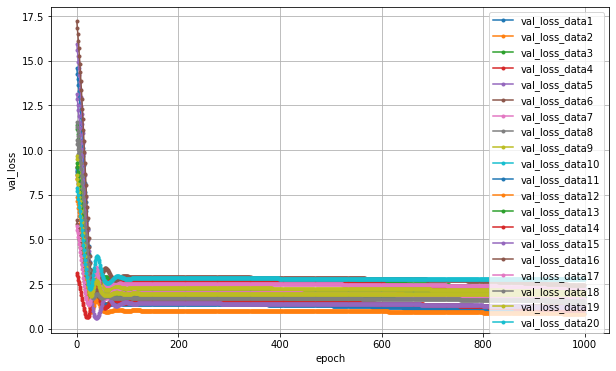

In [71]:
# 学習経過の可視化(大きさ)(validation)

val_loss_array = []
for i in range(len(history_size_array)):
    val_loss_array.append(history_size_array[i].history['val_loss'])
plt.figure(figsize=(10,6))
nb_epoch = len(val_loss_array[i])
for i in range(len(val_loss_array)):
    plt.plot(range(nb_epoch), val_loss_array[i], marker='.', label='val_loss_data%d'%((i+1)))
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.show()

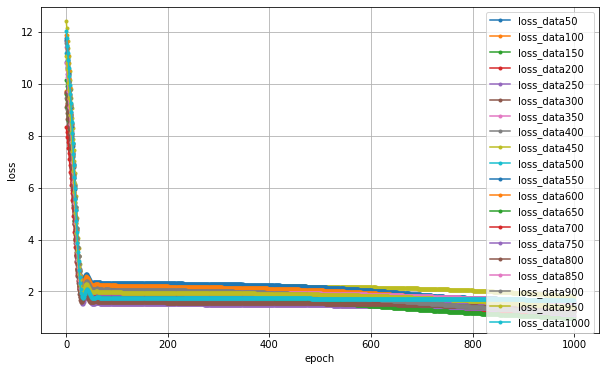

In [72]:
# 学習経過の可視化(大きさ)(train)

loss_array = []
for i in range(len(history_size_array)):
    loss_array.append(history_size_array[i].history['loss'])
plt.figure(figsize=(10,6))
nb_epoch = len(loss_array[i])
for i in range(len(loss_array)):
    plt.plot(range(nb_epoch), loss_array[i], marker='.', label='loss_data%d'%(50*(i+1)))
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [73]:
min_val_loss_array = []
for i in range(len(val_loss_array)):
    min_val_loss_array.append(min(val_loss_array[i]))

In [74]:
print(min_val_loss_array)

[1.8346267938613892, 1.7151296138763428, 2.1106557846069336, 1.928497076034546, 1.8320286273956299, 1.2477600574493408, 2.2319090366363525, 1.461416244506836, 2.054041624069214, 1.7719879150390625, 0.8891847729682922, 0.840640664100647, 1.7401338815689087, 0.6368190050125122, 0.6048964262008667, 1.9373397827148438, 1.351140022277832, 1.559654712677002, 1.8387037515640259, 2.2249555587768555]


In [75]:
min_loss_array = []
for i in range(len(loss_array)):
    min_loss_array.append(min(loss_array[i]))

In [76]:
print(min_loss_array)

[1.6116851568222046, 1.4379174709320068, 1.4522881507873535, 1.0669466257095337, 1.2538453340530396, 1.230340600013733, 1.433464527130127, 1.224607229232788, 1.8061251640319824, 1.56130051612854, 1.4698048830032349, 1.3776226043701172, 0.9812344312667847, 1.23759925365448, 1.114233374595642, 1.268574595451355, 1.5796622037887573, 1.1716676950454712, 1.4003487825393677, 1.6713107824325562]


In [77]:
# 平均と標準偏差
import statistics
import math
average = statistics.mean(min_val_loss_array)
stdev = statistics.pstdev(min_val_loss_array)

In [78]:
print(average)
print(stdev)

1.5905760675668716
0.495567534929606
